In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as st
import statsmodels.api as sm

In [2]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

In [3]:
pd.set_option('display.max_row', 3665)
pd.set_option('display.max_column', 70)
pd.set_option('display.column_space', 200)

In [4]:
# Liste de tous les pays avec leurs différentes appélations (courtes et longues) et 
#   leurs attributs financiers comme le niveau de revenu 'Income Group' ou la catégorie de prêt 'Lending category'

EdStatsCountry = pd.read_csv("EdStatsCountry.csv")
print(EdStatsCountry.shape)   # (241, 32) : Nombre de ligne et colonne
EdStatsCountry.set_index('Country Code', inplace=True)
EdStatsCountry.head(2)


# 1 ligne par pays
# Colonnes intéressantes :
#   - Income Group : ['High income','Low income','Upper middle income','Lower middle income', NaN, OECD, nonOECD]
#   - Lending category

(241, 32)


Short Name   Table Name                     Long Name  \
Country Code                                                           
ABW                 Aruba        Aruba                         Aruba   
AFG           Afghanistan  Afghanistan  Islamic State of Afghanistan   

             2-alpha code   Currency Unit  \
Country Code                                
ABW                    AW   Aruban florin   
AFG                    AF  Afghan afghani   

                                                  Special Notes  \
Country Code                                                      
ABW           SNA data for 2000-2011 are updated from offici...   
AFG           Fiscal year end: March 20; reporting period fo...   

                                 Region          Income Group WB-2 code  \
Country Code                                                              
ABW           Latin America & Caribbean  High income: nonOECD        AW   
AFG                          South Asia            Low income        AF   

             National accounts base year  National accounts reference year  \
Country Code                                                                 
ABW                                 2000                               NaN   
AFG                              2002/03                               NaN   

                            SNA price valuation Lending category Other groups  \
Country Code                                                                    
ABW           Value added at basic prices (VAB)              NaN          NaN   
AFG           Value added at basic prices (VAB)              IDA         HIPC   

                                    System of National Accounts  \
Country Code                                                      
ABW           Country uses the 1993 System of National Accou...   
AFG           Country uses the 1993 System of National Accou...   

             Alternative conversion factor PPP survey year  \
Country Code                                                 
ABW                                    NaN             NaN   
AFG                                    NaN             NaN   

                         Balance of Payments Manual in use  \
Country Code                                                 
ABW           IMF Balance of Payments Manual, 6th edition.   
AFG                                                    NaN   

             External debt Reporting status       System of trade  \
Country Code                                                        
ABW                                     NaN  Special trade system   
AFG                                  Actual  General trade system   

                Government Accounting concept  \
Country Code                                    
ABW                                       NaN   
AFG           Consolidated central government   

                       IMF data dissemination standard  \
Country Code                                             
ABW                                                NaN   
AFG           General Data Dissemination System (GDDS)   

             Latest population census  \
Country Code                            
ABW                              2010   
AFG                              1979   

                                        Latest household survey  \
Country Code                                                      
ABW                                                         NaN   
AFG           Multiple Indicator Cluster Survey (MICS), 2010/11   

             Source of most recent Income and expenditure data  \
Country Code                                                     
ABW                                                        NaN   
AFG                    Integrated household survey (IHS), 2008   

             Vital registration complete Latest agricultural census  \
Country Code                                                          
ABW                   

In [5]:
EdStatsCountry = EdStatsCountry[['Short Name']]    # On a besoin que de cette colonne pour la suite


# Affiche les noms explicites de la liste des 'Country Code' (list_pays) :
def ListCountryName(list_pays):
    for p in list_pays:
        print(EdStatsCountry.loc[p, 'Short Name'])

# Affiche le nom explicite du 'Country Code' (pays) :
def CountryName(pays):
    return(EdStatsCountry.loc[pays, 'Short Name'])

# test
ListCountryName(['ABW','AFG'])
CountryName('ABW')

Aruba
Afghanistan


'Aruba'

In [6]:
# Source d'information sur des couples  Pays+Indicateurs

EdStatsCountrySeries = pd.read_csv("EdStatsCountry-Series.csv")
print(EdStatsCountrySeries.shape)   # (613, 4) : Nombre de ligne et colonne
EdStatsCountrySeries

# Table sans intérêt car Seulement 21 indicateurs sur 3665 y sont mentionnés et il n'y a pas de données => DEL

(613, 4)


CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
5           AFG  NY.GDP.MKTP.PP.KD   
6           AFG  NY.GNP.MKTP.PP.CD   
7           AFG  NY.GDP.MKTP.PP.CD   
8           AFG  NY.GDP.PCAP.PP.KD   
9           AFG  NY.GNP.PCAP.PP.CD   
10          AGO        SP.POP.TOTL   
11          AGO        SP.POP.GROW   
12          ALB        SP.POP.GROW   
13          ALB        SP.POP.TOTL   
14          AND        SP.POP.TOTL   
15          AND        SP.POP.GROW   
16          ARE        SP.POP.GROW   
17          ARE        SP.POP.TOTL   
18          ARG  NY.GDP.MKTP.PP.KD   
19          ARG  NY.GNP.MKTP.PP.CD   
20          ARG  NY.GDP.PCAP.PP.CD   
21          ARG        SP.POP.TOTL   
22          ARG  NY.GNP.PCAP.PP.CD   
23          ARG  NY.GDP.PCAP.PP.KD   
24          ARG        SP.POP.GROW   
25          ARG  NY.GDP.MKTP.PP.CD   
26          ARM        SP.POP.GROW   
27          ARM        SP.POP.TOTL   
28          ASM        SP.POP.TOTL   
29          ASM        SP.POP.GROW   
30          ATG        SP.POP.GROW   
31          ATG        SP.POP.TOTL   
32          AUS        SP.POP.TOTL   
33          AUS  SP.POP.1564.TO.ZS   
34          AUS        SP.POP.GROW   
35          AUS  SP.POP.TOTL.MA.ZS   
36          AUS  SP.POP.TOTL.FE.ZS   
37          AUS  SP.POP.0014.TO.ZS   
38          AUT        SP.POP.GROW   
39          AUT        SP.POP.TOTL   
40          AZE        SP.POP.TOTL   
41          AZE        SP.POP.GROW   
42          BDI        SP.POP.GROW   
43          BDI        SP.POP.TOTL   
44          BEL        SP.POP.TOTL   
45          BEL        SP.POP.GROW   
46          BEN        SP.POP.GROW   
47          BEN        SP.POP.TOTL   
48          BFA        SP.POP.TOTL   
49          BFA        SP.POP.GROW   
50          BGD        SP.POP.GROW   
51          BGD        SP.POP.TOTL   
52          BGR        SP.POP.TOTL   
53          BGR        SP.POP.GROW   
54          BHR        SP.POP.GROW   
55          BHR        SP.POP.TOTL   
56          BHS        SP.POP.TOTL   
57          BHS        SP.POP.GROW   
58          BIH        SP.POP.GROW   
59          BIH        SP.POP.TOTL   
60          BLR        SP.POP.TOTL   
61          BLR        SP.POP.GROW   
62          BLZ        SP.POP.GROW   
63          BLZ        SP.POP.TOTL   
64          BMU        SP.POP.TOTL   
65          BMU        SP.POP.GROW   
66          BOL        SP.POP.GROW   
67          BOL        SP.POP.TOTL   
68          BRA        SP.POP.TOTL   
69          BRA        SP.POP.GROW   
70          BRB        SP.POP.GROW   
71          BRB        SP.POP.TOTL   
72          BRN        SP.POP.TOTL   
73          BRN        SP.POP.GROW   
74          BTN        SP.POP.GROW   
75          BTN        SP.POP.TOTL   
76          BWA        SP.POP.TOTL   
77          BWA        SP.POP.GROW   
78          CAF        SP.POP.GROW   
79          CAF        SP.POP.TOTL   
80          CAN        SP.POP.TOTL   
81          CAN        SP.POP.GROW   
82          CHE        SP.POP.GROW   
83          CHE        SP.POP.TOTL   
84          CHI        SP.POP.TOTL   
85          CHI  SP.POP.0014.TO.ZS   
86          CHI  SP.POP.1564.TO.ZS   
87          CHI        SP.POP.GROW   
88          CHI  SP.POP.TOTL.FE.ZS   
89          CHI  SP.POP.TOTL.MA.ZS   
90          CHL        SP.POP.GROW   
91          CHL        SP.POP.TOTL   
92          CHN        SP.POP.TOTL   
93          CHN  SP.POP.0014.TO.ZS   
94          CHN  SP.POP.1564.TO.ZS   
95          CHN        SP.POP.GROW   
96          CHN  SP.POP.TOTL.MA.ZS   
97          CHN  SP.POP.TOTL.FE.ZS   
98          CIV        SP.POP.GROW   
99          CIV        SP.POP.TOTL   
100         CMR        SP.POP.TOTL   
101         CMR        SP.POP.GROW   
102         COD        SP.POP.GROW   
103         COD        SP.POP.TOTL   
104         CO

In [7]:
del EdStatsCountrySeries

In [8]:
# Détails supplémentaires sur les indicateurs

EdStatsFootNote = pd.read_csv("EdStatsFootNote.csv")
print(EdStatsFootNote.shape)   # (643638, 5) : Nombre de ligne et colonne
EdStatsFootNote
# .head(10)

# len(EdStatsFootNote['SeriesCode'].value_counts())   # 1558 indicateurs sur 3665
# Cette table n'a pas d'intérêt car Seulement 1558 indicateurs sur 3665 y sont mentionnés et il n'y a pas de donnée => DEL

(643638, 5)


CountryCode                   SeriesCode    Year  \
0              ABW               SE.PRE.ENRL.FE  YR2001   
1              ABW               SE.TER.TCHR.FE  YR2005   
2              ABW               SE.PRE.TCHR.FE  YR2000   
3              ABW               SE.SEC.ENRL.GC  YR2004   
4              ABW                  SE.PRE.TCHR  YR2006   
5              ABW                  SE.PRE.NENR  YR2000   
6              ABW            SE.SEC.ENRL.VO.FE  YR2005   
7              ABW               SE.SEC.ENRL.GC  YR2003   
8              ABW               SE.PRM.TCHR.FE  YR1999   
9              ABW            SE.PRE.TCHR.FE.ZS  YR2008   
10             ABW                  SE.PRE.ENRL  YR2006   
11             ABW               SE.PRE.NENR.FE  YR2000   
12             ABW         SE.SEC.ENRL.VO.FE.ZS  YR2002   
13             ABW               SE.SEC.TCHR.FE  YR2006   
14             ABW         SE.SEC.ENRL.VO.FE.ZS  YR2007   
15             ABW               SE.SEC.ENRL.VO  YR1999   
16             ABW            SE.PRE.TCHR.FE.ZS  YR2001   
17             ABW               SE.PRE.ENRL.FE  YR2002   
18             ABW               SE.PRE.NENR.MA  YR1999   
19             ABW               SE.SEC.TCHR.FE  YR2003   
20             ABW                  SE.PRE.ENRL  YR2004   
21             ABW                  SE.PRE.TCHR  YR2002   
22             ABW                  SE.PRE.NENR  YR2004   
23             ABW               SE.PRM.TCHR.FE  YR2007   
24             ABW               SE.PRE.TCHR.FE  YR2003   
25             ABW                  SE.PRE.ENRL  YR2000   
26             ABW               SE.SEC.TCHR.FE  YR2004   
27             ABW               SE.SEC.ENRL.GC  YR2002   
28             ABW               SE.PRM.TCHR.FE  YR2004   
29             ABW            SE.SEC.ENRL.VO.FE  YR2004   
30             ABW               SE.PRE.NENR.MA  YR2003   
31             ABW               SE.PRE.TCHR.FE  YR2005   
32             ABW               SE.TER.TCHR.FE  YR1999   
33             ABW               SE.PRM.TCHR.FE  YR2006   
34             ABW               SE.PRE.ENRL.FE  YR1999   
35             ABW               SE.PRE.NENR.FE  YR1999   
36             ABW            SE.PRE.TCHR.FE.ZS  YR2002   
37             ABW               SE.PRM.TCHR.FE  YR2005   
38             ABW            SE.SEC.ENRL.VO.FE  YR2001   
39             ABW               SE.PRE.NENR.FE  YR2001   
40             ABW            SE.SEC.ENRL.VO.FE  YR2008   
41             ABW                  SE.PRE.ENRL  YR2002   
42             ABW                  SE.PRE.ENRL  YR2005   
43             ABW               SE.PRE.ENRL.FE  YR2006   
44             ABW                  SE.PRE.NENR  YR2001   
45             ABW                  SE.PRE.NENR  YR2002   
46             ABW                  SE.PRE.TCHR  YR2004   
47             ABW                  SE.PRE.TCHR  YR2007   
48             ABW               SE.PRE.TCHR.FE  YR2001   
49             ABW               SE.PRE.TCHR.FE  YR2008   
50             ABW            SE.PRE.TCHR.FE.ZS  YR2000   
51             ABW            SE.PRE.TCHR.FE.ZS  YR2003   
52             ABW            SE.PRE.TCHR.FE.ZS  YR2005   
53             ABW            SE.PRM.NINT.FE.ZS  YR2005   
54             ABW            SE.PRM.NINT.MA.ZS  YR2005   
55             ABW               SE.PRM.NINT.ZS  YR2005   
56             ABW               SE.PRM.TCHR.FE  YR2002   
57             ABW               SE.PRM.TCHR.FE  YR2008   
58             ABW                  SE.PRM.UNER  YR2006   
59             ABW               SE.PRM.UNER.FE  YR2006   
60             ABW               SE.PRM.UNER.MA  YR2006   
61             ABW                  SE.SCH.LIFE  YR2006   
62             ABW               SE.SCH.LIFE.FE  YR2006   
63             ABW               SE.SCH.LIFE.MA  YR2006   
64             ABW               SE.SEC.ENRL.GC  YR2001   
65             ABW               SE.SEC.ENRL.GC  YR2006   
66             ABW               SE.SEC.ENRL.GC  YR200

In [9]:
del EdStatsFootNote

In [10]:
# Définition des indicateur et leur rattachement à un 'topic'

EdStatsSeries = pd.read_csv("EdStatsSeries.csv")
print(EdStatsSeries.shape)   # (3665, 21).  3665 ->  c'est le nombre d 'Indicator Code' 
EdStatsSeries.head(20)

# C'est une table utile pour comprendre la signification des indicateurs et les choisir pour notre problématique

(3665, 21)


Series Code       Topic  \
0   BAR.NOED.1519.FE.ZS  Attainment   
1      BAR.NOED.1519.ZS  Attainment   
2   BAR.NOED.15UP.FE.ZS  Attainment   
3      BAR.NOED.15UP.ZS  Attainment   
4   BAR.NOED.2024.FE.ZS  Attainment   
5      BAR.NOED.2024.ZS  Attainment   
6   BAR.NOED.2529.FE.ZS  Attainment   
7      BAR.NOED.2529.ZS  Attainment   
8   BAR.NOED.25UP.FE.ZS  Attainment   
9      BAR.NOED.25UP.ZS  Attainment   
10  BAR.NOED.3034.FE.ZS  Attainment   
11     BAR.NOED.3034.ZS  Attainment   
12  BAR.NOED.3539.FE.ZS  Attainment   
13     BAR.NOED.3539.ZS  Attainment   
14  BAR.NOED.4044.FE.ZS  Attainment   
15     BAR.NOED.4044.ZS  Attainment   
16  BAR.NOED.4549.FE.ZS  Attainment   
17     BAR.NOED.4549.ZS  Attainment   
18  BAR.NOED.5054.FE.ZS  Attainment   
19     BAR.NOED.5054.ZS  Attainment   

                                       Indicator Name  \
0   Barro-Lee: Percentage of female population age...   
1   Barro-Lee: Percentage of population age 15-19 ...   
2   Barro-Lee: Percentage of female population age...   
3   Barro-Lee: Percentage of population age 15+ wi...   
4   Barro-Lee: Percentage of female population age...   
5   Barro-Lee: Percentage of population age 20-24 ...   
6   Barro-Lee: Percentage of female population age...   
7   Barro-Lee: Percentage of population age 25-29 ...   
8   Barro-Lee: Percentage of female population age...   
9   Barro-Lee: Percentage of population age 25+ wi...   
10  Barro-Lee: Percentage of female population age...   
11  Barro-Lee: Percentage of population age 30-34 ...   
12  Barro-Lee: Percentage of female population age...   
13  Barro-Lee: Percentage of population age 35-39 ...   
14  Barro-Lee: Percentage of female population age...   
15  Barro-Lee: Percentage of population age 40-44 ...   
16  Barro-Lee: Percentage of female population age...   
17  Barro-Lee: Percentage of population age 45-49 ...   
18  Barro-Lee: Percentage of female population age...   
19  Barro-Lee: Percentage of population age 50-54 ...   

                                     Short definition  \
0   Percentage of female population age 15-19 with...   
1   Percentage of population age 15-19 with no edu...   
2   Percentage of female population age 15+ with n...   
3   Percentage of population age 15+ with no educa...   
4   Percentage of female population age 20-24 with...   
5   Percentage of population age 20-24 with no edu...   
6   Percentage of female population age 25-29 with...   
7   Percentage of population age 25-29 with no edu...   
8   Percentage of female population age 25+ with n...   
9   Percentage of population age 25+ with no educa...   
10  Percentage of female population age 30-34 with...   
11  Percentage of population age 30-34 with no edu...   
12  Percentage of female population age 35-39 with...   
13  Percentage of population age 35-39 with no edu...   
14  Percentage of female population age 40-44 with...   
15  Percentage of population age 40-44 with no edu...   
16  Percentage of female population age 45-49 with...   
17  Percentage of population age 45-49 with no edu...   
18  Percentage of female population age 50-54 with...   
19  Percentage of population age 50-54 with no edu...   

                                      Long definition  Unit of measure  \
0   Percentage of female population age 15-19 with...              NaN   
1   Percentage of population age 15-19 with no edu...              NaN   
2   Percentage of female population age 15+ with n...              NaN   
3   Percentage of population age 15+ with no educa...              NaN   
4   Percentage of female population age 20-24 with...              NaN   
5   Percentage of population age 20-24 with no edu...              NaN   
6   Percentage of female population age 25-29 with...              NaN   
7   Percentage of population age 25-29 with no edu...              NaN   
8   Percentage of female population age 25+ with n...              NaN   
9   Percentage of population age 25+ with no educa...   

In [11]:
# Association (Pays - Indicateur Code)

# Autant de lignes par pays qu'il y a de 'Indicator Code' et autant de colonnes qu'il y a d'années 1970 à 2100
# -> 3665 indicateurs par pays. 

# len(EdStatsData['Indicator Code'].unique())    # Il y a 3665 'Indicator Code' 
# EdStatsData['Indicator Code'].value_counts()   # Chaque 'Indicator Code' apparaît 242 fois (=nbre de pays)
# 3665 x 242 = 886.930  <- C'est la taille de EdStatsData  !

EdStatsData = pd.read_csv("EdStatsData.csv")
print(EdStatsData.shape)                        # (886930, 70) : (ligne, colonne)

# Doublons ?  NON
print("Taille EdStatsData avant suppression des doublons:",len(EdStatsData))  # 886930
EdStatsData.drop_duplicates(subset = ['Country Code', 'Indicator Code'], keep = 'first', inplace = True)
print("Taille EdStatsData:",len(EdStatsData))  # 886930
EdStatsData.head(5)


(886930, 70)
Taille EdStatsData avant suppression des doublons: 886930
Taille EdStatsData: 886930


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

## Selection des Pays

In [12]:
all_country = EdStatsData['Country Name'].unique()   # Tous les pays =  Pays uniques + Groupements de pays


# Groupements de pays à retirer :
group_pays  = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area',
               'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union',
               'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean',
               'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification',
               'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
               'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members',
               'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World']
pays_a_garder = [x for x in all_country if x not in group_pays]

EdStatsData = EdStatsData[EdStatsData['Country Name'].isin(pays_a_garder)]
print("Taille EdStatsData:",len(EdStatsData))                                 # 886930 -> 795305

Taille EdStatsData: 795305


## Sélection des indicateurs

In [13]:
# Conserver les indicateurs qui semblent pertinents : 
indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'SP.POP.GROW', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
                 'UIS.NER.3', 'SE.TER.ENRR', 'LO.PISA.MAT', 'LO.PISA.REA', 'LO.PISA.SCI']

EdStatsData = EdStatsData[EdStatsData['Indicator Code'].isin(indic_to_keep)]
print("Taille EdStatsData:",len(EdStatsData))

EdStatsData.head(20)


# ----------------------------------------------------------------
# Indicator Code           Indicator Name
# ----------------------------------------------------------------
# NY.GDP.MKTP.PP.CD        GDP, PPP (current international $)
# SP.POP.GROW              Population growth (annual %)
# SP.POP.1524.TO.UN        Population, ages 15-24, total
# SP.POP.TOTL              Population, total
# IT.NET.USER.P2           Internet users (per 100 people)
# IT.CMP.PCMP.P2           Personal computers (per 100 people)

# UIS.NER.3                Net enrolment rate, upper secondary, both sexes (%)
# SE.TER.ENRR              Gross enrolment ratio, tertiary, both sexes (%)
# LO.PISA.MAT              PISA: Mean performance on the mathematics scale
# LO.PISA.REA              PISA: Mean performance on the reading scale
# LO.PISA.SCI              PISA: Mean performance on the science scale

Taille EdStatsData: 2387


Country Name Country Code  \
92874  Afghanistan          AFG   
92964  Afghanistan          AFG   
93000  Afghanistan          AFG   
93283  Afghanistan          AFG   
93709  Afghanistan          AFG   
93923  Afghanistan          AFG   
93926  Afghanistan          AFG   
93929  Afghanistan          AFG   
93932  Afghanistan          AFG   
94107  Afghanistan          AFG   
94158  Afghanistan          AFG   
96539      Albania          ALB   
96629      Albania          ALB   
96665      Albania          ALB   
96948      Albania          ALB   
97374      Albania          ALB   
97588      Albania          ALB   
97591      Albania          ALB   
97594      Albania          ALB   
97597      Albania          ALB   

                                          Indicator Name     Indicator Code  \
92874                 GDP, PPP (current international $)  NY.GDP.MKTP.PP.CD   
92964    Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
93000                    Internet users (per 100 people)     IT.NET.USER.P2   
93283  Net enrolment rate, upper secondary, both sexe...          UIS.NER.3   
93709                Personal computers (per 100 people)     IT.CMP.PCMP.P2   
93923    PISA: Mean performance on the mathematics scale        LO.PISA.MAT   
93926        PISA: Mean performance on the reading scale        LO.PISA.REA   
93929        PISA: Mean performance on the science scale        LO.PISA.SCI   
93932                       Population growth (annual %)        SP.POP.GROW   
94107                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
94158                                  Population, total        SP.POP.TOTL   
96539                 GDP, PPP (current international $)  NY.GDP.MKTP.PP.CD   
96629    Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
96665                    Internet users (per 100 people)     IT.NET.USER.P2   
96948  Net enrolment rate, upper secondary, both sexe...          UIS.NER.3   
97374                Personal computers (per 100 people)     IT.CMP.PCMP.P2   
97588    PISA: Mean performance on the mathematics scale        LO.PISA.MAT   
97591        PISA: Mean performance on the reading scale        LO.PISA.REA   
97594        PISA: Mean performance on the science scale        LO.PISA.SCI   
97597                       Population growth (annual %)        SP.POP.GROW   

               1970          1971          1972          1973          1974  \
92874           NaN           NaN           NaN           NaN           NaN   
92964  7.681700e-01  9.239400e-01  9.524100e-01  1.097450e+00  1.026200e+00   
93000           NaN           NaN           NaN           NaN           NaN   
93283           NaN           NaN           NaN           NaN           NaN   
93709           NaN           NaN           NaN           NaN           NaN   
93923           NaN           NaN           NaN           NaN           NaN   
93926           NaN           NaN           NaN           NaN           NaN   
93929           NaN           NaN           NaN           NaN           NaN   
93932  2.472266e+00  2.587996e+00  2.628657e+00  2.576017e+00  2.412657e+00   
94107           NaN           NaN           NaN           NaN           NaN   
94158  1.112612e+07  1.141782e+07  1.172194e+07  1.202782e+07  1.232154e+07   
96539           NaN           NaN           NaN           NaN           NaN   
96629           NaN  1.390859e+01  1.492861e+01           NaN           NaN   
96665           NaN           NaN           NaN           NaN           NaN   
96948           NaN           NaN           NaN           NaN           NaN   
97374           NaN           NaN           NaN           NaN           NaN   
97588           NaN           NaN           NaN           NaN           NaN   
97591           NaN           NaN           NaN           NaN           NaN   
97594           NaN           NaN           NaN           NaN           NaN   
97597  2.550851e+00  2.422972e

## Données manquantes

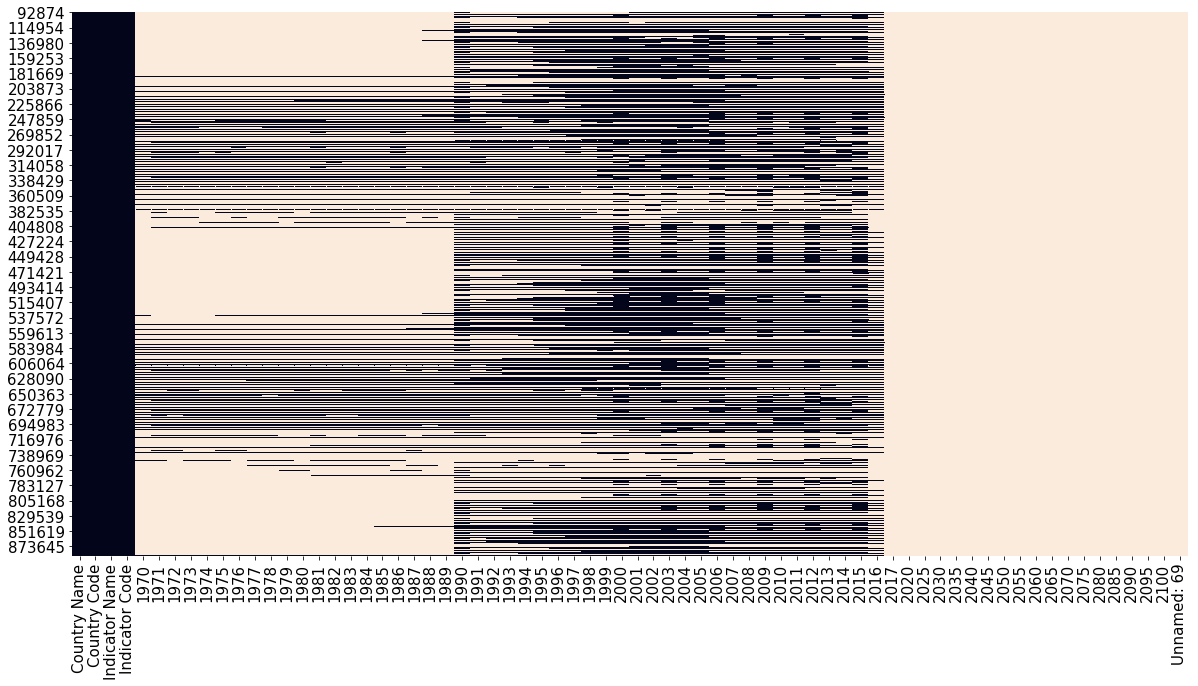

In [14]:
# Visualisation des valeurs manquantes :

plt.figure(figsize=(20, 10))
sns.heatmap(EdStatsData.isna(), cbar=False)    # 'True' indiquant un NaN, est èquibvalent à 1 et apparaît en claire.

# A l'oeil nu, la période 1990-2016 est la plus complète en données pour les indicators précedemment choisis
#   avec une accentuation des données sur les années 2000, 2003, 2006, 2009, 2012, 2015.
# l'année la plus contemporaine qui pourrait servir de référence serait 2015 ou 2016.

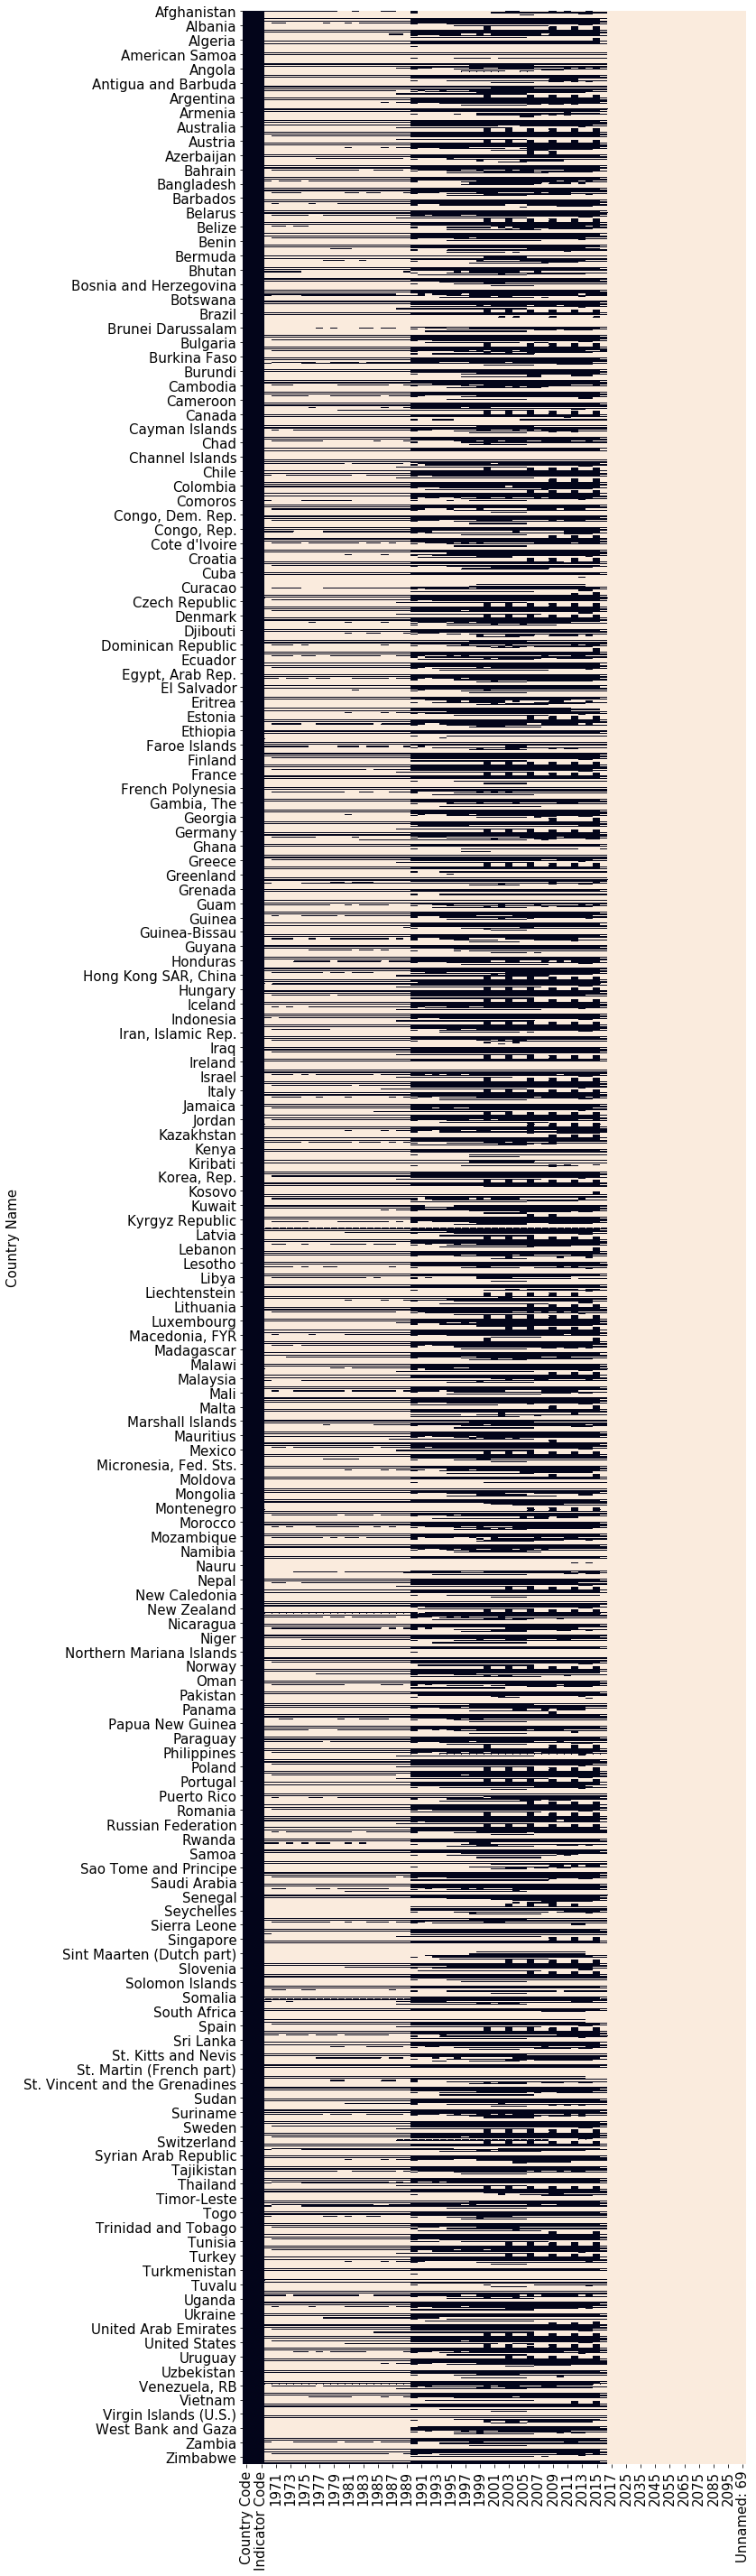

In [15]:
# TEST pour mettre en évidence les pays sans données

tt = EdStatsData.copy()
tt.set_index('Country Name', inplace=True)

plt.figure(figsize=(10, 50))
sns.heatmap(tt.isna(), cbar=False)


IT.CMP.PCMP.P2


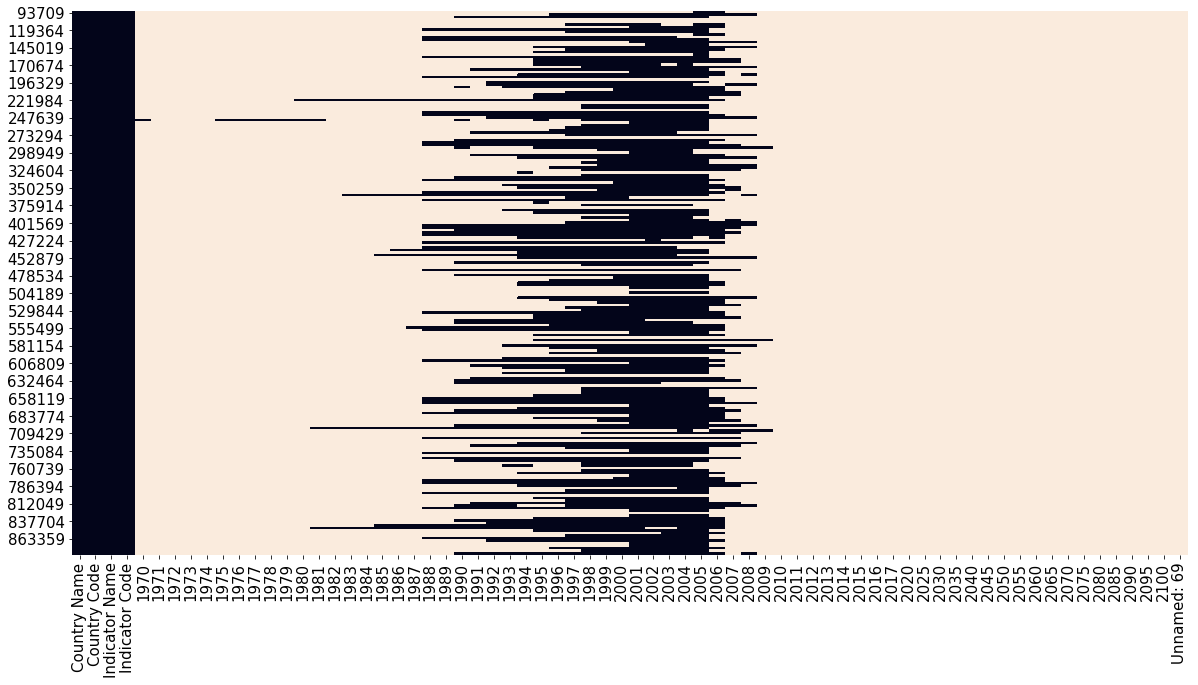

In [23]:
# Dans le détail des indicator pris un à un :

print("IT.CMP.PCMP.P2")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'IT.CMP.PCMP.P2']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)


#  Constat :  'IT.CMP.PCMP.P2' est totalement absent à partir de 2010  =>   On élimine cet indicator

In [42]:
# TEST

# print("LO.PISA.MAT")
# tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'LO.PISA.MAT']
# tt.set_index('Country Name', inplace=True)
# plt.figure(figsize=(20, 20))
# sns.heatmap(tt.isna(), cbar=False)


LO.PISA.REA


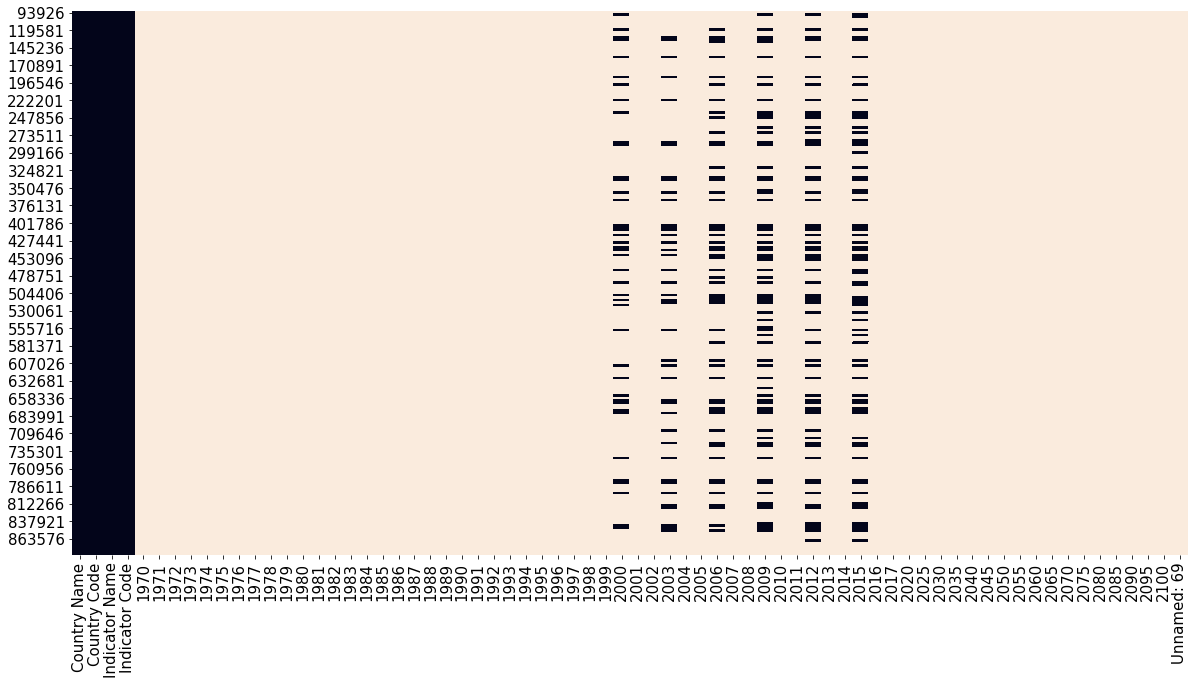

In [22]:
print("LO.PISA.REA")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'LO.PISA.REA']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# Valeurs présentes en 2000 - 2003 - 2006 - 2009 - 2012 - 2015

LO.PISA.SCI


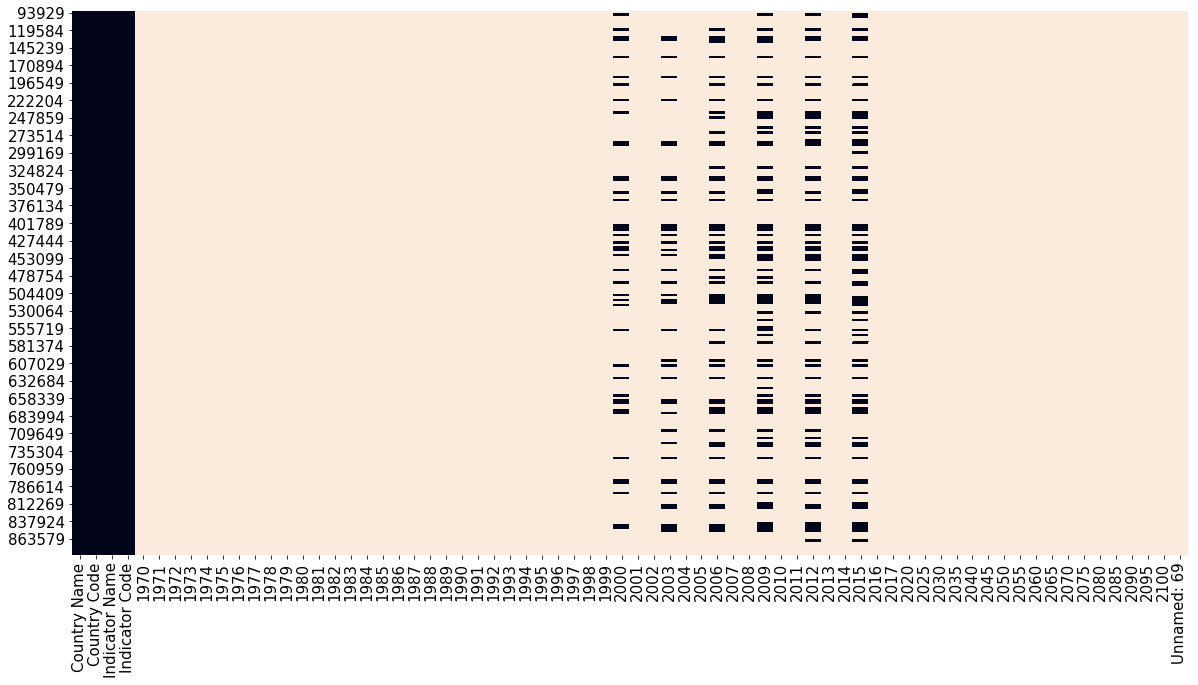

In [23]:
print("LO.PISA.SCI")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'LO.PISA.SCI']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# Valeurs présentes en 2000 - 2003 - 2006 - 2009 - 2012 - 2015

UIS.NER.3


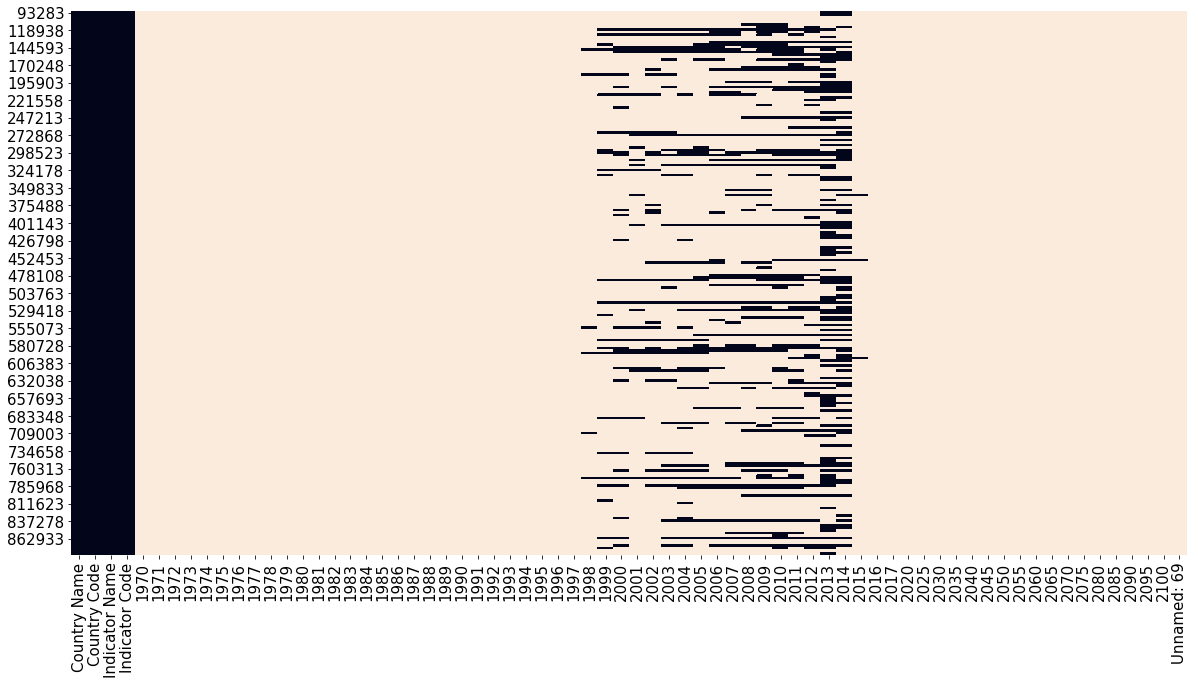

In [24]:
print("UIS.NER.3")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'UIS.NER.3']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# 'UIS.NER.3' est absent en 2015 et 2016 :  on le supprime

SE.TER.ENRR


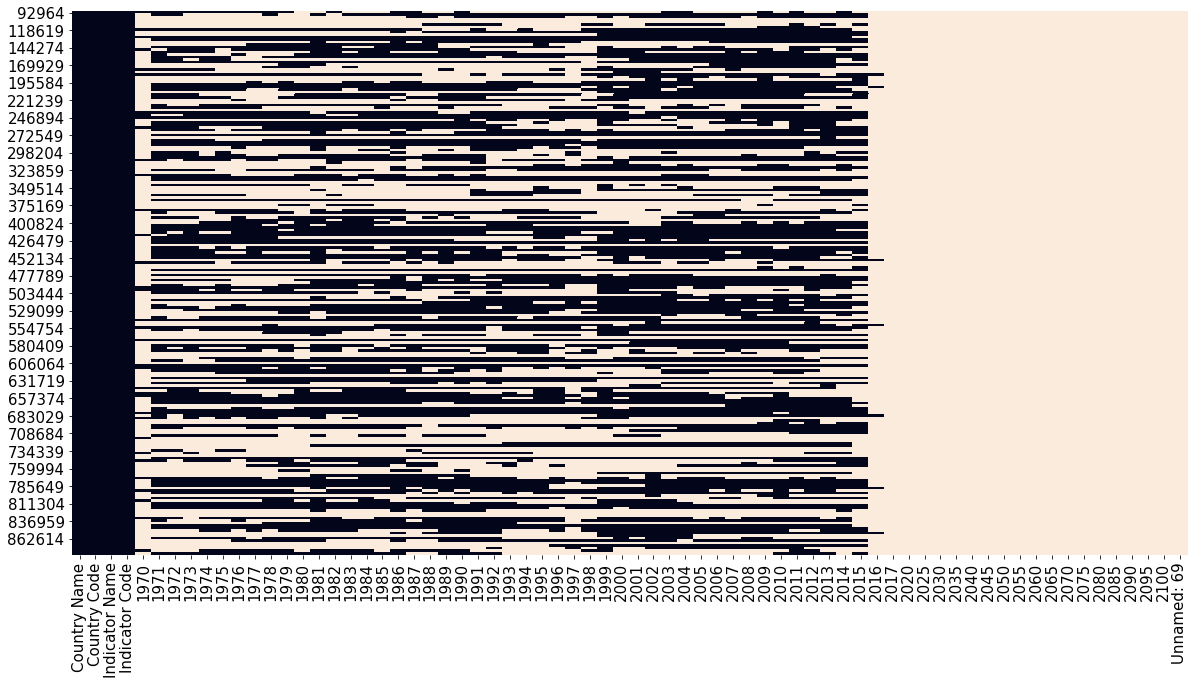

In [25]:
print("SE.TER.ENRR")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'SE.TER.ENRR']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# Beaucoup plus de valeurs que 'UIS.NER.3' et l'année 2015 a des valeurs.  Ne pas retenir 2016

SP.POP.1524.TO.UN
SP.POP.TOTL


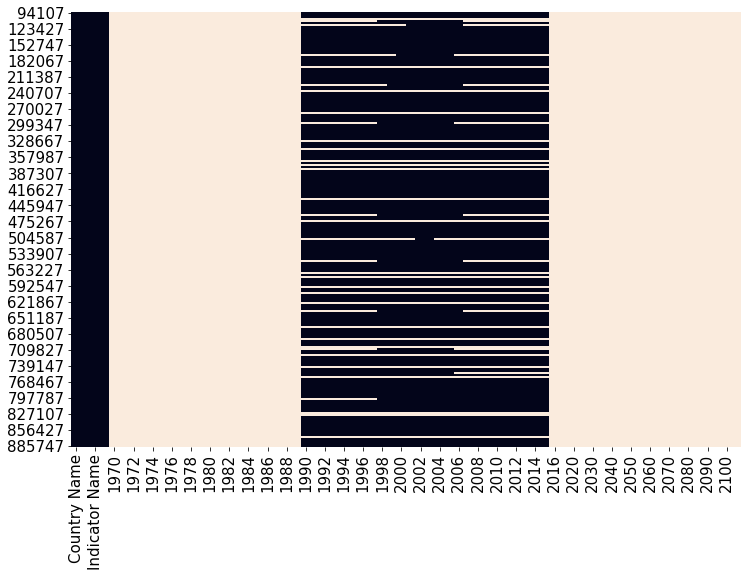

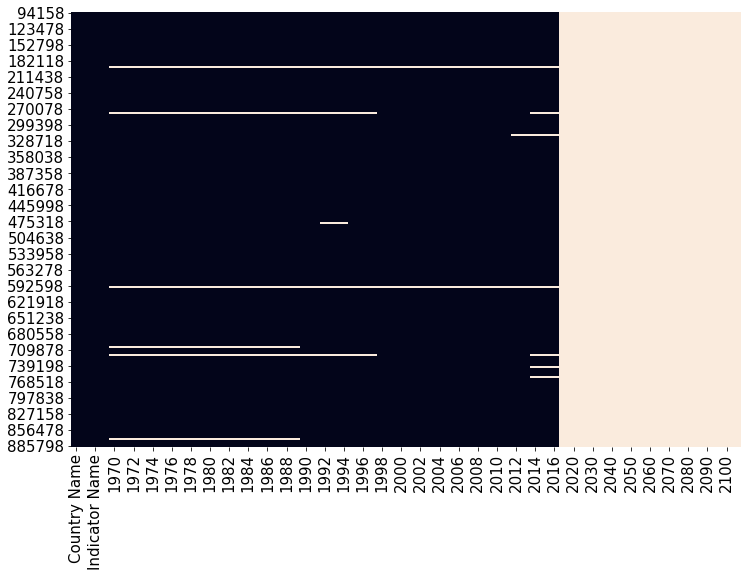

In [22]:
print("SP.POP.1524.TO.UN")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'SP.POP.1524.TO.UN']
plt.figure(figsize=(12, 8))
sns.heatmap(tt.isna(), cbar=False)

print("SP.POP.TOTL")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'SP.POP.TOTL']
plt.figure(figsize=(12, 8))
sns.heatmap(tt.isna(), cbar=False)

# 'SP.POP.1524.TO.UN' :  data jusqu'en 2015
# 'SP.POP.TOTL'       :  data jusqu'en 2016

## Sélection des indicateurs

In [16]:
# 1er  Choix :
#  indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'SP.POP.GROW', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
#                  'UIS.NER.3', 'SE.TER.ENRR', 'LO.PISA.MAT', 'LO.PISA.REA', 'LO.PISA.SCI']

# 2eme Choix compte tenu des données manquantes :
indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2',
                 'SE.TER.ENRR', 'LO.PISA.MAT', 'LO.PISA.REA', 'LO.PISA.SCI']

EdStatsData = EdStatsData[EdStatsData['Indicator Code'].isin(indic_to_keep)]
print("Taille EdStatsData:",len(EdStatsData))                                 # 476450 -> 780
EdStatsData.head(6)

# Sans 'SP.POP.GROW' car il y a déjà un indicateur de population 'SP.POP.1524.TO.UN'

Taille EdStatsData: 1736


Country Name Country Code  \
92874  Afghanistan          AFG   
92964  Afghanistan          AFG   
93000  Afghanistan          AFG   
93923  Afghanistan          AFG   
93926  Afghanistan          AFG   
93929  Afghanistan          AFG   

                                        Indicator Name     Indicator Code  \
92874               GDP, PPP (current international $)  NY.GDP.MKTP.PP.CD   
92964  Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
93000                  Internet users (per 100 people)     IT.NET.USER.P2   
93923  PISA: Mean performance on the mathematics scale        LO.PISA.MAT   
93926      PISA: Mean performance on the reading scale        LO.PISA.REA   
93929      PISA: Mean performance on the science scale        LO.PISA.SCI   

          1970     1971     1972     1973    1974     1975     1976     1977  \
92874      NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
92964  0.76817  0.92394  0.95241  1.09745  1.0262  1.08012  1.22264  1.35827   
93000      NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
93923      NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
93926      NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
93929      NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   

          1978     1979  1980  1981     1982  1983  1984  1985    1986  \
92874      NaN      NaN   NaN   NaN      NaN   NaN   NaN   NaN     NaN   
92964  1.74661  1.88179   NaN   NaN  1.74412   NaN   NaN   NaN  2.2043   
93000      NaN      NaN   NaN   NaN      NaN   NaN   NaN   NaN     NaN   
93923      NaN      NaN   NaN   NaN      NaN   NaN   NaN   NaN     NaN   
93926      NaN      NaN   NaN   NaN      NaN   NaN   NaN   NaN     NaN   
93929      NaN      NaN   NaN   NaN      NaN   NaN   NaN   NaN     NaN   

          1987  1988  1989     1990  1991  1992  1993  1994  1995  1996  1997  \
92874      NaN   NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
92964  1.74343   NaN   NaN  2.27317   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
93000      NaN   NaN   NaN  0.00000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
93923      NaN   NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
93926      NaN   NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
93929      NaN   NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1998  1999  2000      2001          2002          2003          2004  \
92874   NaN   NaN   NaN       NaN  1.924381e+10  2.128492e+10  2.210105e+10   
92964   NaN   NaN   NaN       NaN           NaN  1.256840e+00  1.256030e+00   
93000   NaN   NaN   NaN  0.004723  4.561395e-03  8.789125e-02  1.058090e-01   
93923   NaN   NaN   NaN       NaN           NaN           NaN           NaN   
93926   NaN   NaN   NaN       NaN           NaN           NaN           NaN   
93929   NaN   NaN   NaN       NaN           NaN           NaN           NaN   

               2005          2006          2007          2008          2009  \
92874  2.536151e+10  2.759257e+10  3.221907e+10  3.403746e+10  4.150519e+10   
92964           NaN           NaN           NaN           NaN  3.903390e+00   
93000  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00   
93923           NaN           NaN           NaN           NaN           NaN   
93926           NaN           NaN           NaN           NaN           NaN   
93929           NaN           NaN           NaN           NaN           NaN   

               2010          2011          2012          2013          2014  \
92874  4.555511e+10  4.933825e+10  5.750013e+10  5.957345e+10  6.143594e+10   
92964           NaN  3.755980e+00           NaN           NaN  8.662800e+00   
93000  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00   
93923           NaN           NaN           NaN           NaN           NaN   
93926           NaN           NaN           NaN           NaN        

## Année de référence

In [17]:
# Vérification des données manquantes par les statistiques :

# Somme des valeurs manquantes par colonne.  sum() implique un groupement par colonne, les colonnes étant des années.
# Calcul du % de valeurs manquantes / colonne  (=>on divise par le nombre de lignes) :
(EdStatsData.isna().sum()/EdStatsData.shape[0]).sort_values(ascending=True)*100

# L'année  2015  offre le meilleur compromis Taux de données manquantes, contemporanéité

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
2009               34.907834
2012               36.002304
2015               37.269585
2006               37.788018
2003               39.976959
2000               40.552995
2011               46.428571
2002               46.658986
2004               46.889401
2010               46.947005
2005               47.119816
2008               47.292627
2007               47.465438
2001               47.465438
1999               47.523041
2013               47.638249
2014               48.387097
1990               48.963134
1998               50.691244
1996               51.152074
1997               51.728111
1995               52.764977
1994               56.394009
1993               57.546083
1992               58.179724
1991               58.525346
2016               65.495392
1981               80.011521
1986               80.069124
1989               80.529954
1984          

In [18]:
# Prise en compte de l'année de référence => Elimination des autres années.

EdStatsData = EdStatsData[['Country Code', 'Indicator Code', '2015']]
print("Taille de EdStatsData", len(EdStatsData))
EdStatsData.head(10)


Taille de EdStatsData 1736


Country Code     Indicator Code          2015
92874          AFG  NY.GDP.MKTP.PP.CD  6.291767e+10
92964          AFG        SE.TER.ENRR           NaN
93000          AFG     IT.NET.USER.P2  8.260000e+00
93923          AFG        LO.PISA.MAT           NaN
93926          AFG        LO.PISA.REA           NaN
93929          AFG        LO.PISA.SCI           NaN
94107          AFG  SP.POP.1524.TO.UN  7.252785e+06
94158          AFG        SP.POP.TOTL  3.373649e+07
96539          ALB  NY.GDP.MKTP.PP.CD  3.298144e+10
96629          ALB        SE.TER.ENRR  5.810995e+01

In [19]:
avantPivot = EdStatsData.copy()   # sauvegarde

In [21]:
EdStatsData = avantPivot.copy()   # restore

## Pivot

In [20]:
#  Les différentes valeurs de 'Indicator Code' deviennent des colonnes :

EdStatsData = EdStatsData.pivot_table(index= ["Country Code"],
                                      columns= ["Indicator Code"],
                                      #values=["2015"], aggfunc=sum)   # remplace les NaN par des 0.0
                                      values= ["2015"])

EdStatsData = EdStatsData.reset_index()
EdStatsData.head(250)


Country Code           2015                          \
Indicator Code              IT.NET.USER.P2 LO.PISA.MAT LO.PISA.REA   
0                       ABW      88.661227         NaN         NaN   
1                       AFG       8.260000         NaN         NaN   
2                       AGO      12.400000         NaN         NaN   
3                       ALB      63.252933    413.1570    405.2588   
4                       AND      96.910000         NaN         NaN   
5                       ARE      90.500000    427.4827    433.5423   
6                       ARG      68.043064    409.0333    425.3031   
7                       ARM      59.102378         NaN         NaN   
8                       ASM            NaN         NaN         NaN   
9                       ATG      70.000000         NaN         NaN   
10                      AUS      84.560519    493.8962    502.9006   
11                      AUT      83.940142    496.7423    484.8656   
12                      AZE      77.000000         NaN         NaN   
13                      BDI       4.866224         NaN         NaN   
14                      BEL      85.052900    506.9844    498.5242   
15                      BEN      11.254988         NaN         NaN   
16                      BFA      11.387646         NaN         NaN   
17                      BGD      14.400000         NaN         NaN   
18                      BGR      56.656300    441.1899    431.7175   
19                      BHR      93.478301         NaN         NaN   
20                      BHS      78.000000         NaN         NaN   
21                      BIH      65.065503         NaN         NaN   
22                      BLR      67.300000         NaN         NaN   
23                      BLZ      41.590000         NaN         NaN   
24                      BMU      98.323610         NaN         NaN   
25                      BOL      35.562271         NaN         NaN   
26                      BRA      58.327952    377.0695    407.3486   
27                      BRB      76.110000         NaN         NaN   
28                      BRN      71.200000         NaN         NaN   
29                      BTN      39.800000         NaN         NaN   
30                      BWA      37.312050         NaN         NaN   
31                      CAF       3.800000         NaN         NaN   
32                      CAN      88.470000    515.6474    526.6678   
33                      CHE      87.479056    521.2506    492.1982   
34                      CHI            NaN         NaN         NaN   
35                      CHL      64.289000    422.6714    458.5709   
36                      CHN      50.300000    531.2961    493.9412   
37                      CIV      21.885208         NaN         NaN   
38                      CMR      20.680148         NaN         NaN   
39                      COD       3.800000         NaN         NaN   
40                      COG       7.615975         NaN         NaN   
41                      COL      55.904973    389.6438    424.9052   
42                      COM       7.459161         NaN         NaN   
43                      CPV      47.961624         NaN         NaN   
44                      CRI      59.762950    400.2534    427.4875   
45                      CUB      37.305097         NaN         NaN   
46                      CYM      77.000000         NaN         NaN   
47                      CYP      71.715900    437.1443    442.8443   
48                      CZE      75.668839    492.3254    487.2501   
49                      DEU      87.589800    505.9713    509.1041   
50                      DJI      11.922431         NaN         NaN   
51                      DMA      65.000000         NaN         NaN   
52                      DNK      96.330500    511.0876    499.8146   
53                      DOM      54.215766    327.7020    357.7377   
54                      DZA      38.200000    359.6062    349.8593   
55                      E

In [21]:
# Renommage des colonnes

EdStatsData.columns = ['Country', 'NET.USER', 'PISA.MAT', 'PISA.REA', 'PISA.SCI', 'GDP', 'TER.ENROL', 'POP.1524', 'POP.TOTAL']

EdStatsData.set_index('Country')
EdStatsData.head(50)


Country   NET.USER  PISA.MAT  PISA.REA  PISA.SCI           GDP  TER.ENROL  \
0      ABW  88.661227       NaN       NaN       NaN           NaN  15.273780   
1      AFG   8.260000       NaN       NaN       NaN  6.291767e+10        NaN   
2      AGO  12.400000       NaN       NaN       NaN  1.852121e+11   9.308020   
3      ALB  63.252933  413.1570  405.2588  427.2250  3.298144e+10  58.109951   
4      AND  96.910000       NaN       NaN       NaN           NaN        NaN   
5      ARE  90.500000  427.4827  433.5423  436.7311  6.443825e+11        NaN   
6      ARG  68.043064  409.0333  425.3031  432.2262  8.848445e+11        NaN   
7      ARM  59.102378       NaN       NaN       NaN  2.550727e+10  44.309502   
8      ASM        NaN       NaN       NaN       NaN           NaN        NaN   
9      ATG  70.000000       NaN       NaN       NaN  2.148739e+09        NaN   
10     AUS  84.560519  493.8962  502.9006  509.9939  1.105632e+12        NaN   
11     AUT  83.940142  496.7423  484.8656  495.0375  4.324159e+11  81.540512   
12     AZE  77.000000       NaN       NaN       NaN  1.719179e+11  25.483200   
13     BDI   4.866224       NaN       NaN       NaN  8.144199e+09        NaN   
14     BEL  85.052900  506.9844  498.5242  501.9997  5.144343e+11  75.036827   
15     BEN  11.254988       NaN       NaN       NaN  2.242283e+10        NaN   
16     BFA  11.387646       NaN       NaN       NaN  3.084565e+10        NaN   
17     BGD  14.400000       NaN       NaN       NaN  5.387713e+11        NaN   
18     BGR  56.656300  441.1899  431.7175  445.7720  1.309900e+11  73.934196   
19     BHR  93.478301       NaN       NaN       NaN  6.429411e+10  43.263229   
20     BHS  78.000000       NaN       NaN       NaN  8.700802e+09        NaN   
21     BIH  65.065503       NaN       NaN       NaN  4.141674e+10        NaN   
22     BLR  67.300000       NaN       NaN       NaN  1.744453e+11  87.940742   
23     BLZ  41.590000       NaN       NaN       NaN  3.090197e+09  23.290350   
24     BMU  98.323610       NaN       NaN       NaN           NaN  24.300699   
25     BOL  35.562271       NaN       NaN       NaN  7.473709e+10        NaN   
26     BRA  58.327952  377.0695  407.3486  400.6821  3.222821e+12  50.604919   
27     BRB  76.110000       NaN       NaN       NaN  4.991379e+09        NaN   
28     BRN  71.200000       NaN       NaN       NaN  3.323354e+10  30.844780   
29     BTN  39.800000       NaN       NaN       NaN  6.505078e+09        NaN   
30     BWA  37.312050       NaN       NaN       NaN  3.619613e+10  27.531090   
31     CAF   3.800000       NaN       NaN       NaN  3.038330e+09        NaN   
32     CAN  88.470000  515.6474  526.6678  527.7047  1.584686e+12        NaN   
33     CHE  87.479056  521.2506  492.1982  505.5058  5.242056e+11  57.672192   
34     CHI        NaN       NaN       NaN       NaN           NaN        NaN   
35     CHL  64.289000  422.6714  458.5709  446.9561  4.188345e+11  88.577293   
36     CHN  50.300000  531.2961  493.9412  517.7793  1.985273e+13  43.391769   
37     CIV  21.885208       NaN       NaN       NaN  7.992247e+10   9.155270   
38     CMR  20.680148       NaN       NaN       NaN  8.013107e+10  17.477900   
39     COD   3.800000       NaN       NaN       NaN  6.101287e+10        NaN   
40     COG   7.615975       NaN       NaN       NaN  2.954370e+10        NaN   
41     COL  55.904973  389.6438  424.9052  415.7288  6.681853e+11  55.657269   
42     COM   7.459161       NaN       NaN       NaN  1.172074e+09        NaN   
43     CPV  47.961624       NaN       NaN       NaN  3.365202e+09  21.707821   
44     CRI  59.762950  400.2534  427.4875  419.6080  7.650466e+10  53.629662   
45     CUB  37.305097       NaN       NaN       NaN           NaN  36.280399   
46     CYM  77.000000       NaN       NaN       NaN           NaN        NaN   
47     CYP  71.715900  437.1443  442.8443  432.5964  2.689378e+10  60.101231   
48     CZE  75.668839  492.3254  487.2501  492.8300  3.590742e+11  64.966713   
49 

## PreProcessing

In [22]:
# Calcul de la moyenne arithmétique des données PISA :
EdStatsData['PISA'] = (EdStatsData['PISA.MAT'] + EdStatsData['PISA.REA'] + EdStatsData['PISA.SCI'])/3
EdStatsData = EdStatsData.drop(['PISA.MAT', 'PISA.REA', 'PISA.SCI'], 1)                  # suppression des 3 colonnes inutiles

# Calcul de la proportion des 15/24 ans dans la population de chaque pays :
EdStatsData['POP.CIBLE'] = (EdStatsData['POP.1524']/EdStatsData['POP.TOTAL'])*100
EdStatsData = EdStatsData.drop(['POP.1524', 'POP.TOTAL'], 1)                             # suppression des 2 colonnes inutiles
EdStatsData.head(20)


Country   NET.USER           GDP  TER.ENROL        PISA  POP.CIBLE
0      ABW  88.661227           NaN  15.273780         NaN  13.853615
1      AFG   8.260000  6.291767e+10        NaN         NaN  21.498336
2      AGO  12.400000  1.852121e+11   9.308020         NaN  15.288795
3      ALB  63.252933  3.298144e+10  58.109951  415.213600  19.310182
4      AND  96.910000           NaN        NaN         NaN        NaN
5      ARE  90.500000  6.443825e+11        NaN  432.585367   8.123044
6      ARG  68.043064  8.848445e+11        NaN  422.187533  15.861088
7      ARM  59.102378  2.550727e+10  44.309502         NaN  15.322786
8      ASM        NaN           NaN        NaN         NaN        NaN
9      ATG  70.000000  2.148739e+09        NaN         NaN        NaN
10     AUS  84.560519  1.105632e+12        NaN  502.263567  12.251791
11     AUT  83.940142  4.324159e+11  81.540512  492.215133  11.173522
12     AZE  77.000000  1.719179e+11  25.483200         NaN  16.002606
13     BDI   4.866224  8.144199e+09        NaN         NaN  20.471514
14     BEL  85.052900  5.144343e+11  75.036827  502.502767  11.015828
15     BEN  11.254988  2.242283e+10        NaN         NaN  21.402196
16     BFA  11.387646  3.084565e+10        NaN         NaN  20.881694
17     BGD  14.400000  5.387713e+11        NaN         NaN  21.340202
18     BGR  56.656300  1.309900e+11  73.934196  439.559800   9.895443
19     BHR  93.478301  6.429411e+10  43.263229         NaN   9.666401

In [23]:
# Somme des valeurs manquantes par colonne (=indicator) :

print("Shape :", EdStatsData.shape)   # (212, 6) : Nombre de ligne et colonne
EdStatsData.isna().sum(axis=0)        # sum(axis=0) => Somme des NaN par colonne donc par indicator

(EdStatsData.isna().sum(axis=0)/EdStatsData.shape[0]).sort_values(ascending=True)*100    # en %


Shape : (212, 6)


Country       0.000000
NET.USER      5.188679
GDP          13.207547
POP.CIBLE    15.094340
TER.ENROL    52.830189
PISA         66.509434
dtype: float64

In [24]:

avantAnalyse = EdStatsData.copy()   # sauvegarde


In [27]:

EdStatsData = avantAnalyse.copy()   # restore


## Statistiques des Pays en 2015

In [25]:
EdStatsData.describe()

NET.USER           GDP   TER.ENROL        PISA   POP.CIBLE
count  201.000000  1.840000e+02  100.000000   71.000000  180.000000
mean    48.785759  6.158367e+11   44.863470  461.059427   16.681811
std     28.542027  2.152289e+12   25.503212   50.781211    4.228912
min      1.083733  3.901246e+07    5.621730  339.026167    5.213619
25%     21.725834  1.911984e+10   24.013793  420.003800   13.082092
50%     50.300000  6.858667e+10   43.405649  475.399633   17.230632
75%     73.098700  3.456998e+11   64.801764  503.185000   20.155375
max     98.323610  1.985273e+13   94.732300  551.621533   25.845099

In [26]:
# et la médiane :
EdStatsData.median()

NET.USER     5.030000e+01
GDP          6.858667e+10
TER.ENROL    4.340565e+01
PISA         4.753996e+02
POP.CIBLE    1.723063e+01
dtype: float64

## Analyse univariée Avant traitement des données

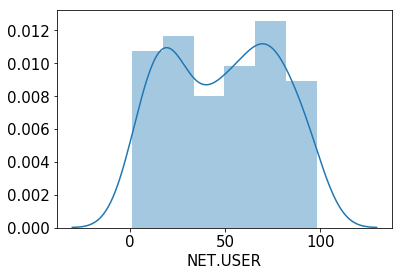

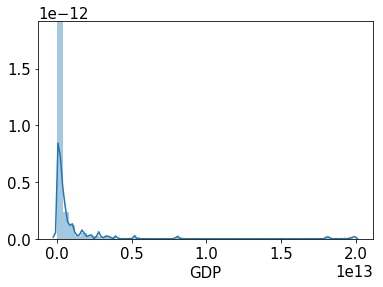

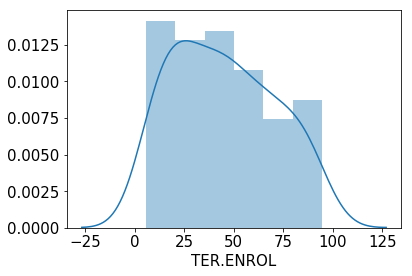

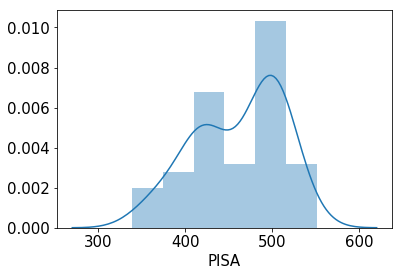

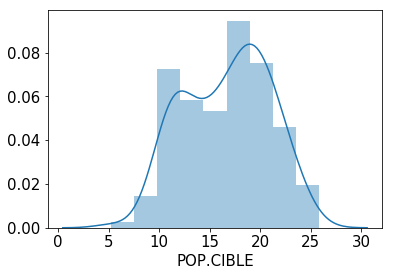

In [27]:
# Histogramme des indicateurs :
import seaborn as sns

indicators = ['NET.USER', 'GDP', 'TER.ENROL', 'PISA', 'POP.CIBLE']

for col in indicators:      
    plt.figure()
    sns.distplot(EdStatsData[col])

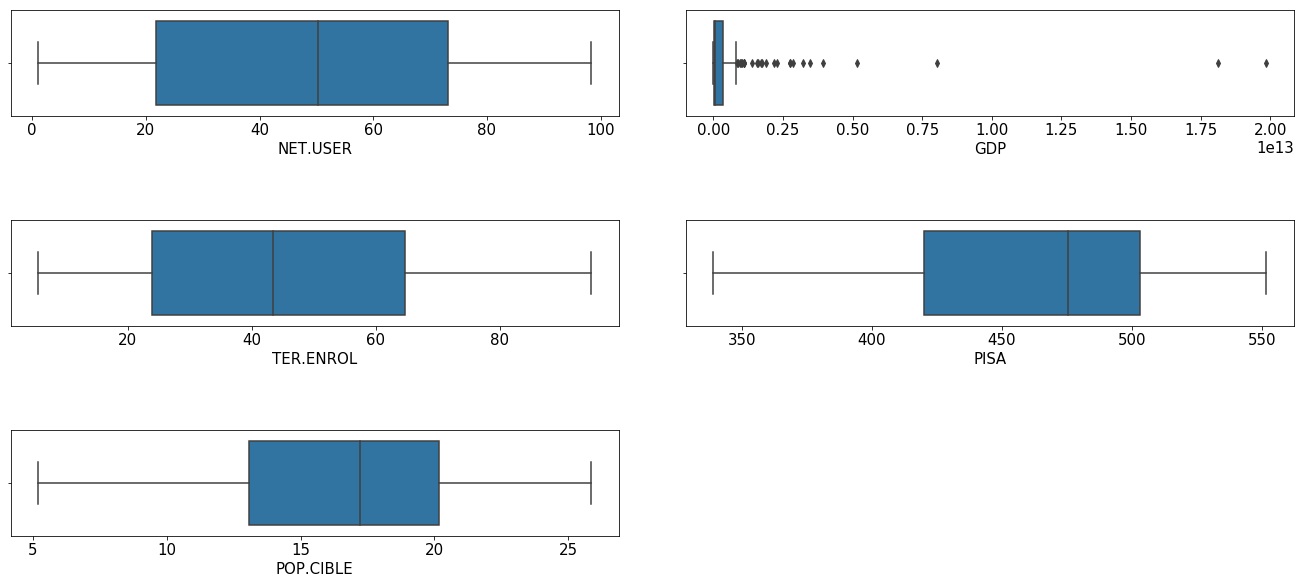

In [29]:
fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

plt.subplot(3,2,1)
# plt.title('Internet')
sns.boxplot(x='NET.USER', data=EdStatsData)

plt.subplot(3,2,2)
# plt.title('GDP')
sns.boxplot(x='GDP', data=EdStatsData)

plt.subplot(3,2,3)
# plt.title('TER.ENROL')
sns.boxplot(x='TER.ENROL', data=EdStatsData)

plt.subplot(3,2,4)
# plt.title('PISA')
sns.boxplot(x='PISA', data=EdStatsData)

plt.subplot(3,2,5)
# plt.title('POP.CIBLE')
sns.boxplot(x='POP.CIBLE', data=EdStatsData)

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)   # marges

plt.savefig( "boxplot.png", dpi=50 )
plt.show()

## Passage au LOGARITHME

In [30]:
EdStatsData['GDP']       = np.log(EdStatsData['GDP'])
EdStatsData.describe()

# Le but étant de comparer les variables entre elles, la fonction LOG appliquée à certaines variables, permet de les ramener 
#    à un ordre de grandeur comparable aux autres variables. C'est le cas pour GDP.

NET.USER         GDP   TER.ENROL        PISA   POP.CIBLE
count  201.000000  184.000000  100.000000   71.000000  180.000000
mean    48.785759   24.903175   44.863470  461.059427   16.681811
std     28.542027    2.384064   25.503212   50.781211    4.228912
min      1.083733   17.479392    5.621730  339.026167    5.213619
25%     21.725834   23.673964   24.013793  420.003800   13.082092
50%     50.300000   24.950863   43.405649  475.399633   17.230632
75%     73.098700   26.568591   64.801764  503.185000   20.155375
max     98.323610   30.619362   94.732300  551.621533   25.845099

## Standardisation

In [31]:
indicators = ['NET.USER', 'GDP', 'TER.ENROL', 'PISA', 'POP.CIBLE']

for col in indicators:  
    EdStatsData[col] = (EdStatsData[col] - EdStatsData[col].mean()) / EdStatsData[col].std()
EdStatsData.describe()


# Données standardisées =>  (moyenne=0, écart-type=1)

NET.USER           GDP     TER.ENROL          PISA     POP.CIBLE
count  2.010000e+02  1.840000e+02  1.000000e+02  7.100000e+01  1.800000e+02
mean   1.072663e-15  2.154376e-15  2.087219e-16 -2.054694e-15 -4.810966e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.671291e+00 -3.113920e+00 -1.538698e+00 -2.403118e+00 -2.711854e+00
25%   -9.480730e-01 -5.155950e-01 -8.175315e-01 -8.084807e-01 -8.512164e-01
50%    5.305301e-02  2.000264e-02 -5.716226e-02  2.823920e-01  1.297784e-01
75%    8.518295e-01  6.985617e-01  7.817954e-01  8.295504e-01  8.213848e-01
max    1.735611e+00  2.397665e+00  1.955394e+00  1.783378e+00  2.166819e+00

## Analyse univariée  Aprés  traitement des données

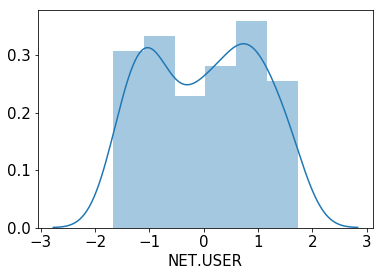

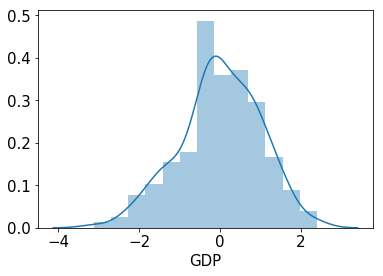

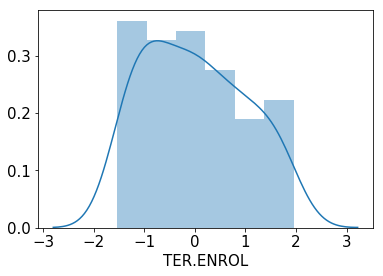

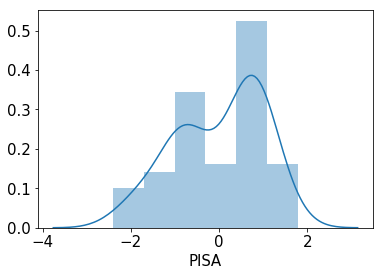

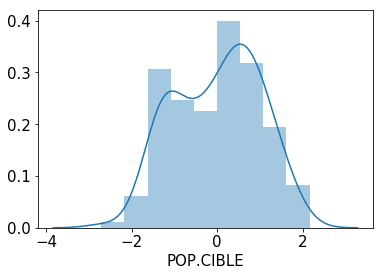

In [32]:
# Histogramme des indicateurs :
import seaborn as sns

indicators = ['NET.USER', 'GDP', 'TER.ENROL', 'PISA', 'POP.CIBLE']

for col in indicators:      
    plt.figure()
    sns.distplot(EdStatsData[col])
    

## Analyse bivariée

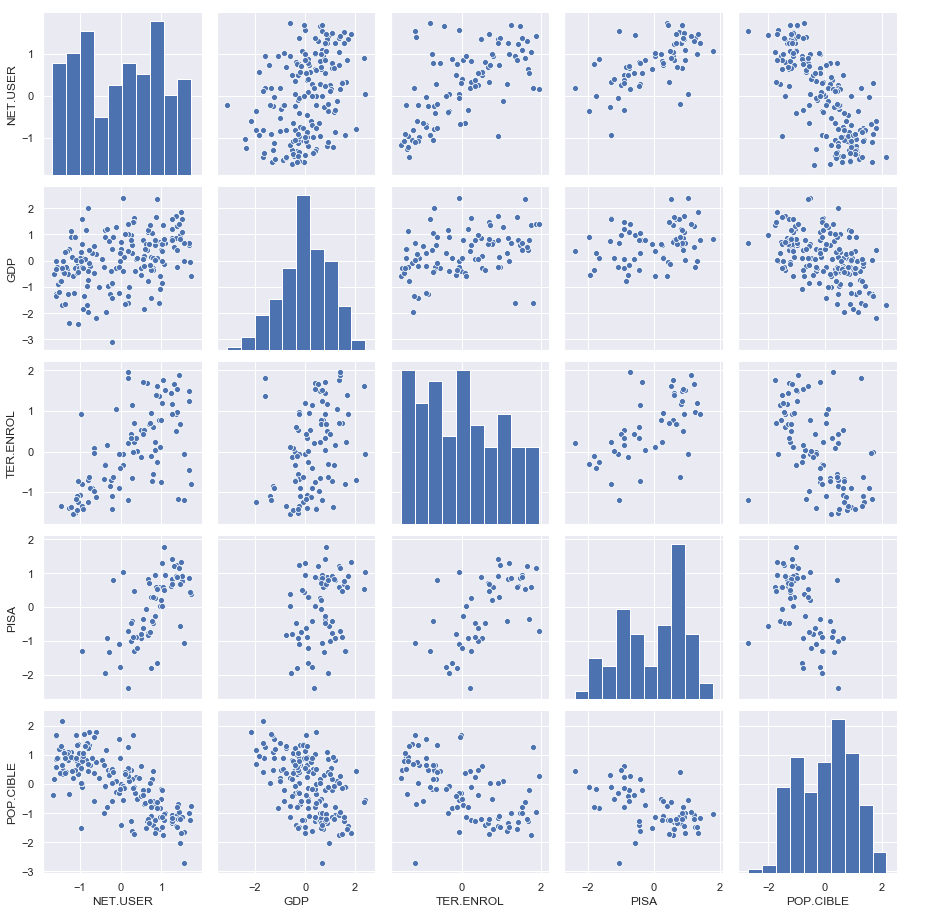

In [33]:
sns.set()
sns.pairplot(EdStatsData);
plt.savefig('corr')
plt.savefig( "analyse_bivar.png", dpi=50 )
plt.show()

NET.USER       GDP  TER.ENROL      PISA  POP.CIBLE
NET.USER   1.000000  0.392999   0.641903  0.635971  -0.773213
GDP        0.392999  1.000000   0.349413  0.297533  -0.514866
TER.ENROL  0.641903  0.349413   1.000000  0.597675  -0.560265
PISA       0.635971  0.297533   0.597675  1.000000  -0.527614
POP.CIBLE -0.773213 -0.514866  -0.560265 -0.527614   1.000000

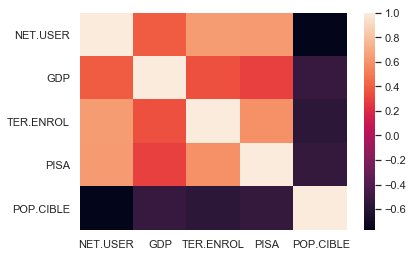

In [34]:
# Matrice de corrélation heatmap :

sns.heatmap(EdStatsData.corr())
EdStatsData.corr()

# Matrice des corrélations qui donne les coefs de corrélations linéaires,
#  sous entend que si il y a corrélation, elle est de type linéaire.
# Un coefficient nul n’implique pas indépendance, car d’autres types de corrélation sont possibles.

## Analyse multi-variée

(NET.USER * GDP)  -  TER.ENROL


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1440x1440 with 0 Axes>

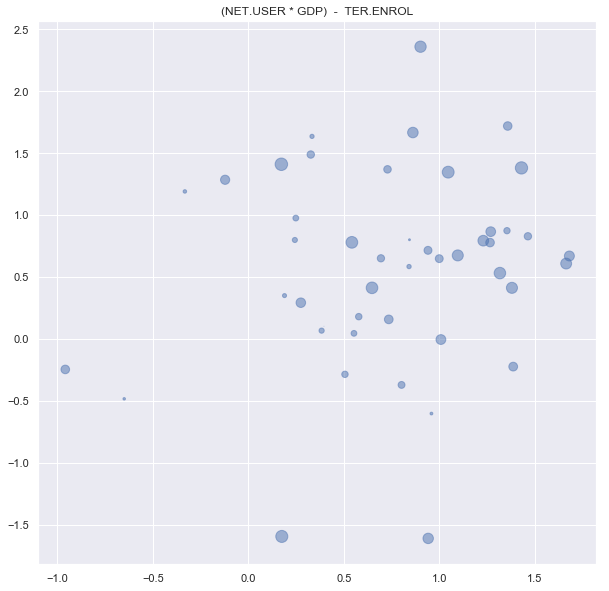

(NET.USER * GDP)  -  PISA


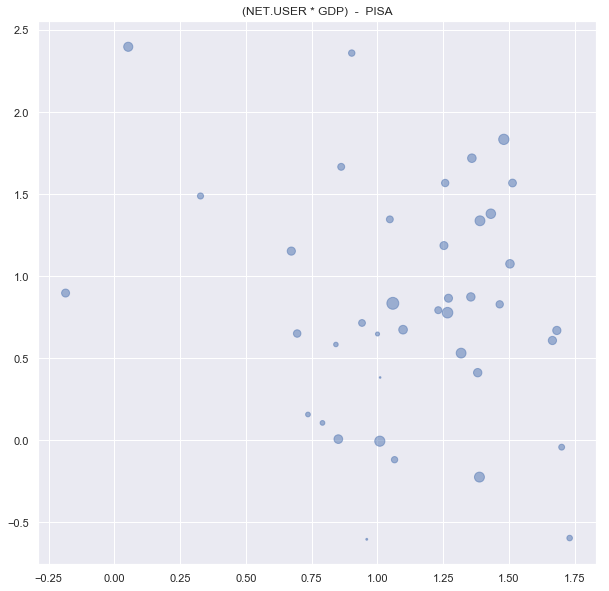

(NET.USER * GDP)  -  POP.CIBLE


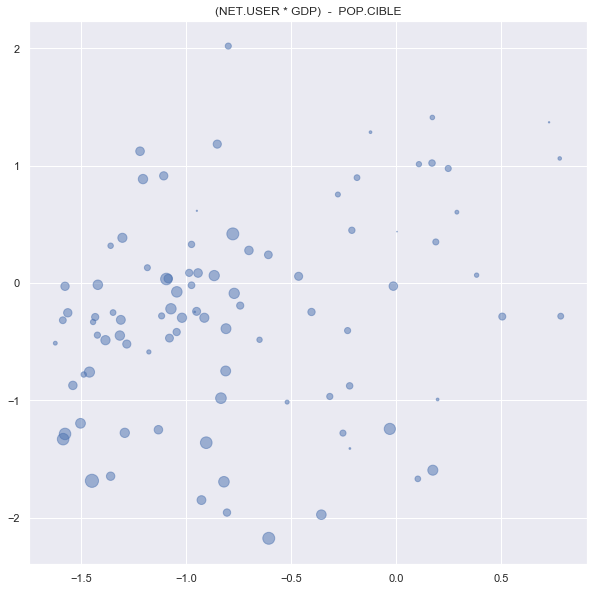

(NET.USER * TER.ENROL)  -  GDP


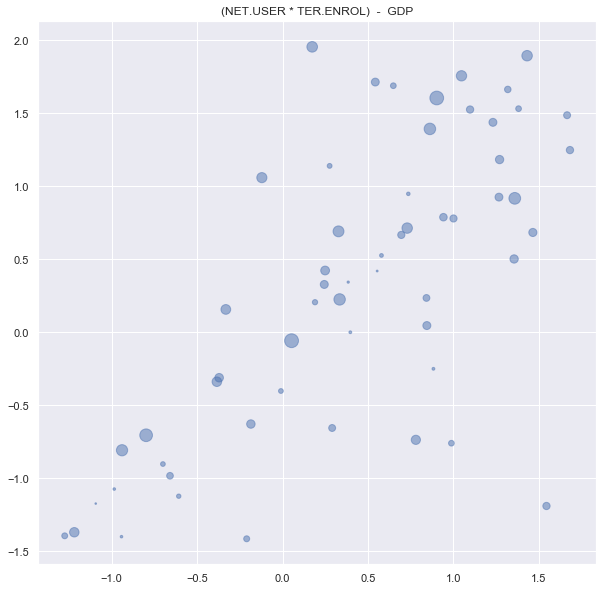

(NET.USER * TER.ENROL)  -  PISA


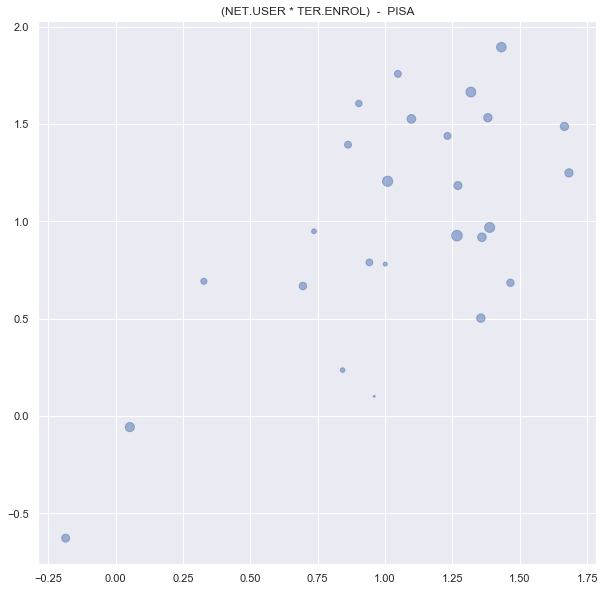

(NET.USER * TER.ENROL)  -  POP.CIBLE


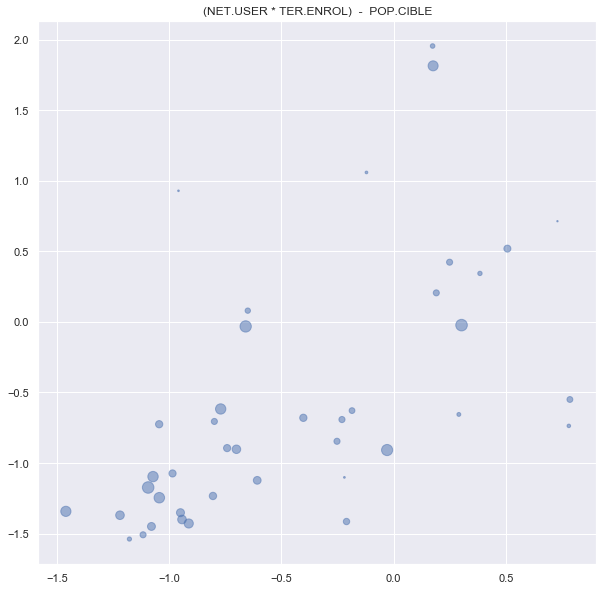

(NET.USER * PISA)  -  GDP


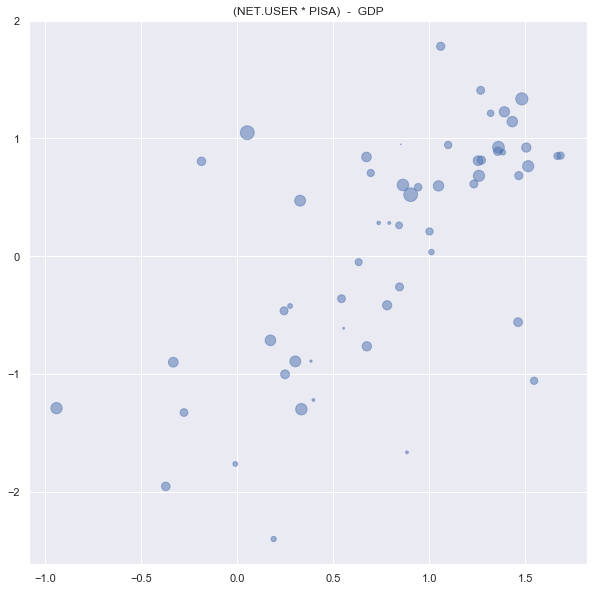

(NET.USER * PISA)  -  TER.ENROL


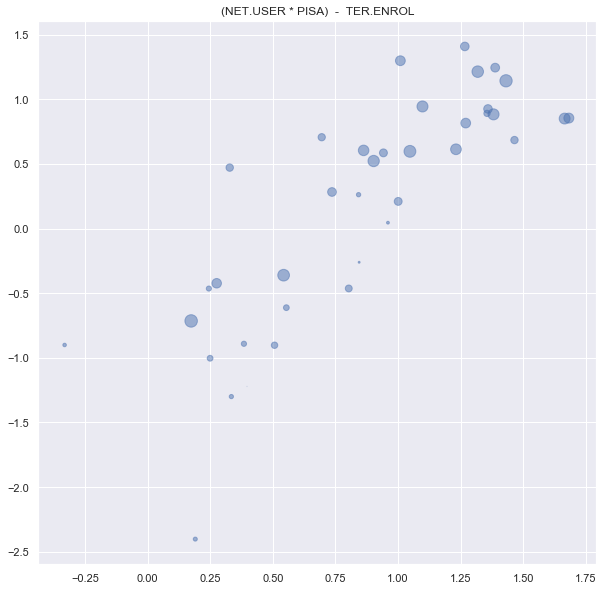

(NET.USER * PISA)  -  POP.CIBLE


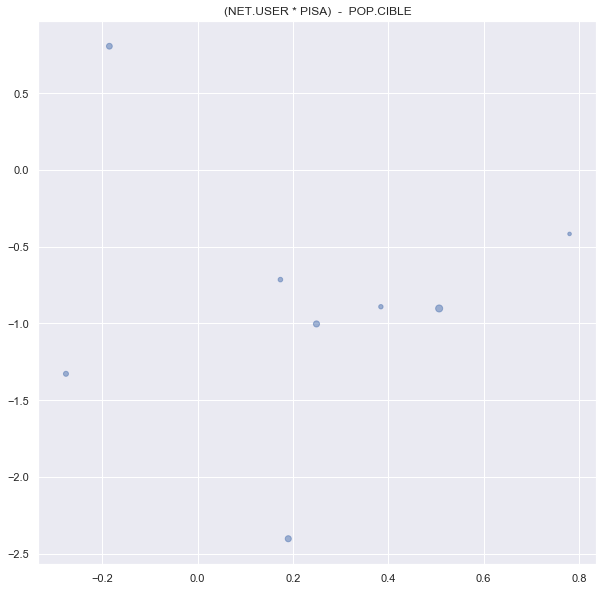

(NET.USER * POP.CIBLE)  -  GDP


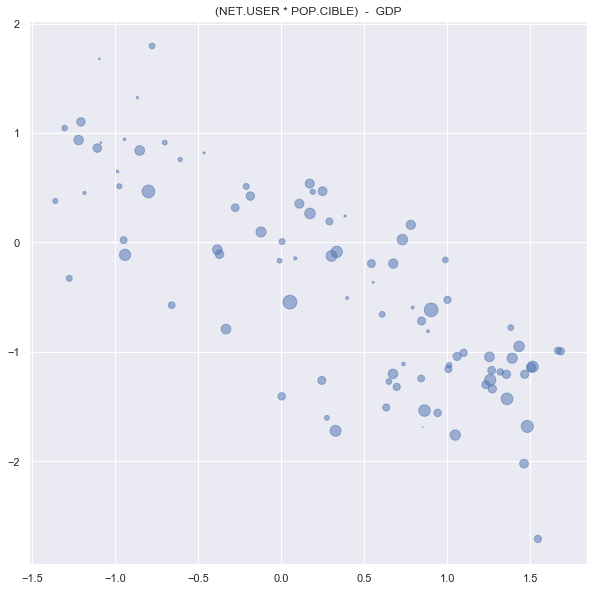

(NET.USER * POP.CIBLE)  -  TER.ENROL


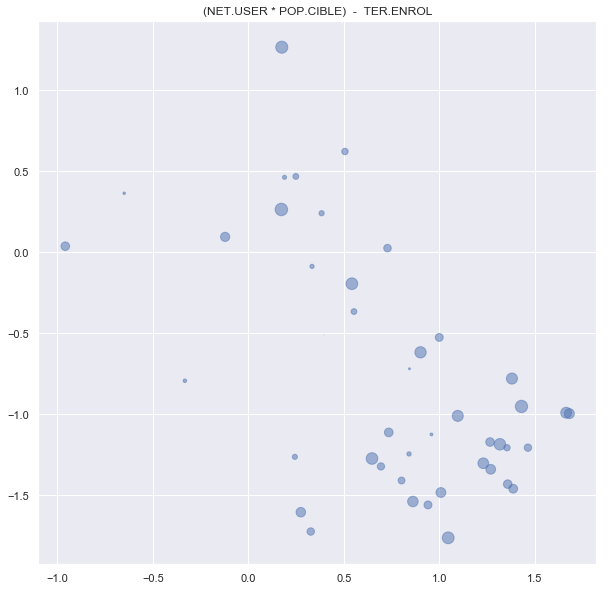

(NET.USER * POP.CIBLE)  -  PISA


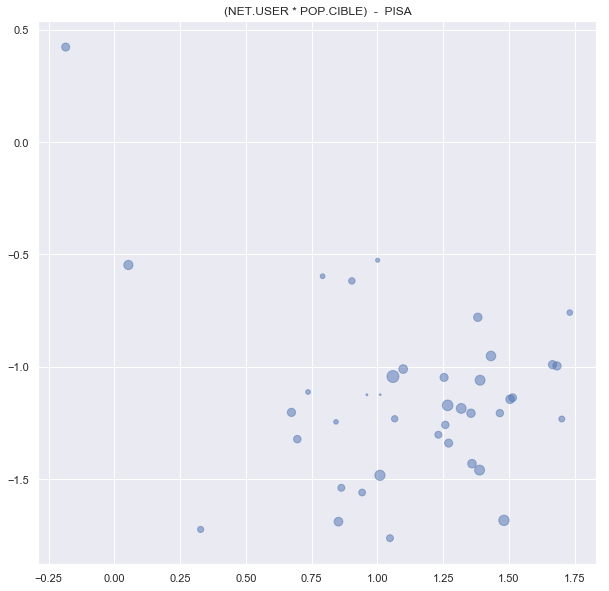

(GDP * NET.USER)  -  TER.ENROL


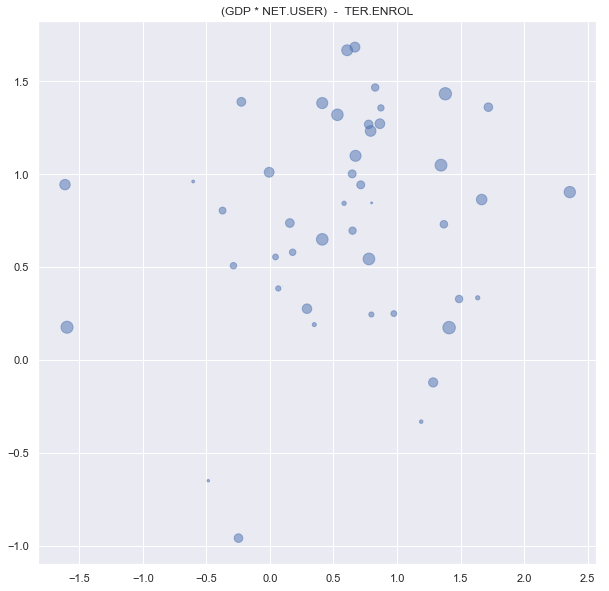

(GDP * NET.USER)  -  PISA


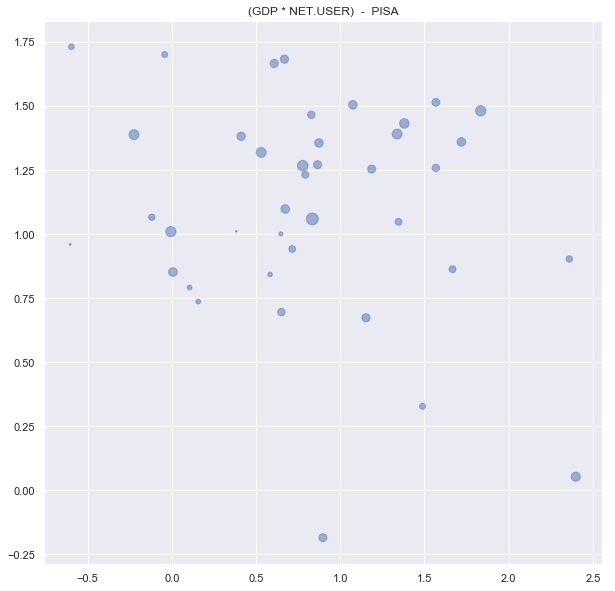

(GDP * NET.USER)  -  POP.CIBLE


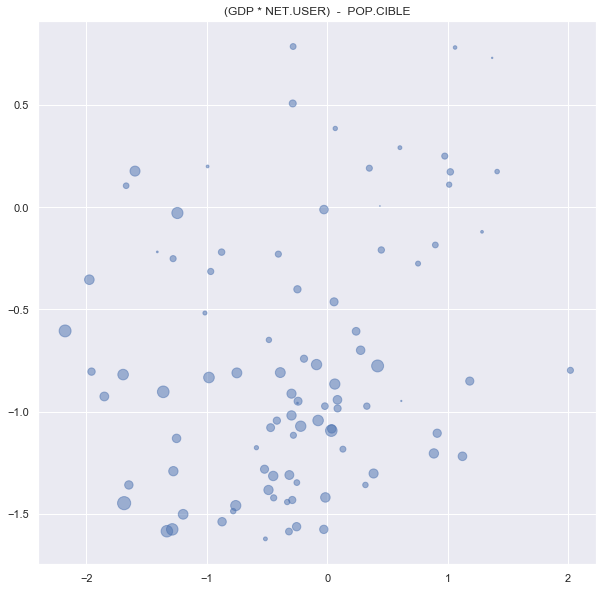

(GDP * TER.ENROL)  -  NET.USER


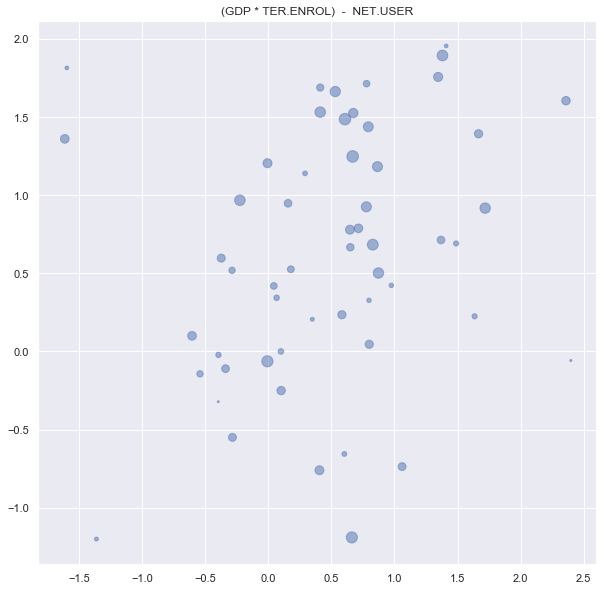

(GDP * TER.ENROL)  -  PISA


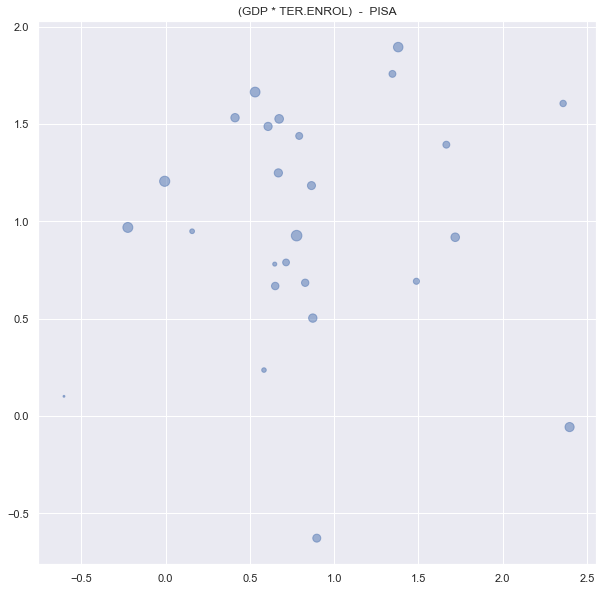

(GDP * TER.ENROL)  -  POP.CIBLE


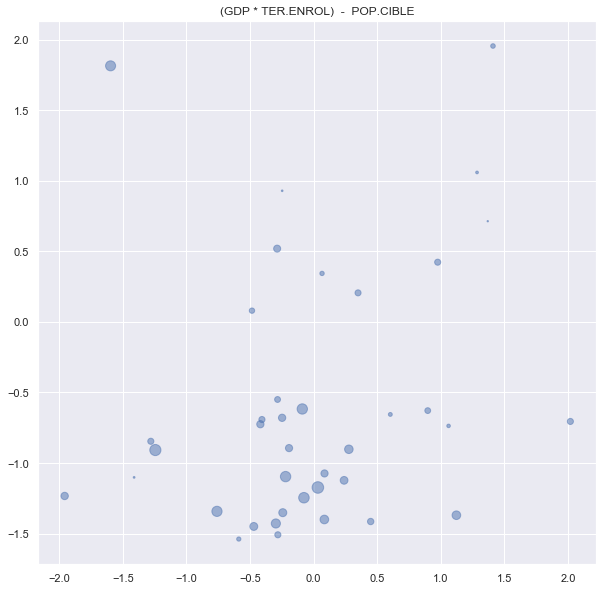

(GDP * PISA)  -  NET.USER


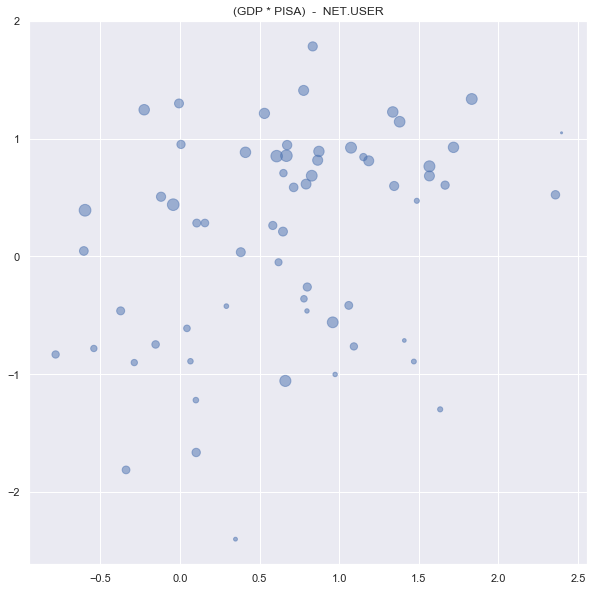

(GDP * PISA)  -  TER.ENROL


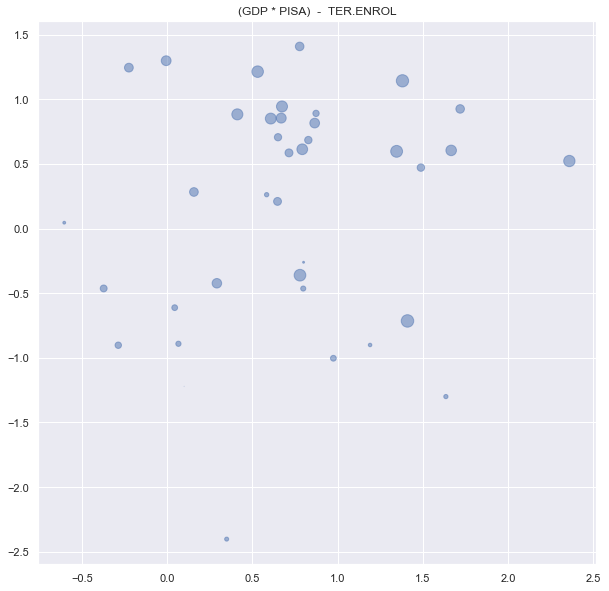

(GDP * PISA)  -  POP.CIBLE


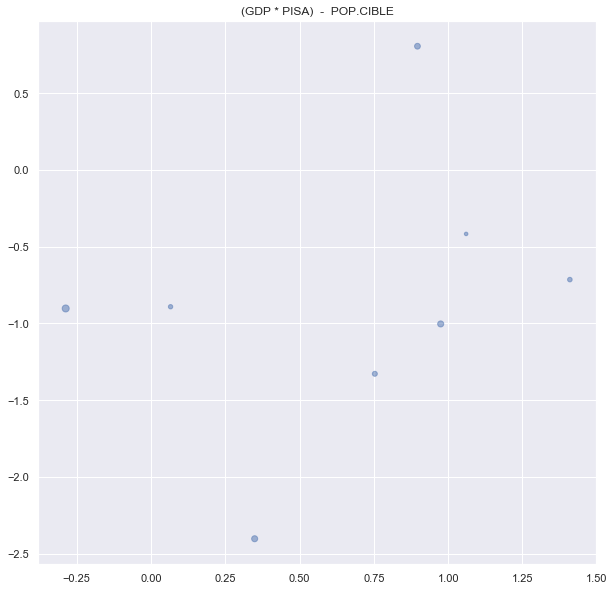

(GDP * POP.CIBLE)  -  NET.USER


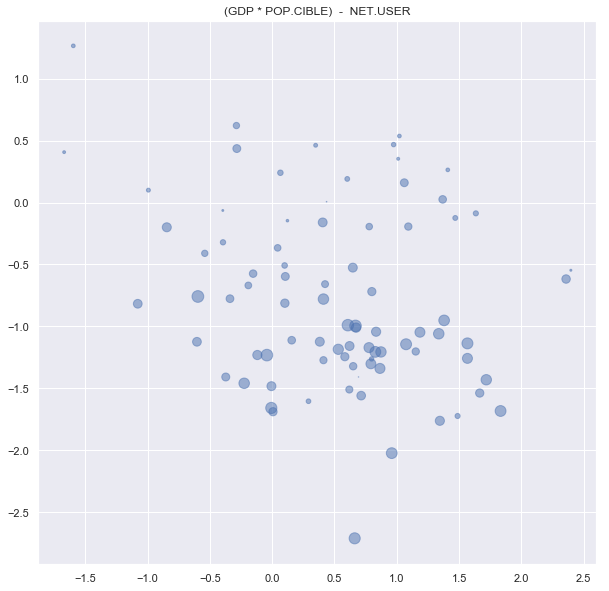

(GDP * POP.CIBLE)  -  TER.ENROL


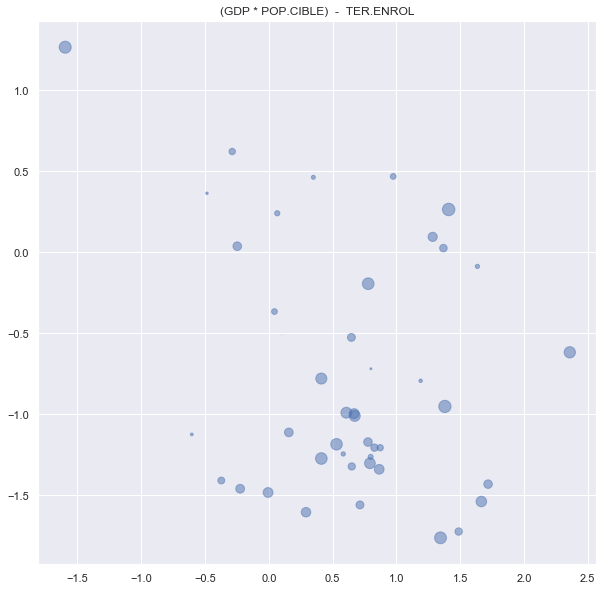

(GDP * POP.CIBLE)  -  PISA


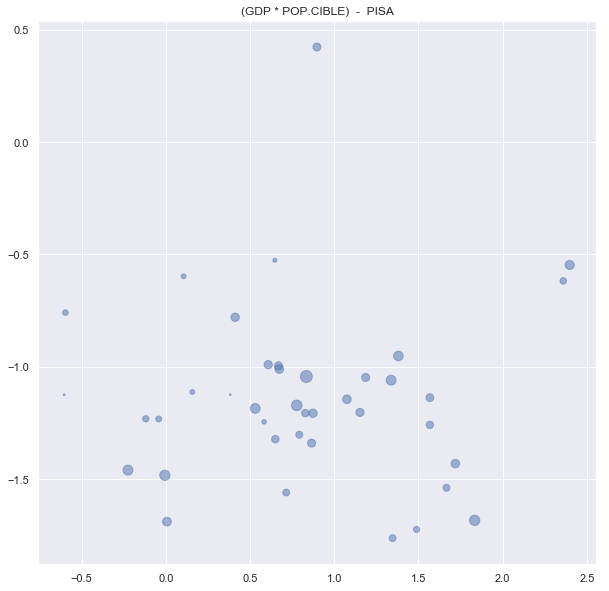

(TER.ENROL * NET.USER)  -  GDP


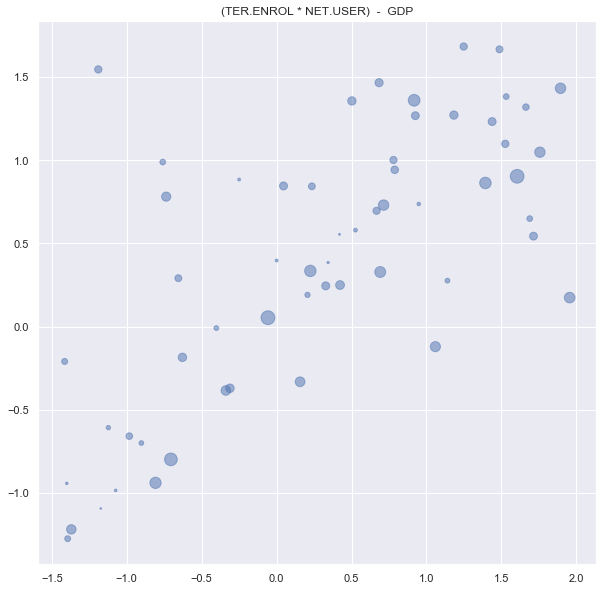

(TER.ENROL * NET.USER)  -  PISA


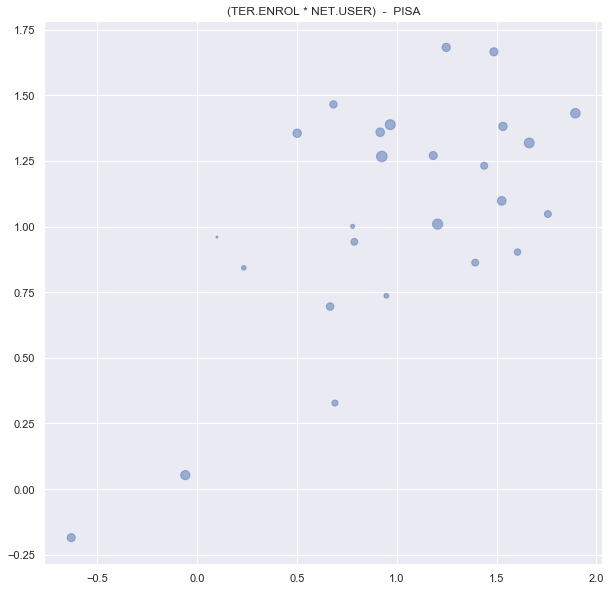

(TER.ENROL * NET.USER)  -  POP.CIBLE


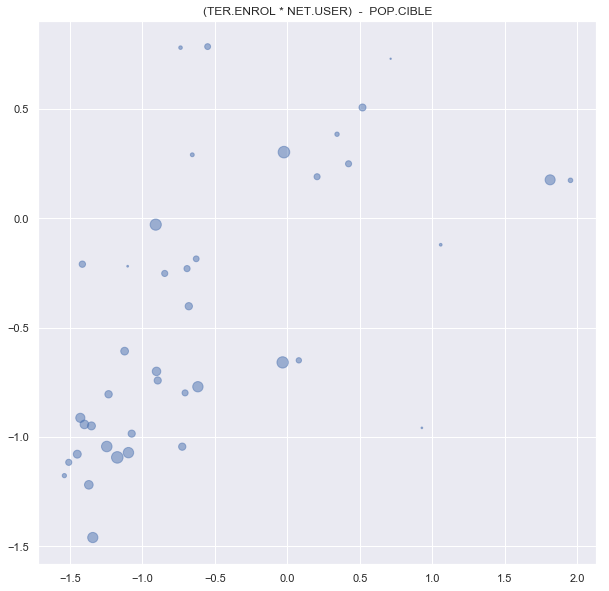

(TER.ENROL * GDP)  -  NET.USER


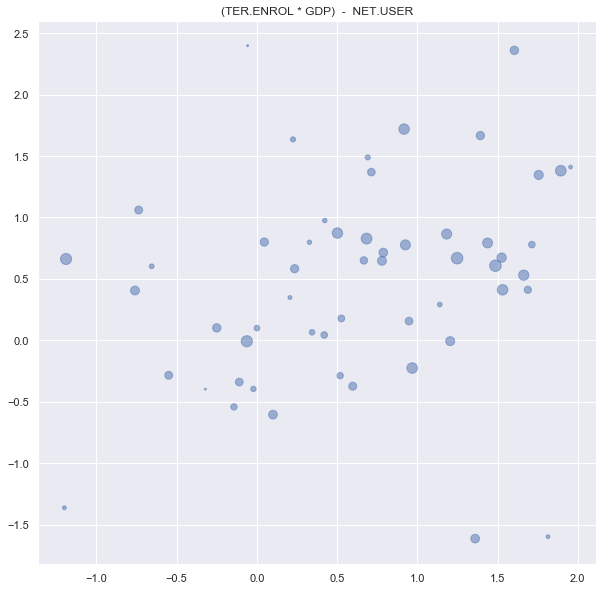

(TER.ENROL * GDP)  -  PISA


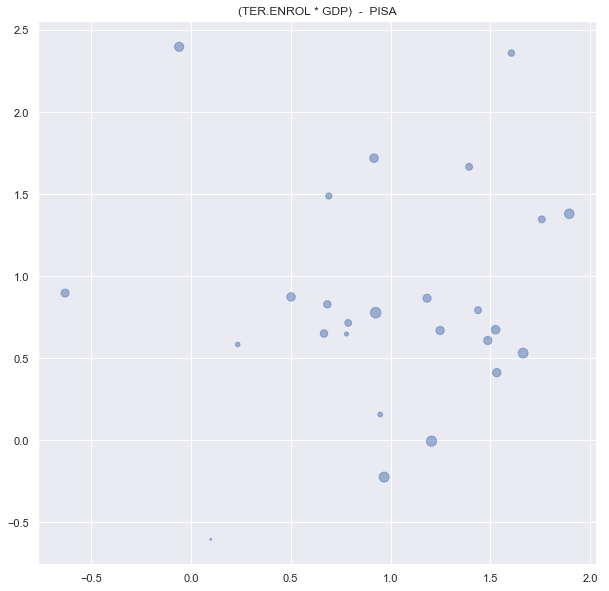

(TER.ENROL * GDP)  -  POP.CIBLE


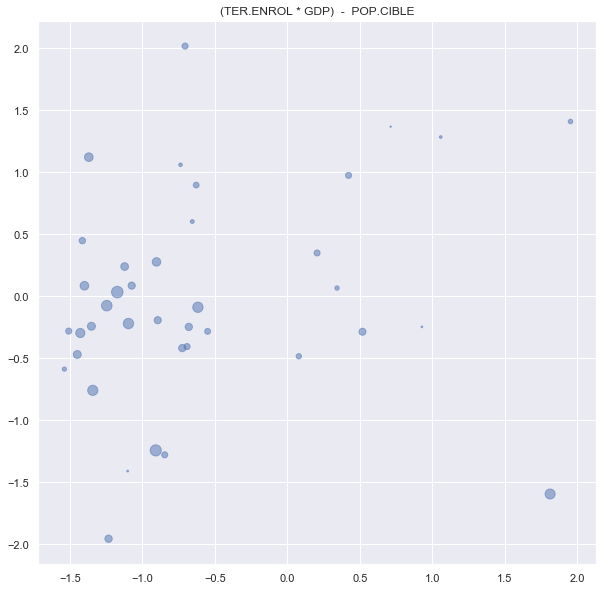

(TER.ENROL * PISA)  -  NET.USER


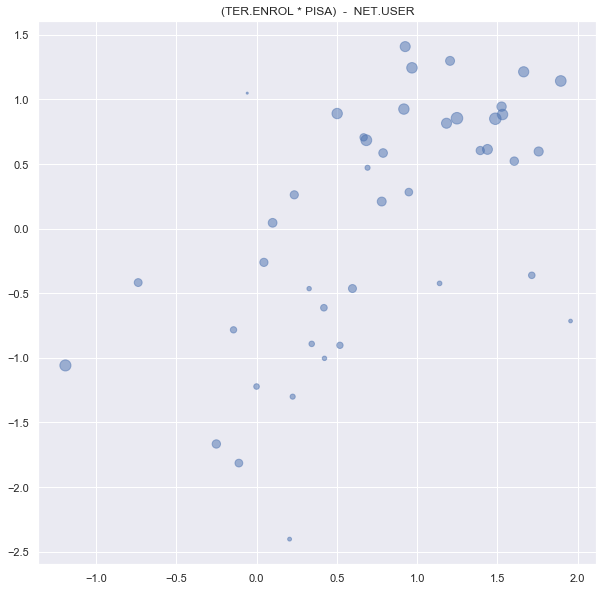

(TER.ENROL * PISA)  -  GDP


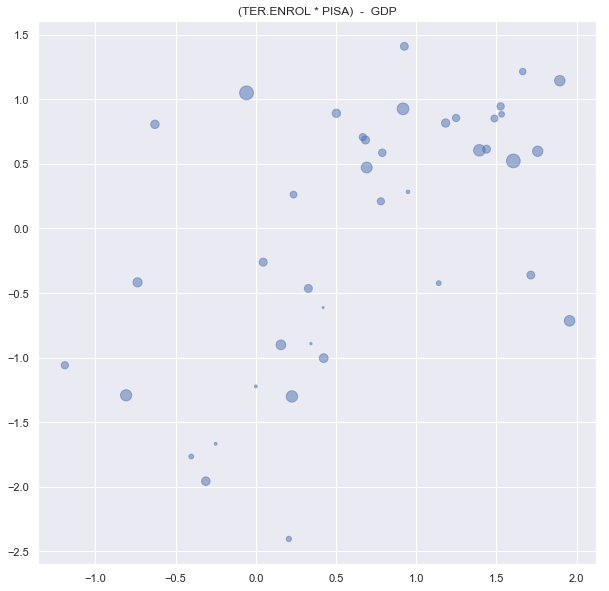

(TER.ENROL * PISA)  -  POP.CIBLE


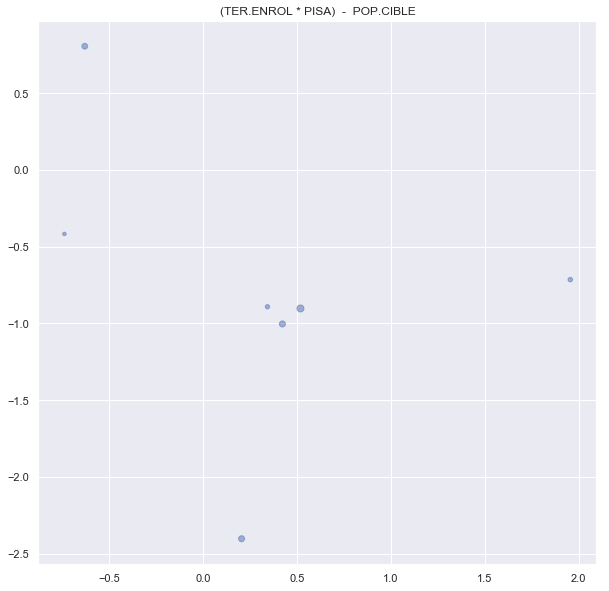

(TER.ENROL * POP.CIBLE)  -  NET.USER


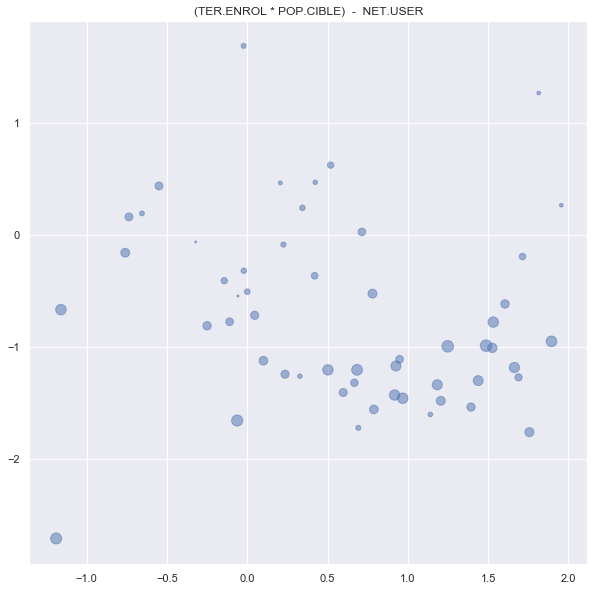

(TER.ENROL * POP.CIBLE)  -  GDP


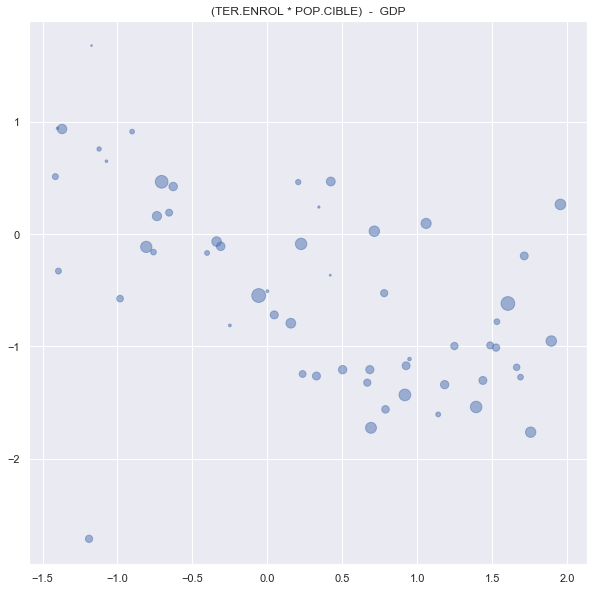

(TER.ENROL * POP.CIBLE)  -  PISA


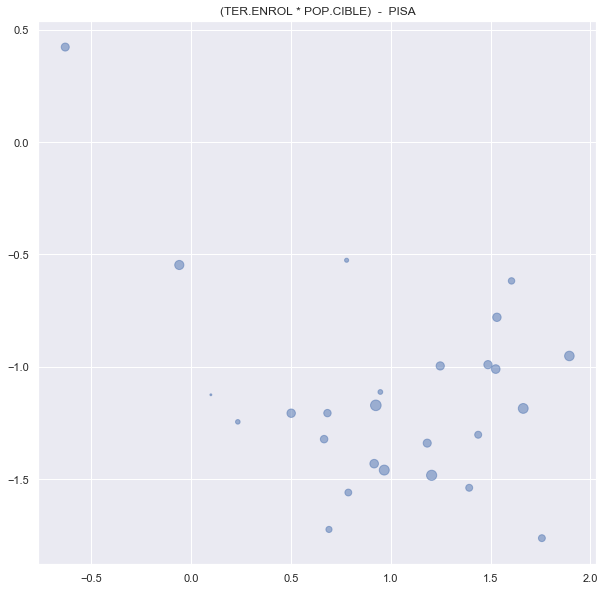

(PISA * NET.USER)  -  GDP


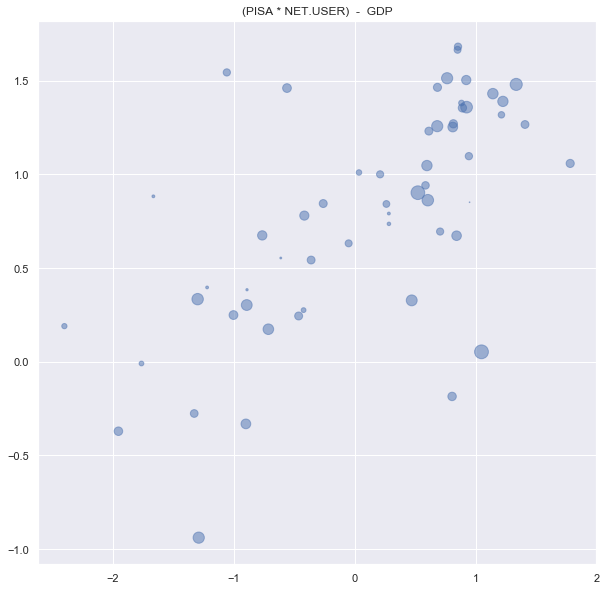

(PISA * NET.USER)  -  TER.ENROL


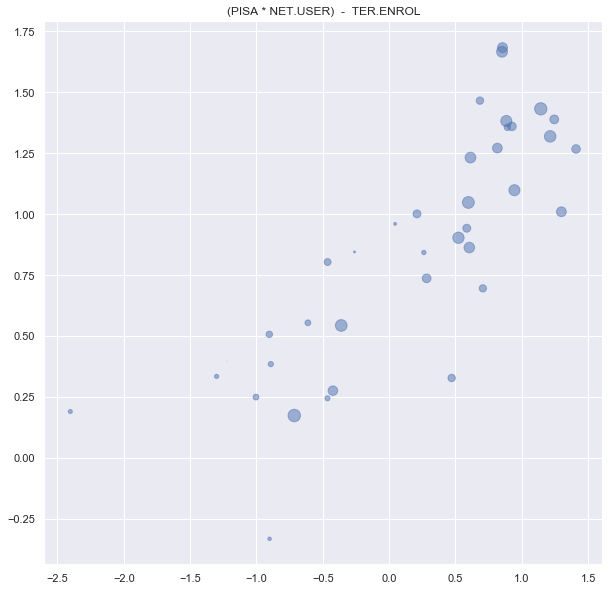

(PISA * NET.USER)  -  POP.CIBLE


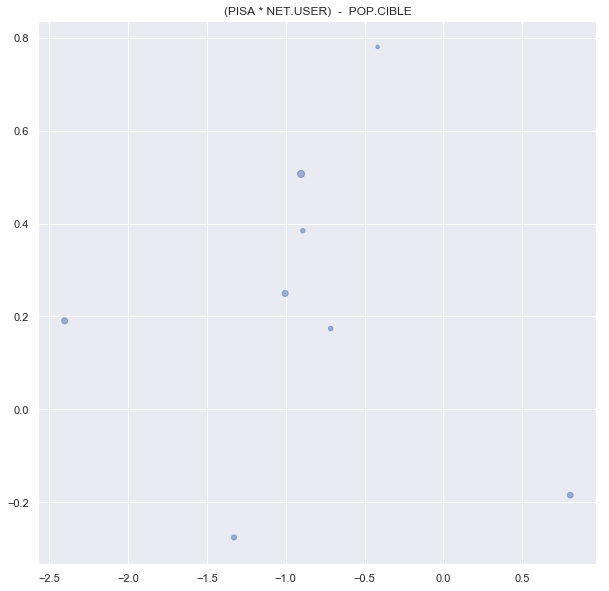

(PISA * GDP)  -  NET.USER


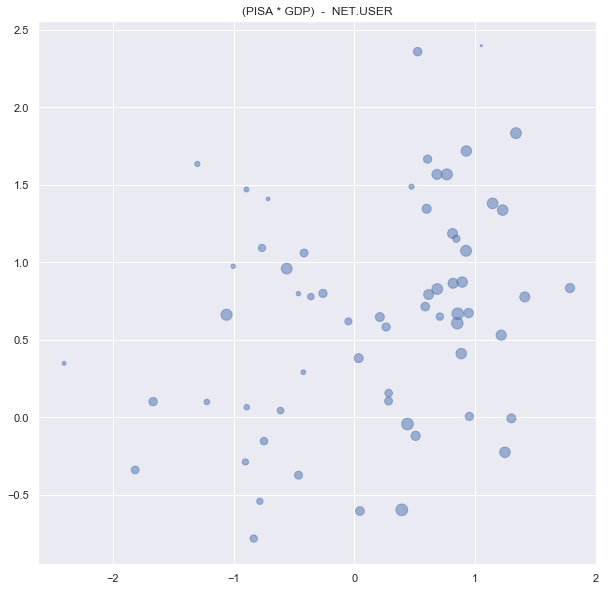

(PISA * GDP)  -  TER.ENROL


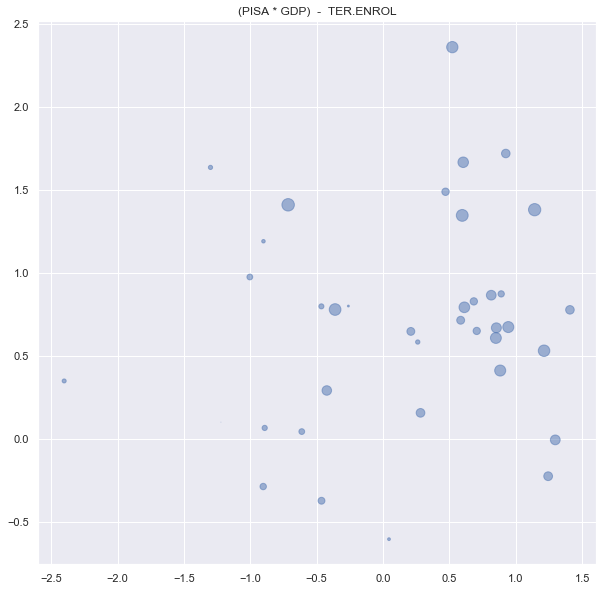

(PISA * GDP)  -  POP.CIBLE


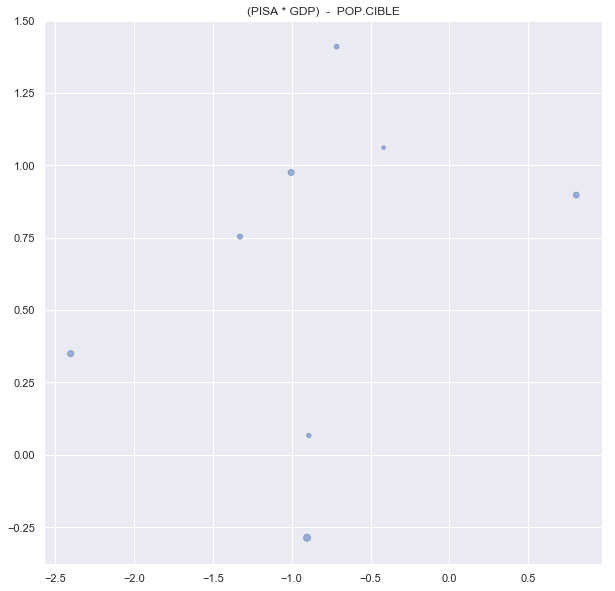

(PISA * TER.ENROL)  -  NET.USER


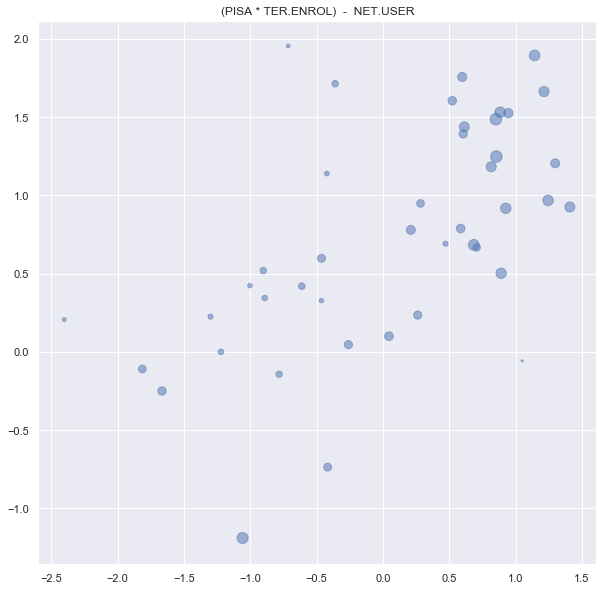

(PISA * TER.ENROL)  -  GDP


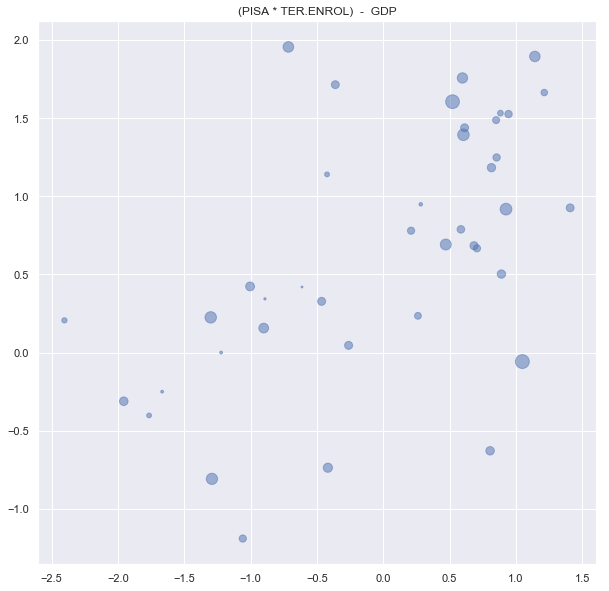

(PISA * TER.ENROL)  -  POP.CIBLE


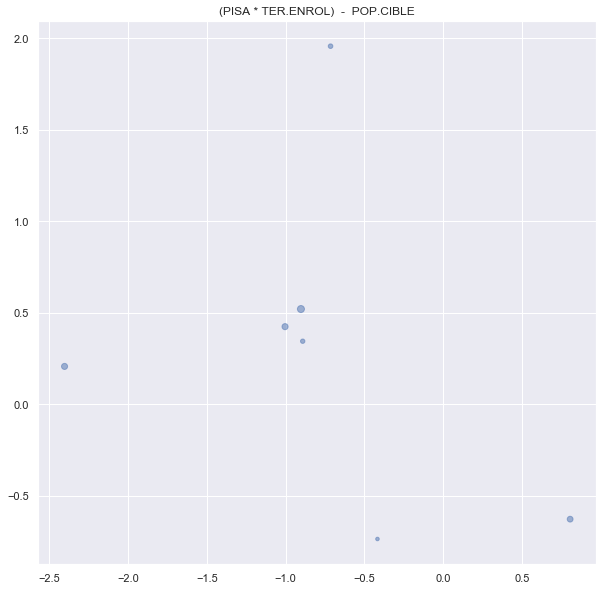

(PISA * POP.CIBLE)  -  NET.USER


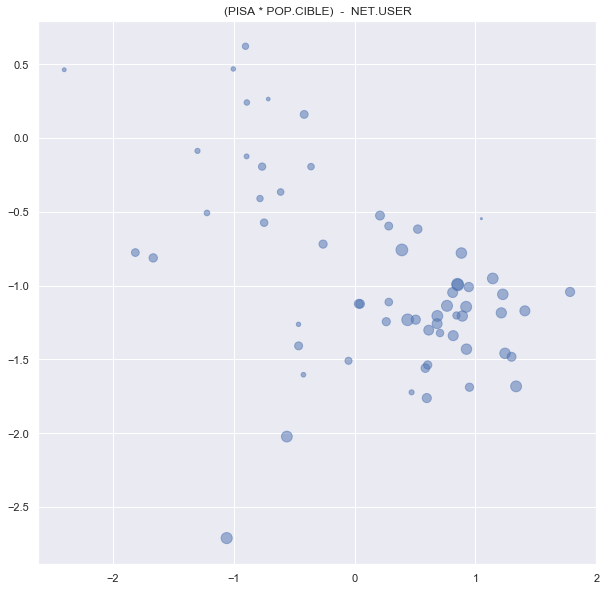

(PISA * POP.CIBLE)  -  GDP


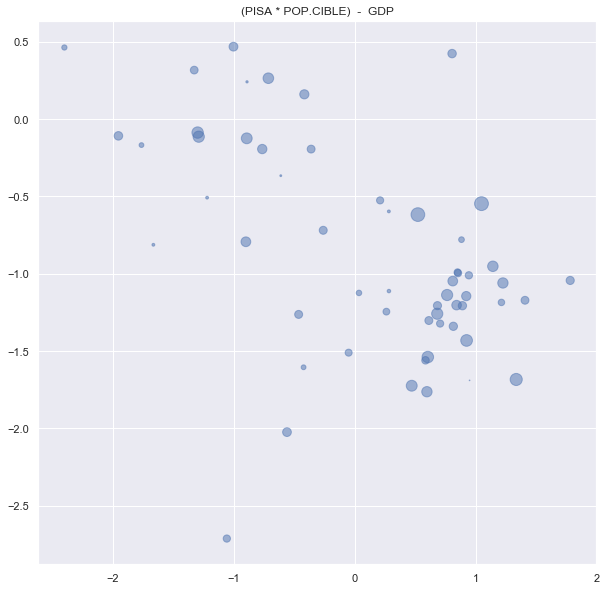

(PISA * POP.CIBLE)  -  TER.ENROL


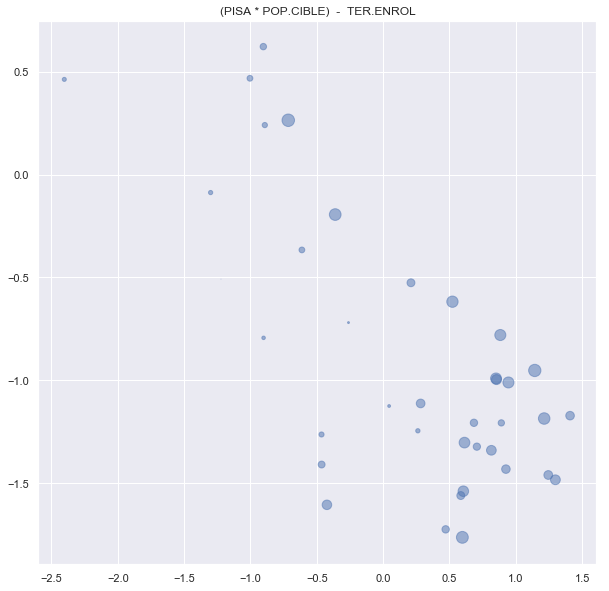

(POP.CIBLE * NET.USER)  -  GDP


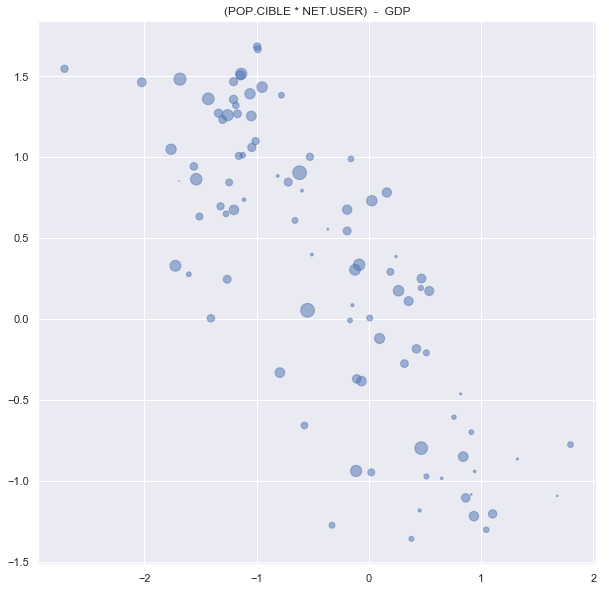

(POP.CIBLE * NET.USER)  -  TER.ENROL


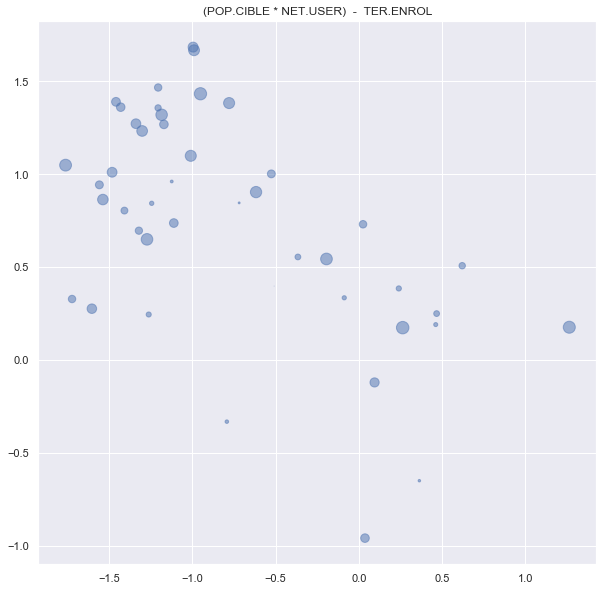

(POP.CIBLE * NET.USER)  -  PISA


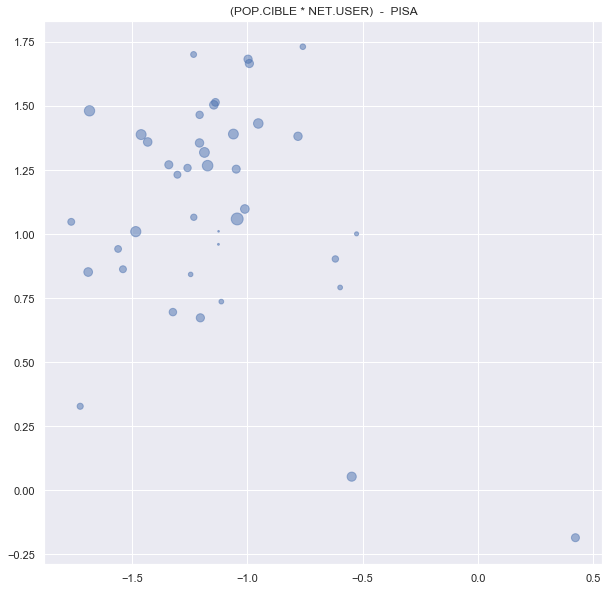

(POP.CIBLE * GDP)  -  NET.USER


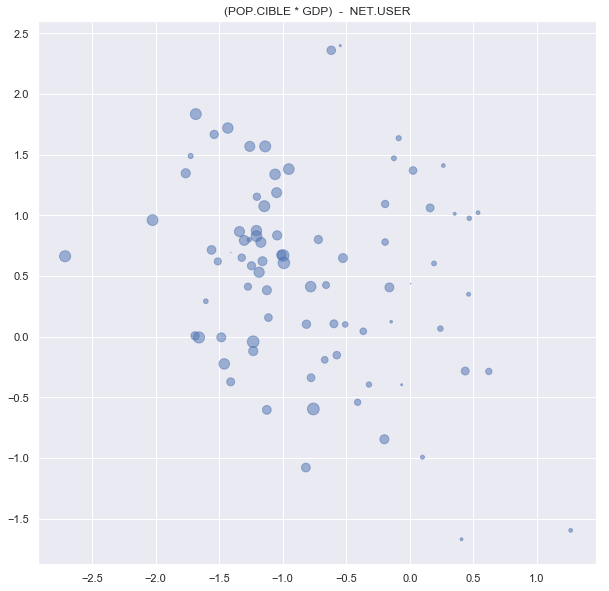

(POP.CIBLE * GDP)  -  TER.ENROL


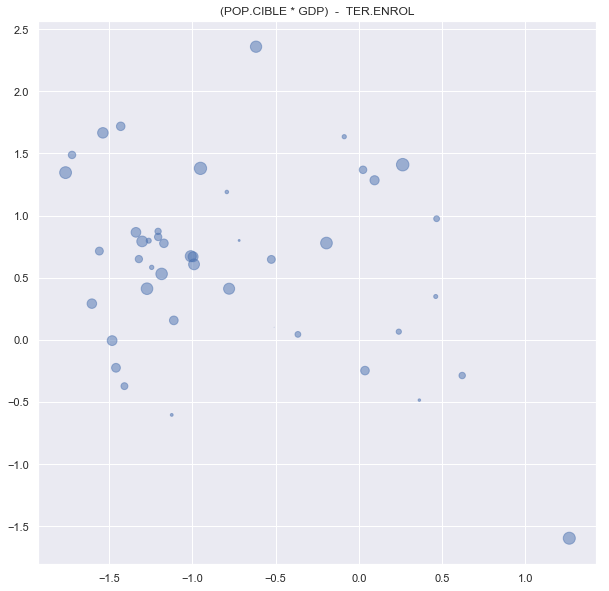

(POP.CIBLE * GDP)  -  PISA


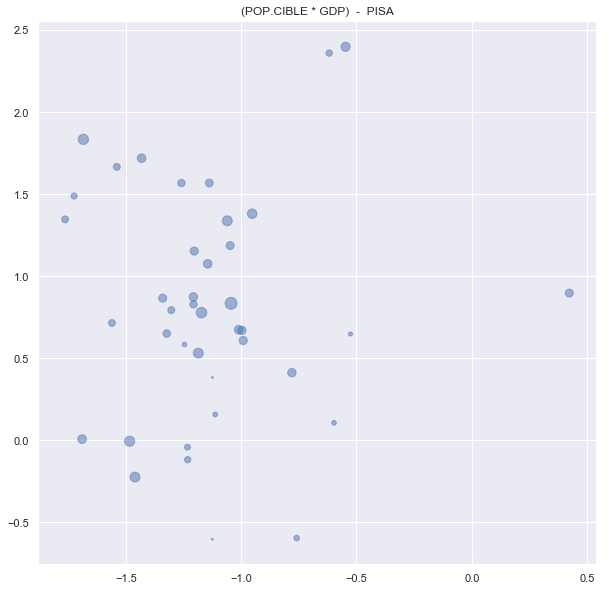

(POP.CIBLE * TER.ENROL)  -  NET.USER


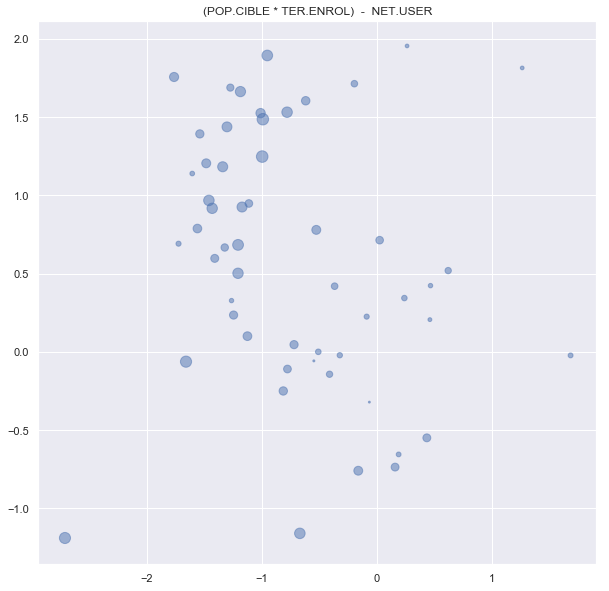

(POP.CIBLE * TER.ENROL)  -  GDP


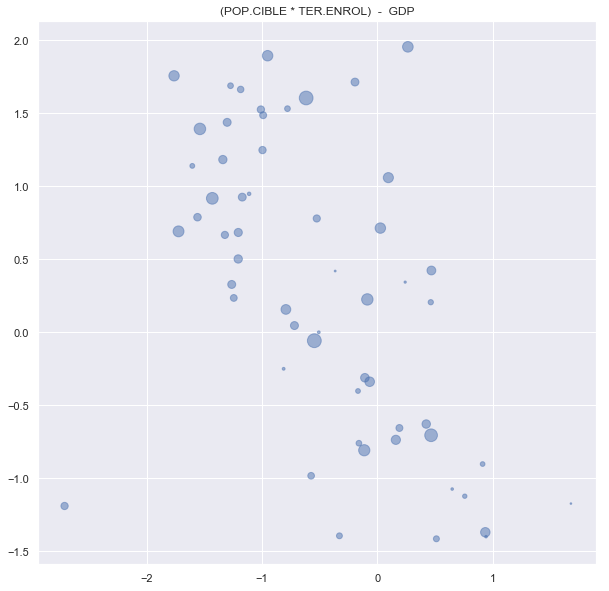

(POP.CIBLE * TER.ENROL)  -  PISA


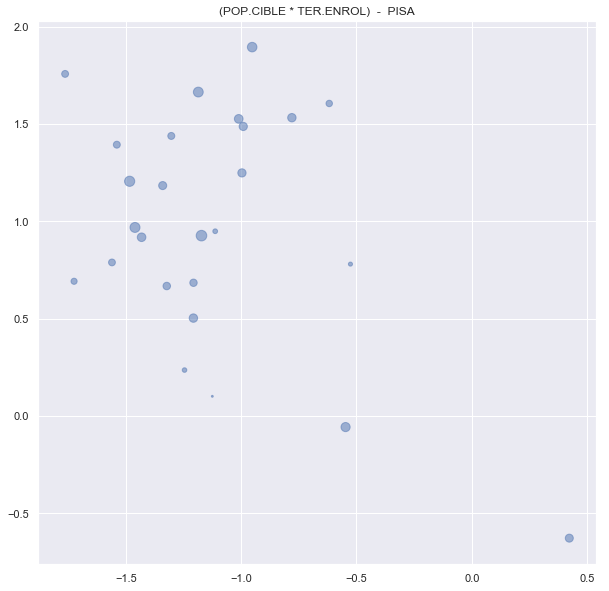

(POP.CIBLE * PISA)  -  NET.USER


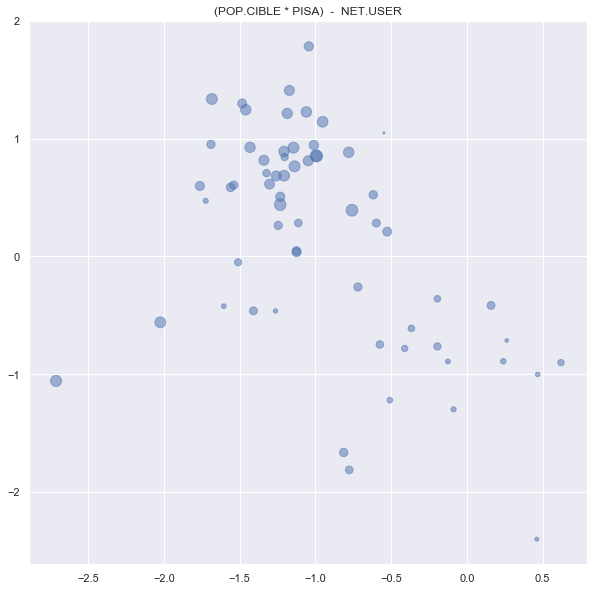

(POP.CIBLE * PISA)  -  GDP


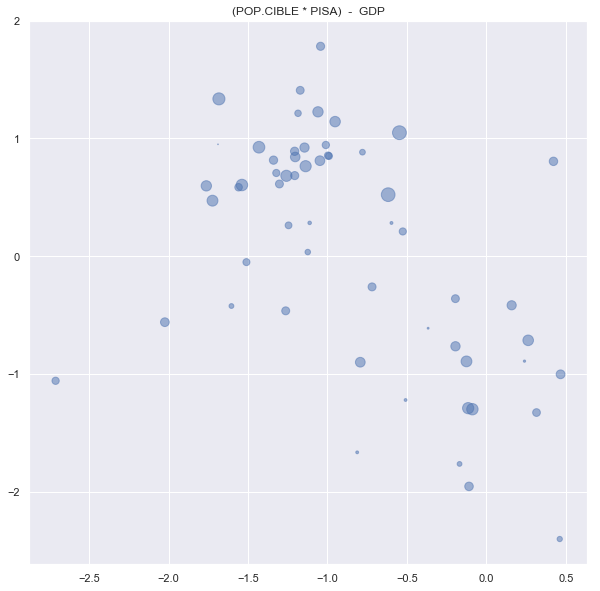

(POP.CIBLE * PISA)  -  TER.ENROL


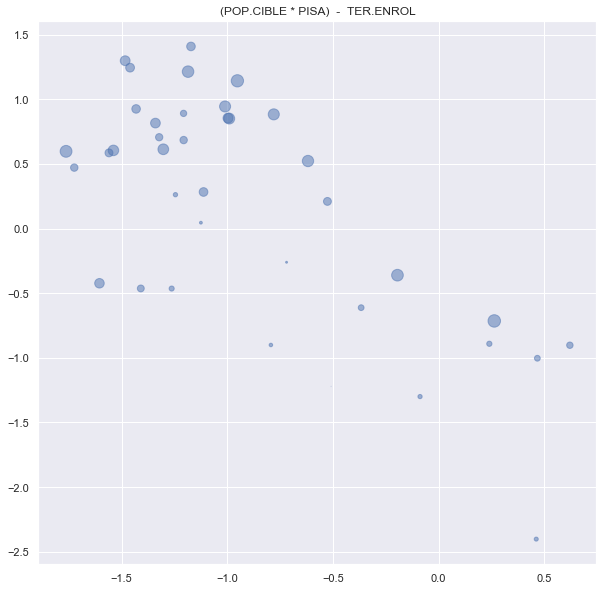

Nombre de figures= 60


In [35]:
# Graphiques à bulles pour représenter 3 variables, la 3eme étant représentée par le diametre du point.

indicators = ['NET.USER', 'GDP', 'TER.ENROL', 'PISA', 'POP.CIBLE']
nbFig=0
fig = plt.figure(figsize = (20, 20))

for ind1 in indicators:
    for ind2 in indicators:
        if (ind1 == ind2):
            continue
        for ind3 in indicators:
            if ((ind3 == ind1) | (ind3 == ind2)):
                continue
            fig = plt.figure(figsize = (10, 10))
            plt.title('({0} * {1})  -  {2}'.format(ind1, ind2, ind3))
            print('({0} * {1})  -  {2}'.format(ind1, ind2, ind3))
            plt.scatter(EdStatsData[ind1], EdStatsData[ind2], alpha=0.5, s=EdStatsData[ind3]*80)
            plt.show()
            nbFig+=1
            
print("Nombre de figures=", nbFig)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


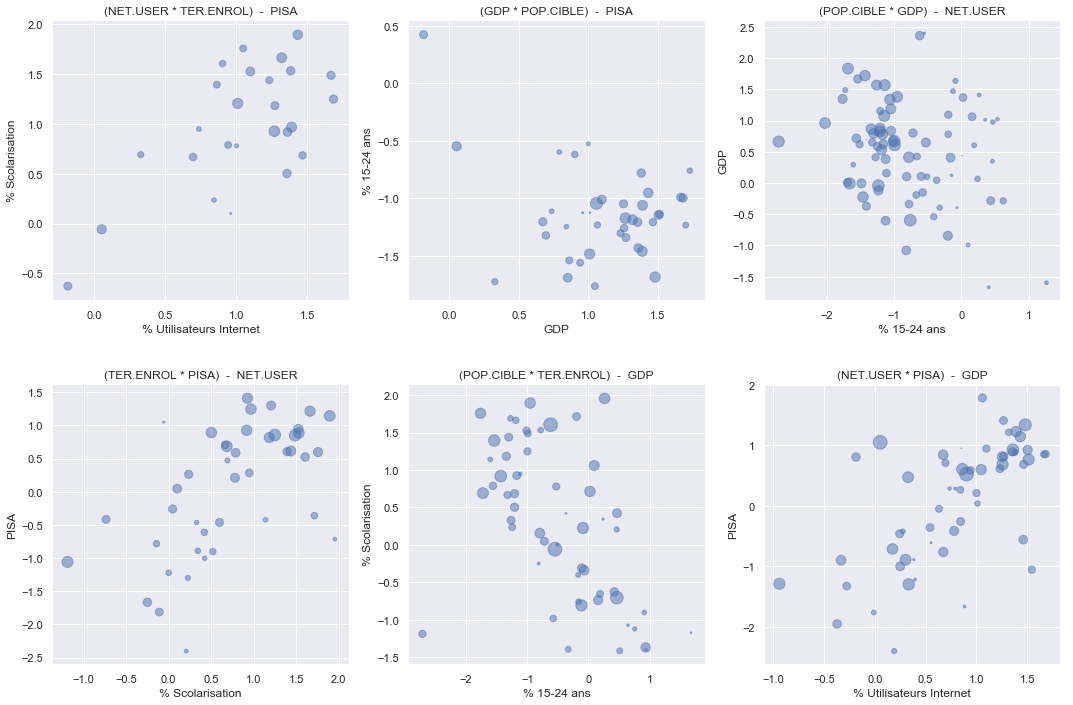

In [36]:
# graphiques à bulles aprés sélection

fig = plt.figure(figsize = (20, 20))   # largeur,hauteur
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.3)

# 1. Comment varie PISA en fonction des autres indicateurs:
plt.subplot(3,3,1)
plt.title('(NET.USER * TER.ENROL)  -  PISA')
plt.scatter(EdStatsData['NET.USER'], EdStatsData['TER.ENROL'], alpha=0.5, s=EdStatsData['PISA']*80)
plt.xlabel('% Utilisateurs Internet')
plt.ylabel('% Scolarisation')

plt.subplot(3,3,2)
plt.title('(GDP * POP.CIBLE)  -  PISA')
plt.scatter(EdStatsData['NET.USER'], EdStatsData['POP.CIBLE'], alpha=0.5, s=EdStatsData['PISA']*80)
plt.xlabel('GDP')
plt.ylabel('% 15-24 ans')


# 2. Comment varie le % d'utilisation internet en fonction des autres indicateurs:
plt.subplot(3,3,3)
plt.title('(POP.CIBLE * GDP)  -  NET.USER')
plt.scatter(EdStatsData['POP.CIBLE'], EdStatsData['GDP'], alpha=0.5, s=EdStatsData['NET.USER']*80)
plt.xlabel('% 15-24 ans')
plt.ylabel('GDP')

plt.subplot(3,3,4)
plt.title('(TER.ENROL * PISA)  -  NET.USER')
plt.scatter(EdStatsData['TER.ENROL'], EdStatsData['PISA'], alpha=0.5, s=EdStatsData['NET.USER']*80)
plt.xlabel('% Scolarisation')
plt.ylabel('PISA')


# 3. Comment varie le GDP en fonction des autres indicateurs:
plt.subplot(3,3,5)
plt.title('(POP.CIBLE * TER.ENROL)  -  GDP')
plt.scatter(EdStatsData['POP.CIBLE'], EdStatsData['TER.ENROL'], alpha=0.5, s=EdStatsData['GDP']*80)
plt.xlabel('% 15-24 ans')
plt.ylabel('% Scolarisation')

plt.subplot(3,3,6)
plt.title('(NET.USER * PISA)  -  GDP')
plt.scatter(EdStatsData['NET.USER'], EdStatsData['PISA'], alpha=0.5, s=EdStatsData['GDP']*80)
plt.xlabel('% Utilisateurs Internet')
plt.ylabel('PISA')
                                                              
plt.savefig( "analyse_multivar.png", dpi=50 )
plt.show()


## Les 10 meilleurs pays par Indicateur

In [37]:
indicators = ['NET.USER', 'GDP', 'TER.ENROL', 'PISA', 'POP.CIBLE']

net_user   = EdStatsData.sort_values(by = 'NET.USER', ascending=False)
gdp        = EdStatsData.sort_values(by = 'GDP', ascending=False)
ter_enrol  = EdStatsData.sort_values(by = 'TER.ENROL', ascending=False)
pisa       = EdStatsData.sort_values(by = 'PISA', ascending=False)
pop_cible  = EdStatsData.sort_values(by = 'POP.CIBLE', ascending=False)

country1 = net_user.head(10)['Country'].unique()
country2 = gdp.head(10)['Country'].unique()
country3 = ter_enrol.head(10)['Country'].unique()
country4 = pisa.head(10)['Country'].unique()
country5 = pop_cible.head(10)['Country'].unique()

print("Pays les plus utilisateur internet:", country1)
print("Pays avec le meilleur gdp:", country2)
print("Pays avec le plus fort taux d'inscription:", country3)
print("Pays avec le meilleur score PISA:", country4)
print("Pays avec la meilleur taux 15/24 ans :", country5)
print("\n")

# Quels pays retenir ?
ListCountryName(country1); print("\n")
ListCountryName(country2); print("\n")
ListCountryName(country3); print("\n")
ListCountryName(country4); print("\n")
ListCountryName(country5); print("\n")

Pays les plus utilisateur internet: ['BMU' 'ISL' 'LUX' 'AND' 'NOR' 'LIE' 'DNK' 'FRO' 'BHR' 'MCO']
Pays avec le meilleur gdp: ['CHN' 'USA' 'IND' 'JPN' 'DEU' 'RUS' 'BRA' 'IDN' 'GBR' 'FRA']
Pays avec le plus fort taux d'inscription: ['TUR' 'KOR' 'GRD' 'ESP' 'CHL' 'BLR' 'FIN' 'USA' 'NZL' 'IRL']
Pays avec le meilleur score PISA: ['SGP' 'HKG' 'JPN' 'MAC' 'EST' 'CAN' 'FIN' 'KOR' 'CHN' 'SVN']
Pays avec la meilleur taux 15/24 ans : ['COM' 'SDN' 'FSM' 'TLS' 'PSE' 'NPL' 'GNB' 'CAF' 'SYR' 'CPV']


Bermuda
Iceland
Luxembourg
Andorra
Norway
Liechtenstein
Denmark
Faeroe Islands
Bahrain
Monaco


China
United States
India
Japan
Germany
Russia
Brazil
Indonesia
United Kingdom
France


Turkey
Korea
Grenada
Spain
Chile
Belarus
Finland
United States
New Zealand
Ireland


Singapore
Hong Kong SAR, China
Japan
Macao SAR, China
Estonia
Canada
Finland
Korea
China
Slovenia


Comoros
Sudan
Micronesia
Timor-Leste
West Bank and Gaza
Nepal
Guinea-Bissau
Central African Republic
Syrian Arab Republic
Cabo Verde




In [38]:
## Les 10 meilleurs valeurs par Indicateur

print("net_user :", net_user["NET.USER"][0:11])
print("\n")

print("gdp :", gdp["GDP"][0:11])
print("\n")

print("ter_enrol :", ter_enrol["TER.ENROL"][0:11])
print("\n")

print("pisa :", pisa["PISA"][0:11])
print("\n")

print("pop_cible :", pop_cible["POP.CIBLE"][0:11])

net_user : 24     1.735611
92     1.731280
115    1.700942
4      1.686083
143    1.682590
111    1.676666
52     1.665780
64     1.591136
19     1.565850
119    1.561821
160    1.545057
Name: NET.USER, dtype: float64


gdp : 36     2.397665
198    2.359375
88     2.018337
97     1.833538
49     1.718797
162    1.666092
26     1.635066
86     1.584337
67     1.567530
63     1.567518
94     1.488383
Name: GDP, dtype: float64


ter_enrol : 192    1.955394
104    1.894493
76     1.814841
58     1.756903
35     1.714052
22     1.689092
61     1.663564
198    1.604986
145    1.531880
89     1.525859
52     1.487009
Name: TER.ENROL, dtype: float64


pisa : 167    1.783378
81     1.409349
97     1.336550
117    1.298837
59     1.245129
32     1.226448
61     1.214258
104    1.143300
36     1.049196
177    0.950619
89     0.944796
Name: PISA, dtype: float64


pop_cible : 42     2.166819
165    1.795380
65     1.785781
188    1.705028
158    1.686075
144    1.677060
73     1.673895
31     1.664

## Fonction Score :  Selection des 5 meilleurs pays

In [39]:
# Calcul de la moyenne arithmétique des 5 indicateurs pour détecter les 5 meilleurs pays en 2015 :

EdStatsData['MOY'] = (EdStatsData['NET.USER'] + EdStatsData['GDP'] + EdStatsData['TER.ENROL'] + 
                      EdStatsData['PISA'] + EdStatsData['POP.CIBLE'])/5
EdStatsData.sort_values(by = 'MOY', ascending=False)

MAX_BEST = 5

pays_moy = EdStatsData.sort_values(by = 'MOY', ascending=False)
pays_gagnant = pays_moy.head(MAX_BEST)['Country'].unique().tolist()
print("Pays au meilleur score :", pays_gagnant, "\n")
print(ListCountryName(pays_gagnant))
pays_moy.head(40)


Pays au meilleur score : ['KOR', 'USA', 'DNK', 'FIN', 'DEU'] 

Korea
United States
Denmark
Finland
Germany
None


Country  NET.USER       GDP  TER.ENROL      PISA  POP.CIBLE       MOY
104     KOR  1.431674  1.380371   1.894493  1.143300  -0.951923  0.979583
198     USA  0.902825  2.359375   1.604986  0.522685  -0.617803  0.954414
52      DNK  1.665780  0.607807   1.487009  0.851108  -0.990574  0.724226
61      FIN  1.318630  0.530877   1.663564  1.214258  -1.185433  0.708379
49      DEU  1.359540  1.718797   0.917614  0.925787  -1.431315  0.698085
143     NOR  1.682590  0.668928   1.248192  0.854803  -0.996222  0.691658
145     NZL  1.381721  0.411669   1.531880  0.883655  -0.779771  0.685831
89      IRL  1.097912  0.673586   1.525859  0.944796  -1.010226  0.646385
81      HKG  1.266995  0.777252   0.925844  1.409349  -1.171640  0.641560
192     TUR  0.173751  1.409803   1.955394 -0.714829   0.263781  0.617580
162     RUS  0.862736  1.666092   1.393182  0.604820  -1.538628  0.597640
58      ESP  1.047713  1.346061   1.756903  0.597514  -1.762813  0.597076
36      CHN  0.053053  2.397665  -0.057706  1.049196  -0.546971  0.579047
14      BEL  1.270657  0.865395   1.183120  0.816116  -1.339821  0.559094
11      AUT  1.231671  0.792545   1.438134  0.613528  -1.302531  0.554669
35      CHL  0.543172  0.779160   1.714052 -0.360894  -0.194434  0.496211
178     SWE  1.465363  0.828157   0.683730  0.684753  -1.206255  0.491150
33      CHE  1.355660  0.873288   0.502240  0.891250  -1.206696  0.483148
93      ISR  1.000851  0.647402   0.779639  0.210082  -0.525847  0.422425
117     MAC  1.009542 -0.005891   1.205157  1.298837  -1.483082  0.404913
59      EST  1.388340 -0.224648   0.967994  1.245129  -1.459815  0.383400
48      CZE  0.941877  0.714586   0.788263  0.585697  -1.559698  0.294145
156     PRT  0.695365  0.650272   0.667003  0.706808  -1.322118  0.279466
204     VNM -0.185192  0.896904  -0.628463  0.805799   0.422943  0.262398
94      ITA  0.327796  1.488383   0.691387  0.471665  -1.723985  0.251049
41      COL  0.249429  0.975081   0.423233 -1.003655   0.467710  0.222360
83      HRV  0.736365  0.156908   0.948470  0.283019  -1.112178  0.202517
136     MYS  0.780544  1.060724  -0.736746 -0.417102   0.159679  0.169420
26      BRA  0.334321  1.635066   0.225127 -1.300206  -0.087559  0.161350
98      KAZ  0.844868  0.800123   0.046129 -0.260842  -0.719288  0.142198
85      HUN  0.842580  0.583501   0.235215  0.262062  -1.245138  0.135644
3       ALB  0.506873 -0.286890   0.519404 -0.902811   0.621524  0.091620
44      CRI  0.384597  0.066039   0.343729 -0.891599   0.240386  0.028631
197     URY  0.554069  0.044109   0.419665 -0.612111  -0.366235  0.007899
18      BGR  0.275753  0.291608   1.139885 -0.423378  -1.604755 -0.064178
161     ROU  0.244462  0.798210   0.327674 -0.464230  -1.263031 -0.071383
127     MLT  0.959926 -0.603791   0.100317  0.045388  -1.124665 -0.124565
185     THA -0.331779  1.190285   0.156607 -0.900905  -0.793400 -0.135838
47      CYP  0.803382 -0.372479   0.597484 -0.463382  -1.409053 -0.168810
53      DOM  0.190246  0.349018   0.205971 -2.403118   0.462364 -0.239104

## Graphique radar des  Pays sélectionnés

In [40]:
# Calcul de l'échelle des valeurs affichées pour le graphique radar

from math import *

MAX_BEST = 5   # Nombre de meilleurs Pays à afficher
cinq_pays = pays_moy.head(MAX_BEST)
indicators = ['NET.USER', 'GDP', 'TER.ENROL', 'PISA', 'POP.CIBLE']
min = 1000
max = -1000
echel_N = []
echel_A = []

for col in indicators:      
    if cinq_pays[col].min() < min:
        min = cinq_pays[col].min()
    if cinq_pays[col].max() > max:
        max = cinq_pays[col].max()
min = floor(min)    # conversion à l'entier inf
max = ceil(max)     # conversion à l'entier sup

# échelle numérique
echel_N = np.arange(min, max, (max-min)/5).tolist()
echel_N[-1] = ceil(echel_N[-1] + 1)                  # augmenter le dernier élément qui est exclus avec np.arange

# échelle alphabétique
[echel_A.append(str(elem)) for elem in echel_N]; print("")

In [41]:
from math import pi

df = pays_moy.head(MAX_BEST)
df = df.drop(['MOY'], 1)
df.reset_index(inplace=True)

categories=list(df)[2:]      # les indicateurs
N = len(categories)

# But we need to repeat the first value to close the circular graph:
values0 = df.loc[0].drop(['index','Country']).values.flatten().tolist()   # 1er pays
values1 = df.loc[1].drop(['index','Country']).values.flatten().tolist()   # ...
values2 = df.loc[2].drop(['index','Country']).values.flatten().tolist()   # ...
values3 = df.loc[3].drop(['index','Country']).values.flatten().tolist()   # ...
values4 = df.loc[4].drop(['index','Country']).values.flatten().tolist()   # 5eme pays
# Le 1er elt est repris pour clore le graphe circulaire:
values0 += values0[:1]                                                   # values[:1] <- la liste de 0 à 1, 1 non inclus
values1 += values1[:1]
values2 += values2[:1]
values3 += values3[:1]
values4 += values4[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


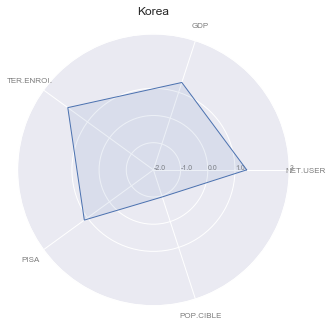

In [42]:
fig = plt.figure(figsize = (5, 5))   # largeur,hauteur

# Initialise the spider plot : trace le cercle
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(echel_N, echel_A, color="grey", size=7)
# un cercle à l'ascisse des différents elts de echel_N, avec la legende echel_A

plt.ylim(echel_N[0], echel_N[-1])  # limites min et max
plt.title(CountryName(pays_gagnant[0]))

# Plot data : affiche des différentes valeurs contenues dans 'values'
ax.plot(angles, values0,  linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values0, 'b', alpha=0.1)


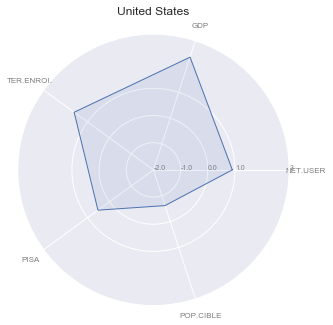

In [43]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[1]))

ax.plot(angles, values1, linewidth=1, linestyle='solid')
ax.fill(angles, values1, 'b', alpha=0.1)

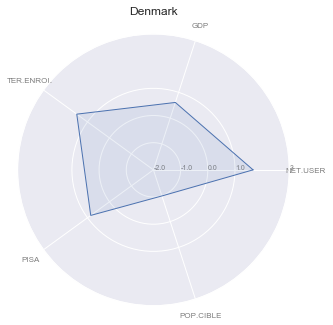

In [44]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[2]))

ax.plot(angles, values2, linewidth=1, linestyle='solid')
ax.fill(angles, values2, 'b', alpha=0.1)

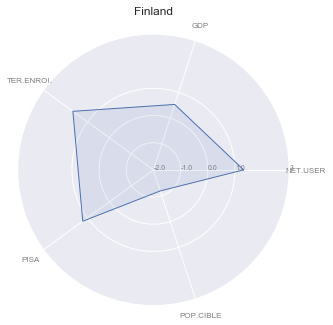

In [45]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[3]))

ax.plot(angles, values3, linewidth=1, linestyle='solid')
ax.fill(angles, values3, 'b', alpha=0.1)

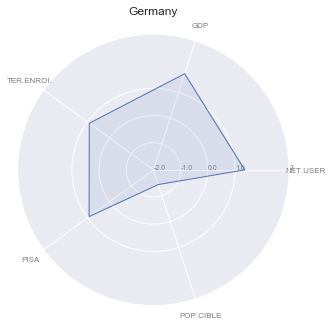

In [46]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[4]))

ax.plot(angles, values4, linewidth=1, linestyle='solid')
ax.fill(angles, values4, 'b', alpha=0.1)

## Evolution des Indicateurs sur la période 1990-2016

In [47]:
pays_gagnant   # rappel des pays gagnants

['KOR', 'USA', 'DNK', 'FIN', 'DEU']

In [48]:
# Calcul de la moyenne arithmétique en 2020 par extrapolation , pour voir si les 5 meilleurs pays confirment leur intérêt

EdStatsData = pd.read_csv("EdStatsData.csv")

EdStatsData = EdStatsData[EdStatsData['Country Code'].isin(pays_gagnant)]
print("Taille EdStatsData:",len(EdStatsData)) 

# 1ere version :  On choisit les indicators qui nous intéressent
indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2', 
                 'SE.TER.ENRR', 'LO.PISA.MAT', 'LO.PISA.REA', 'LO.PISA.SCI']
EdStatsData = EdStatsData[EdStatsData['Indicator Code'].isin(indic_to_keep)]
print("Taille EdStatsData:",len(EdStatsData))

# On garde les colonnes des années qui vont de 1990 à 2016. On supprime les autres années :
EdStatsData = EdStatsData.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
                                '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', 
                                '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', 
                                '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69',
                                'Country Name', 'Indicator Name'], 1)
EdStatsData.head(8)

Taille EdStatsData: 18325
Taille EdStatsData: 40


Country Code     Indicator Code          1990          1991  \
287119          DNK  NY.GDP.MKTP.PP.CD  9.363878e+10  9.810400e+10   
287209          DNK        SE.TER.ENRR  3.412242e+01  3.648846e+01   
287245          DNK     IT.NET.USER.P2  9.727727e-02  1.940565e-01   
288168          DNK        LO.PISA.MAT           NaN           NaN   
288171          DNK        LO.PISA.REA           NaN           NaN   
288174          DNK        LO.PISA.SCI           NaN           NaN   
288352          DNK  SP.POP.1524.TO.UN  7.641440e+05  7.538190e+05   
288403          DNK        SP.POP.TOTL  5.140939e+06  5.154298e+06   

                1992          1993          1994          1995          1996  \
287119  1.023040e+11  1.047492e+11  1.126830e+11  1.185160e+11  1.247992e+11   
287209  3.866211e+01  4.274794e+01  4.468538e+01  4.547641e+01  4.783077e+01   
287245  3.869140e-01  5.783300e-01  1.344308e+00  3.825656e+00  5.714988e+00   
288168           NaN           NaN           NaN           NaN           NaN   
288171           NaN           NaN           NaN           NaN           NaN   
288174           NaN           NaN           NaN           NaN           NaN   
288352  7.421030e+05  7.288970e+05  7.140270e+05  6.975350e+05  6.794460e+05   
288403  5.171370e+06  5.188628e+06  5.206180e+06  5.233373e+06  5.263074e+06   

                1997          1998          1999          2000          2001  \
287119  1.316407e+11  1.367820e+11  1.418463e+11  1.529269e+11  1.581764e+11   
287209           NaN  5.248291e+01  5.584922e+01  5.724930e+01  6.002826e+01   
287245  1.138200e+01  2.266875e+01  3.059204e+01  3.917243e+01  4.295752e+01   
288168           NaN           NaN           NaN  5.140000e+02           NaN   
288171           NaN           NaN           NaN  4.968710e+02           NaN   
288174           NaN           NaN           NaN  4.810053e+02           NaN   
288352  6.603390e+05  6.414900e+05  6.245520e+05  6.107910e+05  6.004550e+05   
288403  5.284991e+06  5.304219e+06  5.321799e+06  5.339616e+06  5.358783e+06   

                2002          2003          2004          2005          2006  \
287119  1.647204e+11  1.659457e+11  1.779815e+11  1.850744e+11  2.029033e+11   
287209  6.353427e+01  6.753456e+01  7.443657e+01  8.042349e+01  7.906494e+01   
287245  6.425000e+01  7.626000e+01  8.093000e+01  8.274000e+01  8.665000e+01   
288168           NaN  5.142877e+02           NaN           NaN  5.130260e+02   
288171           NaN  4.923234e+02           NaN           NaN  4.944830e+02   
288174           NaN  4.752227e+02           NaN           NaN  4.958943e+02   
288352  5.934740e+05  5.903230e+05  5.914600e+05  5.970200e+05  6.072780e+05   
288403  5.375931e+06  5.390574e+06  5.404523e+06  5.419432e+06  5.437272e+06   

                2007          2008          2009          2010          2011  \
287119  2.127405e+11  2.267675e+11  2.230278e+11  2.390095e+11  2.473523e+11   
287209  7.858489e+01  7.570344e+01  7.430094e+01  7.361965e+01  7.680115e+01   
287245  8.503000e+01  8.502000e+01  8.684000e+01  8.872000e+01  8.981001e+01   
288168           NaN           NaN  5.032781e+02           NaN           NaN   
288171           NaN           NaN  4.949162e+02           NaN           NaN   
288174           NaN           NaN  4.993370e+02           NaN           NaN   
288352  6.216850e+05  6.384950e+05  6.553480e+05  6.704360e+05  6.831710e+05   
288403  5.461438e+06  5.493621e+06  5.523095e+06  5.547683e+06  5.570572e+06   

                2012          2013          2014          2015          2016  
287119  2.505246e+11  2.623681e+11  2.703231e+11  2.783728e+11  2.855174e+11  
287209  7.925263e+01  8.123703e+01  8.151647e+01  8.278697e+01           NaN  
287245  9.226001e+01  9.462970e+01  9.599000e+01  9.633050e+01  9.696779e+01  
288168  5.000268e+02           NaN           NaN  5.110876e+02           NaN  
288171  4.961309e+02           NaN           NaN  4.998146e+02           NaN  
288174  4.984742e+

## GDP

In [ ]:
# A propos de Standardisation :

# Remarque :  La standardisation se fera ici sur les valeurs d'un indicateur sur une période de temps pour UN pays.
#             Plus haut, l'année de référence 2015 étant fixée, la standardisation se faisait sur la valeur d'un indicateur
#                des différentes pays.  Ce n'est pas la même chose !
#             Celà veut dire que la comparaison des moyennes obtenues en 2015 et 2020 n'aura pas de sens.

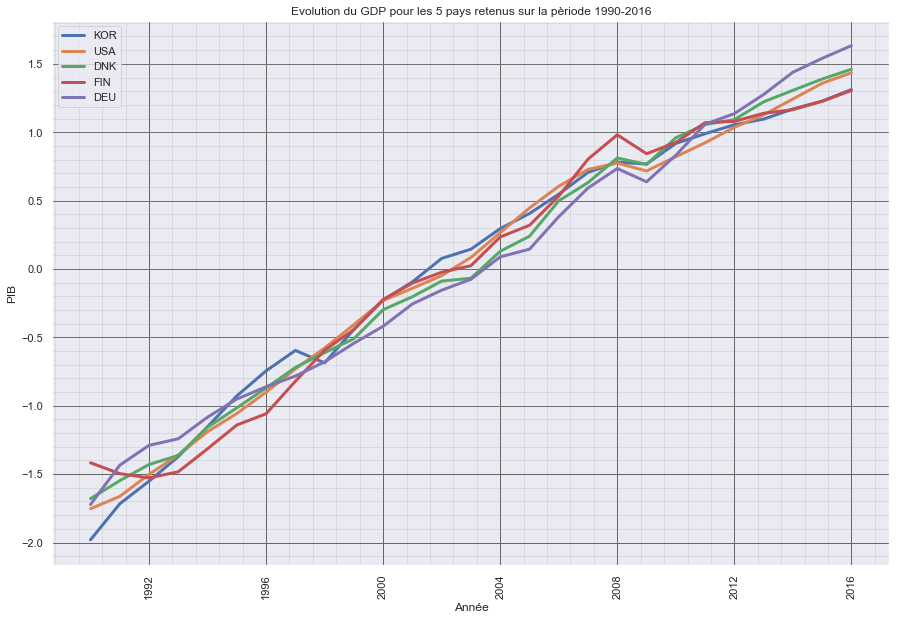

In [49]:
list_pays = EdStatsData["Country Code"].unique()

# Applique le LOG à toutes les lignes 'GDP' en excluant les 2 premières colonnes qui sont des caractères
gdp = EdStatsData.loc[EdStatsData["Indicator Code"] == 'NY.GDP.MKTP.PP.CD'].iloc[:,2:].apply(np.log, axis=1)   # OK

gdp.reset_index(inplace=True)
gdp['pays'] = pd.Series(list_pays)     # Ajout de la colonne 'pays'
gdp.set_index('pays', inplace=True)    # Le pays est la clé de chaque ligne
gdp = gdp.drop(['index'], 1)

# Standardisation 
for p in list_pays: 
    gdp.loc[p] = (gdp.loc[p] - gdp.loc[p].mean()) / gdp.loc[p].std()

# Série temporelle du GDP :
fig = plt.figure(figsize = (15, 10))
plt.title("Evolution du GDP pour les 5 pays retenus sur la pèriode 1990-2016")
plt.xlabel("Année")
plt.ylabel("PIB")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = gdp.loc[pays]                              # on obtient un Series
    df_values = ser_values.to_frame()                       # convertit le Series en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()   # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])      # conversion pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.savefig( "evol_gdp.png", dpi=50 )
plt.show()

## PISA

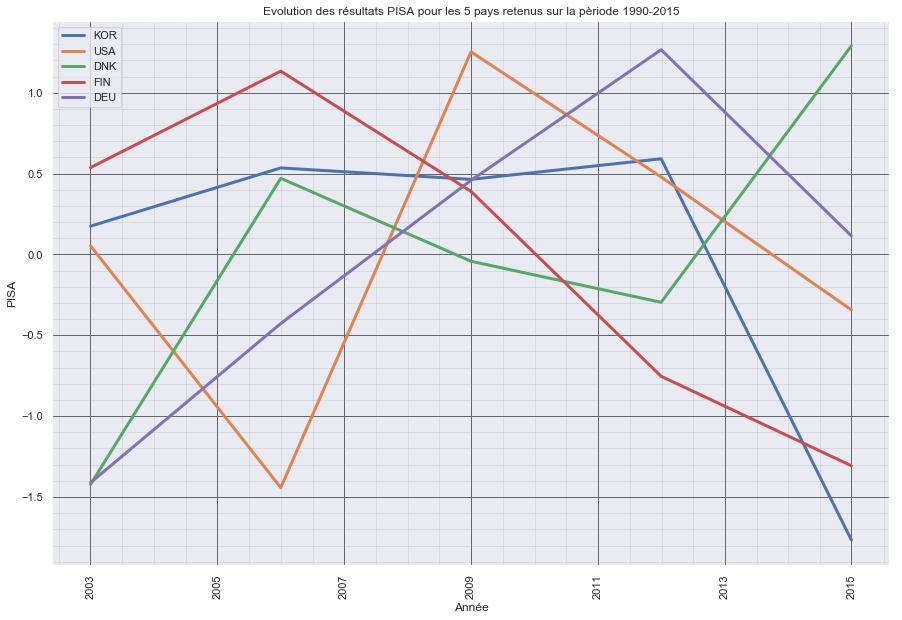

In [50]:
pisa = EdStatsData.loc[(EdStatsData["Indicator Code"] == 'LO.PISA.MAT') |
                       (EdStatsData["Indicator Code"] == 'LO.PISA.REA') |
                       (EdStatsData["Indicator Code"] == 'LO.PISA.SCI')]

list_pays = pisa["Country Code"].unique()

pisa = pisa.groupby(['Country Code']).mean()
pisa.dropna(axis=1, how="all", inplace=True)    # supprime les colonnes de NaN sinon pas d'affichage possible
pisa = pisa.iloc[:,1:].apply(np.log, axis=1)    # Applique le LOG
pisa.reset_index(inplace=True)

pisa.rename(columns={'Country Code': 'pays'}, inplace=True)
pisa.set_index('pays', inplace=True)    # Le pays est la clé de chaque ligne

# Standardisation 
for p in list_pays: 
    pisa.loc[p] = (pisa.loc[p] - pisa.loc[p].mean()) / pisa.loc[p].std()

fig = plt.figure(figsize = (15, 10))
plt.title("Evolution des résultats PISA pour les 5 pays retenus sur la pèriode 1990-2015")
plt.xlabel("Année")
plt.ylabel("PISA")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = pisa.loc[pays]    
    df_values = ser_values.to_frame()                        # convertit la série en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()    # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])       # pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.savefig( "evol_pisa.png", dpi=50 )
plt.show()

## Population Cible des 15/24

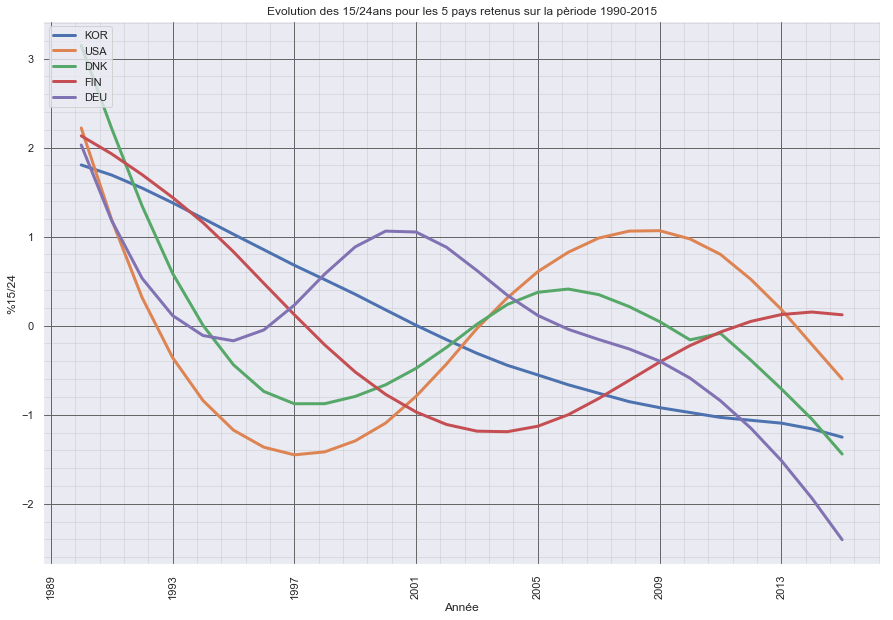

In [51]:
cible = EdStatsData.loc[(EdStatsData["Indicator Code"] == 'SP.POP.1524.TO.UN') |
                        (EdStatsData["Indicator Code"] == 'SP.POP.TOTL')]

list_pays = cible["Country Code"].unique()

cible0 = cible.groupby(['Country Code']).nth(0)   # la 1ere ligne des couples :  SP.POP.1524.TO.UN
cible1 = cible.groupby(['Country Code']).nth(1)   # la 1ere ligne des couples :  SP.POP.TOTL
cible0.reset_index(inplace=True)
cible1.reset_index(inplace=True)
cible0 = cible0.drop(['Country Code','Indicator Code'], 1)
cible1 = cible1.drop(['Country Code','Indicator Code'], 1)
cible = (cible0 / cible1)*100                              # calcul du % des 15/24 ans
cible.dropna(axis=1, how="all", inplace=True)    # supprime les colonnes ou tous les elts sont des NaN

cible['pays'] = pd.Series(list_pays)       # Ajout de la colonne 'pays'
cible.set_index('pays', inplace=True)      # Le pays est la clé de chaque ligne

# Standardisation 
for p in list_pays: 
    cible.loc[p] = (cible.loc[p] - cible.loc[p].mean()) / cible.loc[p].std()

# Graphique
fig = plt.figure(figsize = (15, 10))
plt.title("Evolution des 15/24ans pour les 5 pays retenus sur la pèriode 1990-2015")
plt.xlabel("Année")
plt.ylabel("%15/24")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = cible.loc[pays] 
    df_values = ser_values.to_frame()                        # convertit la série en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()    # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])       # pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.savefig( "evol_cible.png", dpi=50 )
plt.show()

## Taux brut de scolarisation, tertiaire

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


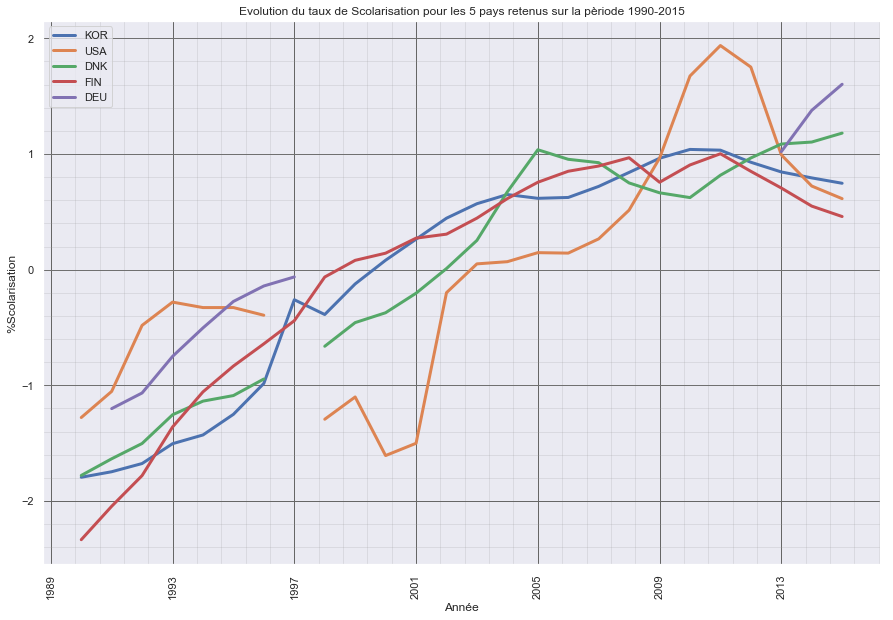

In [52]:
sco = EdStatsData.loc[(EdStatsData["Indicator Code"] == 'SE.TER.ENRR')]

list_pays = sco["Country Code"].unique()

sco.dropna(axis=1, how = 'all', inplace=True)   # supprime les colonnes ou il y a toutes les valeurs manquantes (ex: 2016)
sco = sco.drop(['Country Code','Indicator Code'], 1)
sco.reset_index(inplace=True)
sco['pays'] = pd.Series(list_pays)       # Ajout de la colonne 'pays'
sco = sco.drop(['index'], 1)
sco.set_index('pays', inplace=True)      # Le pays est la clé de chaque ligne

# Standardisation 
for p in list_pays: 
    sco.loc[p] = (sco.loc[p] - sco.loc[p].mean()) / sco.loc[p].std()

fig = plt.figure(figsize = (15, 10))
plt.title("Evolution du taux de Scolarisation pour les 5 pays retenus sur la pèriode 1990-2015")
plt.xlabel("Année")
plt.ylabel("%Scolarisation")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = sco.loc[pays]    
    df_values = ser_values.to_frame()                        # convertit la série en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()    # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])       # pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.savefig( "evol_sco.png", dpi=50 )
plt.show()

## Usage internet

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


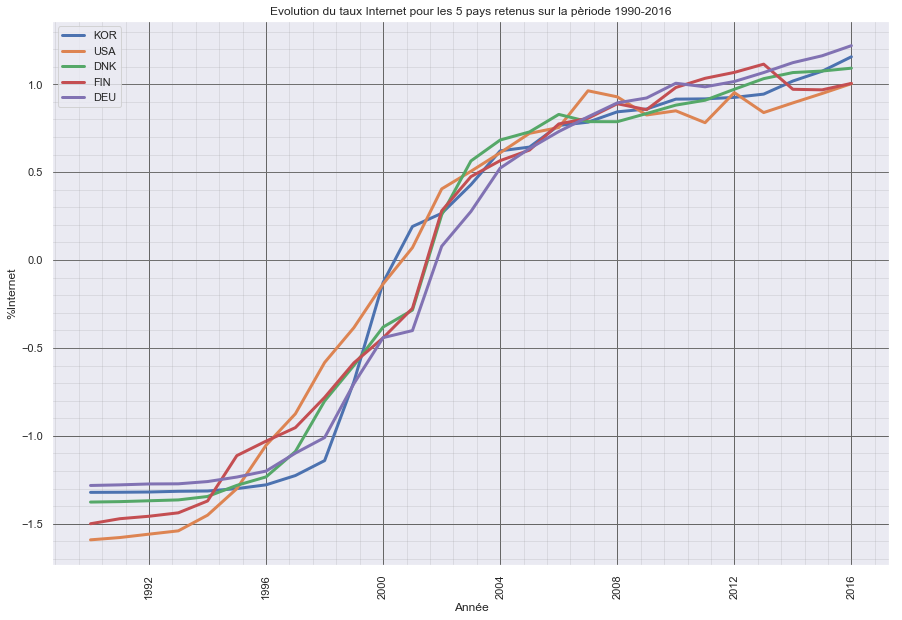

In [53]:
net = EdStatsData.loc[(EdStatsData["Indicator Code"] == 'IT.NET.USER.P2')]

list_pays = net["Country Code"].unique()

net.dropna(axis=1, how = 'all', inplace=True)   # supprime les colonnes ou il y a toutes les valeurs manquantes (ex: 2016)
net = net.drop(['Country Code','Indicator Code'], 1)
net.reset_index(inplace=True)
net['pays'] = pd.Series(list_pays)       # Ajout de la colonne 'pays'
net = net.drop(['index'], 1)
net.set_index('pays', inplace=True)      # Le pays est la clé de chaque ligne

# Standardisation 
for p in list_pays: 
    net.loc[p] = (net.loc[p] - net.loc[p].mean()) / net.loc[p].std()

fig = plt.figure(figsize = (15, 10))
plt.title("Evolution du taux Internet pour les 5 pays retenus sur la pèriode 1990-2016")
plt.xlabel("Année")
plt.ylabel("%Internet")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = net.loc[pays]    
    df_values = ser_values.to_frame()                        # convertit la série en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()    # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])       # pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.savefig( "evol_net.png", dpi=50 )
plt.show()

## Prévision par Extrapolation

In [54]:
# Création d'un dictionnaire pour recueillir les valeurs prédites de 2020 :

pays = gdp.index.tolist()

prev_2020 = {}   # Chaque pays a une entrée associée à une liste de valeur GDP, PISA ... pour l'année 2020.

for p in pays:
    prev_2020[p] = []

## Prévision GDP

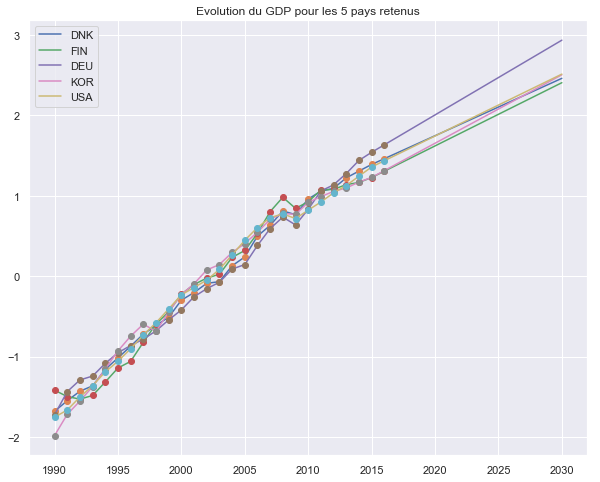

In [55]:
from scipy import interpolate

pays = gdp.index.tolist()

xp = gdp.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

fig = plt.figure(figsize = (10, 8))

for p in pays:
    yp = gdp.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)

    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours, la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution du GDP pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "prev_gdp.png", dpi=50 )
plt.show()

# l'extrapolation linéaire se fait avec l'option fill_value="extrapolate" . 
# En absence de ce paramètre, une valeur de x en dehors de l'intervalle des xp génère une erreur.
#
# kind :
#  "linear" : méthode par défaut ;
#  "nearest" : renvoie la valeur de yp correspondant au xp le plus proche ;
#  "zero" : fait une interpolation par une spline d'ordre 0 ;
#  "slinear" : " par une spline d'ordre 1 ;
#  "quadratic" : " par une spline d'ordre 2 ;
#  "cubic" : " par une spline d'ordre 3.

# plt.xticks(rotation = 'zero')  # étiquette verticale pour l'abcisse  KO

## Prévision PISA

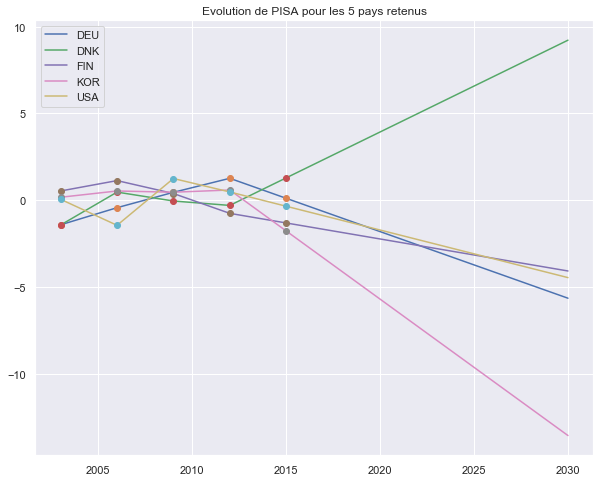

In [56]:
from scipy import interpolate

pays = pisa.index.tolist()

xp = pisa.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

fig = plt.figure(figsize = (10, 8))

for p in pays:
    yp = pisa.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)                  

    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours la valeur prédite pour l'année '2020'
    
    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution de PISA pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "prev_pisa.png", dpi=50 )
plt.show()

## Prévision Population Cible des 15/24

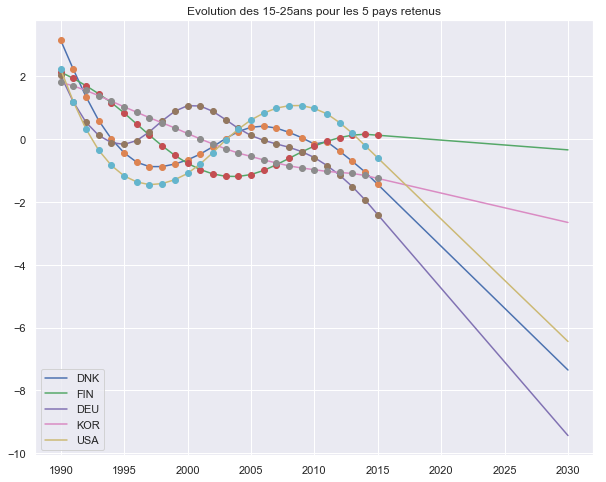

In [57]:
from scipy import interpolate

pays = cible.index.tolist()

xp = cible.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

fig = plt.figure(figsize = (10, 8))

for p in pays:
    yp = cible.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)
    
    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution des 15-25ans pour les 5 pays retenus")

plt.legend(loc = 'lower left')
plt.grid(True)
plt.savefig( "prev_cible.png", dpi=50 )
plt.show()

## PrévisionTaux brut de scolarisation, tertiaire

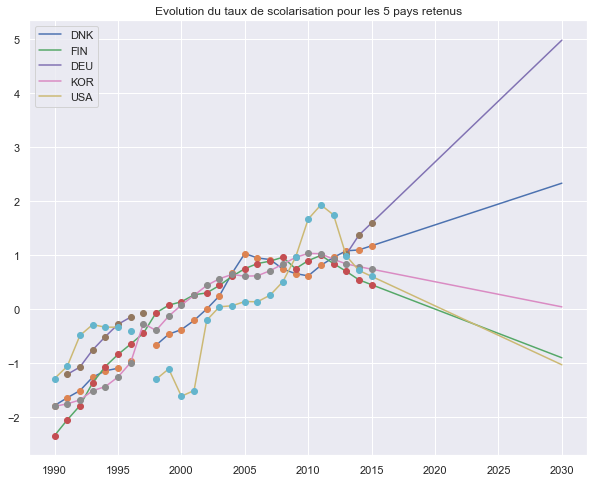

In [85]:
from scipy import interpolate

pays = sco.index.tolist()

xp = sco.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

fig = plt.figure(figsize = (10, 8))

for p in pays:
    yp = sco.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)                  

    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution du taux de scolarisation pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "prev_sco.png", dpi=50 )
plt.show()

## Prévision Usage internet

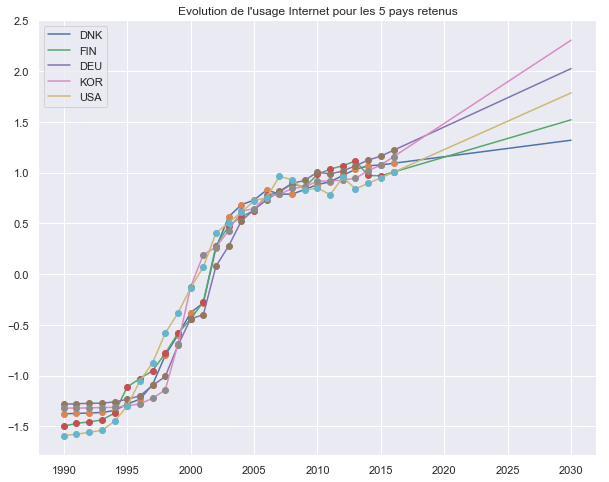

In [58]:
from scipy import interpolate

pays = net.index.tolist()

xp = net.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

fig = plt.figure(figsize = (10, 8))

for p in pays:
    yp = net.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)
    
    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution de l'usage Internet pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "prev_net.png", dpi=50 )
plt.show()

## Resultats pour 2020

In [59]:
prev_2020

{'DNK': [1.7458304150004986,
  3.9342820330649326,
  -3.4111854632299803,
  1.1563968935329507],
 'FIN': [1.6192754876850826,
  -2.228761941984004,
  -0.03337869096017121,
  1.1520558811999502],
 'DEU': [2.0046191825447357,
  -1.8040586051841505,
  -4.747790410132982,
  1.4494947494023442],
 'KOR': [1.6525262179147866,
  -5.69454940858015,
  -1.7195416288958123,
  1.4843037190065251],
 'USA': [1.7425522813588064,
  -1.713831975140867,
  -2.5465625699260945,
  1.2267062385218508]}

In [60]:
print("MOY pour l'année 2020:")
for p in pays:
    print(p,"= ", (sum(prev_2020[p])/5))
print("\nClassement prévisionnel pour l'année 2020:  DNK, FIN, DEU, USA, KOR")

print("\n\nClassement en 2015:  KOR, USA, DNK, FIN, DEU")
#    puisque la standardisation ne s'est pas fait de la même manière.  Ne retenir que le classement.


MOY pour l'année 2020:
DNK =  0.6850647756736803
FIN =  0.10183814718817148
DEU =  -0.6195470166740105
KOR =  -0.85545222011093
USA =  -0.2582272050372609

Classement prévisionnel pour l'année 2020:  DNK, FIN, DEU, USA, KOR


Classement en 2015:  KOR, USA, DNK, FIN, DEU



# ...   FIN


## Critères de sélection des Pays

In [ ]:
# Hypothèse, Voici la liste des critères qui me paraissent pertinents :

#  - pays riche
#  - jeune                                  
#  - forte population, taux de croissance   
#  - éduqué                                 
#  - bonne infrastructure internet          
#  - Taux de scolarisation élevé

# formation en ligne pour un public de niveau lycée et université => fort niveau d'achevement
# Primary           4-11  ans
# Secondary         11-16 ans
#  Lower secondary  12-15 ans
#  Upper secondary  16–18 ans   <- notre cible
# Tertiary                      <- notre cible

# middle school (French: collège), and high school (French: lycée)



Autres indicateurs :
- accès à l’éducation
- obtention de diplômes
- informations relatives aux professeurs
- dépenses liées à l’éducation


Vous êtes Data Scientist dans une start-up de la EdTech, nommée Academy, 
qui propose des contenus de formation en ligne pour un public de niveau 
>>>>>>>   lycée et université.


## Divers

In [ ]:
# L’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux comparable décrivant: 
# - l’accès à l’éducation,
# - la progression,
# - la réussite,
# - l'alphabétisation,
# - des informations relatives aux professeurs,
# - la population,
# - les dépenses liées à l’éducation,
# - etc

# Il y a également des données sur :
# - les résultats d'apprentissage des évaluations selon (PISA, TIMSS, PIRLS, etc  )
# - des données sur l'équité dans les familles

# https://datacatalog.worldbank.org/dataset/education-statistics
# https://databank.banquemondiale.org/home.aspx
# https://donnees.banquemondiale.org/theme/education
# http://datatopics.worldbank.org/education/
# http://datatopics.worldbank.org/education/wQueries/qlearning

In [ ]:
# About EdStats :
    
# The World Bank EdStats (Education Statistics) portal is your comprehensive data and analysis source for key topics 
#   in education such as access, completion, learning, expenditures, policy, and equity.
    
# Data sources include administrative country data from UIS; 
# international learning assessments (PISA, TIMSS, PIRLS, PIAAC, and EGRA) and 
#   three regional learning assessments (SACMEQ, PASEC, LLECE);
# World Bank databases, household surveys such as LSMS, DHS, MICS surveys.

# It includes World Bank Education Projects Database classified by activities, components, 
#   and sub-sectors of all World Bank Education Projects since 1998.
# It also includes detailed expenditure data extracted from World Bank public expenditure review documents 
#   however this data is not included in the EdStats Query because it is not internationally comparable.

# N.B: PISA (Programm for international student assessment) ou programme international pour le suivi des acquis des élèves.
#      Concrètement c'est une étude que mène l'OCDE depuis le début des années 2000 pour évaluer le niveau des élèves de 15 ans 
#       et donc mesurer la performance des systèmes éducatifs des 34 pays membres de l'organisation. 
#      L'évaluation, principalement axée sur les mathématiques, est triennale et concerne en 65 pays (dont 34 pays de l'OCDE), 
#         elle concernait en 2012 environ 510 000 élèves.

# Assessment :
#  PISA   :  Subject: Math, Reading, Science
#  TIMSS  :  Subject: Math,          Science
#  PIRLS  :  Subject:     , Reading, 
#  PIAAC  :  Subject: Numeracy, literacy
#  LLECE  :  Subject: Math, Reading, Science
#  SACMEQ :  Subject: Math, Reading, 
#  PASEC  :  Subject: Math, Reading,
    
# EGRA : Early Grade Reading Assessment
# https://www.careevaluations.org/wp-content/uploads/Evaluation-de-base-EGRA-Haiti-Gagne-CARE-Revisee.pdf

## Indicateurs

In [ ]:
    
01 Early Childhood Education
                                Gross enrolment ratio, early childhood education, both sexes (%)
                                Gross enrolment ratio, pre-primary, both sexes (%)
                                Net enrolment rate, pre-primary, both sexes (%)
02 Primary
                                Adjusted net enrolment rate, primary, both sexes (%)
                                Cumulative drop-out rate to the last grade of primary education, both sexes (%)
                                Gross enrolment ratio, primary, both sexes (%)
                                Primary completion rate, both sexes (%)
                                Proportion of public primary schools with access to electricity (%)
                                Rate of out-of-school children of primary school age, both sexes (%)
                                Total net enrolment rate, primary, both sexes (%)
03 Secondary
                                Adjusted net enrolment rate, lower secondary, both sexes (%)
                                Adjusted net enrolment rate, upper secondary, both sexes (%)
                                Gross enrolment ratio, primary and secondary, both sexes (%)
                                Gross enrolment ratio, upper secondary, both sexes (%)
                                Net enrolment rate, lower secondary, both sexes (%)
                                Net enrolment rate, upper secondary, both sexes (%)
                                Proportion of public lower secondary schools with access to electricity (%)
                                Total net enrolment rate, lower secondary, both sexes (%)
                                Total net enrolment rate, upper secondary, both sexes (%)
                                
04 Post-Secondary/Non-Tertiary
                                Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)
05 Tertiary
                                Gross enrolment ratio, primary to tertiary, both sexes (%)
                                Gross enrolment ratio, tertiary, both sexes (%)
                                Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)
                                
06 Teachers

07 Expenditures
                                 Capital expenditure as % of total expenditure in tertiary public institutions (%)
                                 Capital expenditure as % of total expenditure in upper-secondary public institutions (%)
                                 Current expenditure as % of total expenditure in tertiary public institutions (%)
                                 Current expenditure as % of total expenditure in upper-secondary public institutions (%)
                                 Expenditure on education as % of total government expenditure (%)
                                 Expenditure on primary as % of total government expenditure (%)
                                 Expenditure on secondary as % of total government expenditure (%)
                                 Expenditure on upper secondary as % of total government expenditure (%)
                                 Expenditure on tertiary as % of total government expenditure (%)
                                 Government expenditure on education as % of GDP (%)
                                 Government expenditure on lower secondary education as a percentage of GDP (%)
                                 Government expenditure on pre-primary education as % of GDP (%)
                                 Government expenditure on primary education as % of GDP (%)
                                 Government expenditure on secondary education as % of GDP (%)
                                 Government expenditure on tertiary education as % of GDP (%)
                                 Government expenditure on upper secondary education as a percentage of GDP (%)
                                 Initial government funding of education as a percentage of GDP (%)
                                 Initial government funding of lower secondary education as a percentage of GDP (%)
                                 Initial government funding of pre-primary education as a percentage of GDP (%)
                                 Initial government funding of primary education as a percentage of GDP (%)
                                 Initial government funding of secondary education as a percentage of GDP (%)
                                 Initial government funding of tertiary education as a percentage of GDP (%)
                                 Initial government funding of upper secondary education as a percentage of GDP (%)

08 Literacy
                                 Adult literacy rate, population 15+ years, both sexes (%)
                                 Literacy rate, population 25-64 years, both sexes (%)
                                 Youth literacy rate, population 15-24 years, both sexes (%)

09 Learning Outcomes
                                 PISA: 15-year-olds by mathematics proficiency level (%). Level 1-6
                                 PISA: 15-year-olds by reading proficiency level (%). Level 1A
                                 PISA: 15-year-olds by science proficiency level (%). Below Level 1B
                                 PISA: Distribution of Mathematics Scores: 10th Percentile Score
                                 PISA: Distribution of Reading Scores: 10th Percentile Score
                                 PISA: Distribution of Science Scores: 10th Percentile Score
                                 PISA: Mean performance on the mathematics scale
                                 PISA: Mean performance on the reading scale
                                 PISA: Mean performance on the science scale

10 Attainment
                                 Barro-Lee: Average years of primary schooling, age 15+, total
                                 Barro-Lee: Average years of primary schooling, age 15-19, total
                                 Barro-Lee: Average years of primary schooling, age 20-24, total
                                 Barro-Lee: Average years of secondary schooling, age 15+, total
                                 Barro-Lee: Average years of secondary schooling, age 15-19, total
                                 Barro-Lee: Average years of secondary schooling, age 20-24, total
                                 Barro-Lee: Average years of tertiary schooling, age 15+, total
                                 Barro-Lee: Average years of tertiary schooling, age 15-19, total
                                 Barro-Lee: Average years of tertiary schooling, age 20-24, total
                                 Barro-Lee: Average years of total schooling, age 15+, total
                                 Barro-Lee: Average years of total schooling, age 15-19, total
                                 Barro-Lee: Average years of total schooling, age 20-24, total
                                 Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary
                                 Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary
                                 Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
                                 Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary
                                 Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary
                                 Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary
                                 Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary
                                 Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary
                                 Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary
                                 Barro-Lee: Population in thousands, age 15+, total
                                 Barro-Lee: Population in thousands, age 15-19, total
                                 Barro-Lee: Population in thousands, age 20-24, total
                                    
L'Institut de statistique de l'UNESCO (ISU) est la source officielle et fiable de données comparables à l'échelle internationale
  sur l'éducation, la science, la culture et la communication.
                                 UIS: Percentage of population age 25+ with no schooling, both sexes
                                 Wittgenstein Projection: Mean years of schooling. Age 0-19. Total
                                 Wittgenstein Projection: Mean years of schooling. Age 15+. Total
                                 Wittgenstein Projection: Mean years of schooling. Age 15-19. Total
                                 Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
                                 etc

11 Education Equality
                                 DHS: Average years of schooling by age group. Age 15-19
                                 DHS: Gini coefficient of average years of schooling. Age 15+
                                 DHS: Gross attendance rate. Post Secondary
                                 DHS: Net attendance rate. Primary
                                 DHS: Net attendance rate. Secondary
                                 DHS: Primary completion rate
                                 DHS: Secondary completion rate
                                 etc

12 Population                     
                                 Population growth (annual %)
                                 Population, ages 15-24, total
                                 Population, total
                                 Population, ages 0-14 (% of total)
                                 Population, ages 15-64 (% of total)
                                 

                                 SP.POP.* ; SP.PRE.*(pre-primary) ; SP.PRM.*(primary) ; SP.SEC.*(secondary) ; SP.TER.*

13 Labor
                                 Labor force with advanced education (% of total labor force)
                                 Labor force with basic education (% of total labor force)
                                 Labor force with intermediate education (% of total labor force )
                                 

14 Background
                                 Duration of compulsory education (years)
                                 GDP, PPP (current international $)
                                 Internet users (per 100 people)
                                 Personal computers (per 100 people)



15 EMIS                   : Education Management Information Systems

16 SABER                  : Systems Approach for Better Education Results

17 Global Achievement
                                 EDSTATS: Average Adjusted Test Score

18 Learning Poverty

------------------------------------------------------------------------------------------------

Learning Outcomes
    By Assessment | By Country | EGRA
    
Attainment
    Attainment Over Time | By Age Group and Gender | By Gender, Income and Rural/Urban
    (réal au fil du temps)
    
Equality
    Attendance Rates   | Education Attainment
    (taux de présence)   (niveau d'instruction)
    
Education Expenditures

Policy Data
    ECD | EMIS | EPS | SAA | School Finance | SHF | SA | Teachers | Tertiary | WfD
                          
EMIS :  Education Management Information Systems (EMIS)
                          
    World Bank Projects | EMIS Policy Data


_____________________________________________________

Assessment = Évaluation
Attainment = Réalisation
attendance = présence
GDP per capita = PIB par habitant
GNI per capita = Revenu national brute par habitant

In [ ]:
group_pays  = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area',
               'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union',
               'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean',
               'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification',
               'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
               'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members',
               'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World']

In [ ]:

# --------------------------
# OCDE :  Organisation de coopération et de développement économique,  organisation internationale d'études économiques, 
#   dont les pays membres — pays développés pour la plupart — 
#     ont en commun un système de gouvernement démocratique et une économie de marché.

# L'OCDE est le principal rassembleur de statistiques sur les pays développés. L'OCDE siège à Paris.
#
# L'OCDE regroupe plus d'une trentaine de pays : 
#  - toute l'Europe occidentale
#  - Amérique du nord, Chili
#  - Japon, Australie, Nouvelle-Zélande, Corée,
#  - République tchèque, Hongrie, Pologne, Slovénie, Estonie
#  - Israël


# La Banque mondiale est une institution financière internationale qui accorde des prêts à effet de levier à des pays 
#   en développement pour des projets d'investissement.
# La Banque mondiale comprend deux institutions 
#  - la Banque internationale pour la reconstruction et le développement (BIRD)  et
#  - l’Association internationale de développement (IDA en anglais) ,
# créées pour lutter contre la pauvreté en apportant des aides, des financements et des conseils aux États en difficulté.

# IBRD :  Banque internationale pour la reconstruction et le développement
# IDA  :  Association internationale de développement


In [ ]:
# Les boites à moustaches (Box Plot) permettent de visualiser plusieurs paramètres statistiques d’une feature. 
# Notamment la médiane, l’écart interquartile (IQR) et la valeur maximale et minimale de la distribution. 
# Permet de voir la répartition des données ainsi que l’existence des outliers.
# minimum, 1er quartile, mediane, 3eme quartile, maximum
# La médiane est une valeur qui sépare l'ensemble des valeurs en deux parties égales, l'une inférieure à la médiane, l'autre sup.

In [ ]:
# EdStatsSeries['Topic'].value_counts()

# TOPIC
# ----------------------------------------------------------------------------------------------------
# Learning Outcomes                                                                               1046
# Attainment                                                                                       733
# Education Equality                                                                               426
# Secondary                                                                                        256
# Primary                                                                                          248
# Population                                                                                       213
# Tertiary                                                                                         158
# Teachers                                                                                         137
# Expenditures                                                                                      93
# Engaging the Private Sector (SABER)                                                               51
# Literacy                                                                                          32
# School Autonomy and Accountability (SABER)                                                        29
# Teachers (SABER)                                                                                  29
# Early Childhood Education                                                                         24
# Education Management Information Systems (SABER)                                                  23
# Post-Secondary/Non-Tertiary                                                                       19
# School Finance (SABER)                                                                            18
# Tertiary Education (SABER)                                                                        17
# Student Assessment (SABER)                                                                        15
# Pre-Primary                                                                                       14
# Health: Population: Structure                                                                     13
# Early Child Development (SABER)                                                                   12
# Workforce Development (SABER)                                                                     12
# Social Protection & Labor: Labor force structure                                                  11
# School Health and School Feeding (SABER)                                                           9
# Economic Policy & Debt: Purchasing power parity                                                    6
# Laber                                                                                              3
# Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators             3
# Social Protection & Labor: Unemployment                                                            3
# EMIS                                                                                               2
# Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators       2
# Infrastructure: Communications                                                                     2
# Background                                                                                         2
# Health: Risk factors                                                                               1
# Health: Population: Dynamics                                                                       1
# Health: Mortality                                                                                  1
# Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita                              1
